<font color='blue'><b>ОПИСАНИЕ ПРОЕКТА</b></font>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.  Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

__________________________________________________________________________
<font color='blue'><b>**ОПИСАНИЕ ДАННЫХ:**</b></font>

Name — название игры 

Platform — платформа 

Year_of_Release — год выпуска Genre — жанр игры 

NA_sales — продажи в Северной Америке (миллионы проданных копий) 

EU_sales — продажи в Европе (миллионы проданных копий) 

JP_sales — продажи в Японии (миллионы проданных копий) 

Other_sales — продажи в других странах (миллионы проданных копий) 

Critic_Score — оценка критиков (максимум 100) 

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


<font color='blue'><b>**ПРИМЕЧАНИЯ:**</b></font>
Данные за 2016 год могут быть неполными.
__________________________________________________________________________
<font color='blue'><b>**ЦЕЛЬ:**</b></font>

Выявить закономерности определяющие успешность игры, для дальнейшего выбора продукта и планирования рекламных кампаний.
___________________________________________________________________________


## 1. Открытие и изучение данных датафрэймов. 

Проведем импорт библиотек

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth

import plotly.express as px
import plotly.graph_objs as go
import plotly as py
pyplt=py.offline.plot
from scipy import stats as st
from datetime import datetime, timedelta
# сброс ограничений на число столбцов выводимой таблицы
pd.set_option('display.max_columns', None)
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)
# установка параметров отображения для графиков
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='whitegrid', rc=custom_params)

# Графики высокого разрешения
%config InlineBackend.figure_format='retina' 
%matplotlib inline 
#убрать уведомления об ошибках
import warnings
warnings.simplefilter('ignore')
import os.path

Отроем датасеты

In [2]:
# загрузим датафрэйм
path1 = "/datasets/games.csv"
path2 = "C:\\Users\\dell\Desktop\\УЧЕБА\\СБОРНЫЙ ПРОЕКТ №1\\games.csv"
if os.path.isfile(path1):
    df = pd.read_csv(path1, sep=",")
elif os.path.isfile(path2):
    df = pd.read_csv(path2, sep=",")
else:
    print("ФАЙЛ ОТСУТСТВУЕТ, УКАЖИТЕ КОРРЕКТНЫЙ ПУТЬ К ФАЙЛУ")
display(df.head())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Ознакомимся с структурой данных датафрэйма


In [3]:
display(df.sample(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7798,Tokimeki Memorial Girl's Side 3rd Story,DS,2010.0,Adventure,0.00,0.00,0.19,0.00,NaN,NaN,NaN
6389,Battle Arena Toshinden 3,PS,1996.0,Fighting,0.06,0.04,0.14,0.02,NaN,NaN,NaN
9438,Soccer Tsuku DS: World Challenge 2010,DS,2010.0,Sports,0.00,0.00,0.13,0.00,NaN,NaN,NaN
9016,G.I. Joe: The Rise of Cobra,PS2,2009.0,Action,0.11,0.00,0.00,0.03,50.0,2.3,T
9820,Rocket: Robot on Wheels,N64,1999.0,Platform,0.10,0.02,0.00,0.00,NaN,NaN,NaN


Ознакомимся с типами данных и наличия пропусков

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Ознакомимся с основными статистичискими характеристиками

In [6]:
display(df.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Получим основную информацию по каждому столбцу и более детально посмотрим на данные.

In [7]:
# напишем функцию 
def get_info_about_df(data):
    """
    Приводит наименование столцов к нижнему регстру и убирает пробелы заменяя их на "_"
    выводит по DF:
    - количество строк-дупликатов ;
    - 5 рандомных строк;
    - Основные статистические данные;
    - Типы данных и наличеие нулевых значений.
    выводит по каждому столбцу DF:
    - Количество Null и Na;
    - Количество уникальных значений;
    - Список уникальных значений;
    - Количетсво повторений по каждому уникальному значению;
    - Статистические сведения.
    """
    data.columns = data.columns.str.lower()
    data.columns = data.columns.str.replace(' ','_')
    print(f'\033[1mDATAFRAME INFO:\033[0m\n')
    print(f'DUPLICATE ROWS COUNT = {data.duplicated().sum()}\n')
    print('\033[1mRANDOM FIVE ROWS\033[0m')
    display(data.sample(5))
    print('*'*70)
    print('\033[1mSTATISTIC INFO\033[0m')
    display(data.describe())
    print('*'*70)
    print('\033[1mINFO ABOUT DATA TYPES AND PRESENCE NULL \033[0m')
    display(data.info())
    print('*'*70)
    for col in data.columns:
        column=data[col]
        print(f'\033[1mCOLUMN - {col}\033[0m')
        print(f'Null, Na in {col}: {column.isna().sum()}')
        print(f'Unique values: {column.nunique()}')
        print(f'List for unique values and it amount :\n{column.unique()}')
        print(column.value_counts())
        print(f'Statistic info:\n{column.describe()}')
        print('*'*70)

In [ ]:
#get_info_about_df(df)

### **Вывод**

- Данные предоставлены по играм выпущеным с 1980 по 2016 гг.
- Игры выпускались для 31 платформы.
- Игры в разных жанрах - 12 шт.
- данные за 2016 год не полные.

Выявлены следующие неточности:

В таблице наименования столбцов имеют переменный регистр - для удобства работы заменим их все на нижний регистр.

Заменим на нижний регистр наименования в столбцах 'name','platform', 'genre', 'rating' так как может написание быть разное - исключить неявные дубликаты.

В столбцах:
1. **Name:**
     - имеются пропуски в количестве 2 шт.
2. **Platform:**
     - аномалий не выявлено
3. **Year_of_Release:**
    - тип данных данных заменить на integer так как год это целое число.
    - имеются пропуски в количестве 269 шт.
4. **Genre:**
    - имеются пропуски в количестве 2 шт.
5. **NA_sales:**
     - аномалий не выявлено
6. **EU_sales:**
     - аномалий не выявлено
7. **JP_sales:**
     - аномалий не выявлено
8. **Other_sales:**
     - аномалий не выявлено
9. **Critic_Score:**
    - имеются пропуски в количестве 8578 шт.
10. **User_Score:**
    - изменить тип данных на float для првоедения расчетов (например среднего рейтинга по жанру)
    - имеются пропуски в количестве 6701 шт.
11. **Rating:**
     - имеются пропуски в количестве 6766 шт.

## 2. Проведение предобработки данных и дополнительных расчетов

Для удобства обращения и исключения ошибок при обращении по названию столбца, они были приведены к единому виду - нижнему регистру без пробелов.

Приведем так же к нижнему регистру даныне по столбцам (позволит сократить возможные дубликаты)

In [9]:
arr = ['name','platform', 'genre', 'rating']
for col in arr:
    df[col] = df[col].str.lower()

Проведем анализ данных столбцов имеющих пропуски и заменим их (при необходимости)

In [10]:
# функция для подсчета количетсва и суммы пропусков и доли об общейго количества
def procent(data, col_name):
    dd = df[df[col_name].isna()==True]
    x= np.sum(dd['na_sales'] + dd['eu_sales'] + dd['jp_sales'] + dd['other_sales'])
    x2 = np.sum(data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
    print(f'Пропущенных значений: {data[col_name].isna().sum()} шт.\nчто составляет: {data[col_name].isna().sum()/data.shape[0]*100:.2f}% от общих данных\nПропущенных значений на сумму: {round(x,2)} млн.\nчто составляет: {x/x2*100:.2f}% от общих данных')

In [11]:
def replace_for_max(data,column,k):
    for i in data[data[column].isna()==True].index:
        if k == 1:
            return data[data['name'] == data.loc[i, 'name']][column].max()
        elif k == 2:
            return data[data['name'] == data.loc[i, 'name']][column].min()
        elif k == 3:
            return data[data['name'] == data.loc[i, 'name']][column].mean()
        elif k == 4:
            return data[data['name'] == data.loc[i, 'name']][column].median()
        elif k == 5:
            data2 = data[(data[column].isna() == False) & (data['name'] == data.loc[i, 'name'])].sort_values('year_of_release', ascending=False).reset_index()
            if len(data2) != 0:
                return data2.loc[0,column]

столбец name

In [12]:
display(df[df['name'].isna()])
display(procent(df,'name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущенных значений: 2 шт.
что составляет: 0.01% от общих данных
Пропущенных значений на сумму: 2.42 млн.
что составляет: 0.03% от общих данных


None

Так как даннные строки показывают нам, что некоторые игры продавались (около 2,4 млн. копий), заменим название на 
game_no_name, что бы не потерять данные.
 

In [13]:
df['name'] = df['name'].fillna("game_no_name")
print(f'Пропущенных значений: {df["name"].isna().sum()}')

Пропущенных значений: 0


столбец year_of_release

In [14]:
display(procent(df,'year_of_release'))

Пропущенных значений: 269 шт.
что составляет: 1.61% от общих данных
Пропущенных значений на сумму: 98.92 млн.
что составляет: 1.11% от общих данных


None

предположим, что даты выпуска игры незавасимо от платформы происходит приблизительноо в одно время(один год), тогда заполним данные года выпуска игры по названию игры независимо от платформы - возьмем максимальное значение которое встречается для конкретной игры и проверим повторно пропуски.

In [15]:
replace_for_max(df,'year_of_release',1)   
display(procent(df,'year_of_release'))

Пропущенных значений: 269 шт.
что составляет: 1.61% от общих данных
Пропущенных значений на сумму: 98.92 млн.
что составляет: 1.11% от общих данных


None

Так как остались еще игры где отсутсвует год выпуска, так как для других платформ отсутсвует игра или год так же не указан.
Принимаем решение удалить данные, так как их процент всего 0,87% и 0,49% от общих продаж копий игр.

In [16]:
df = df[df['year_of_release'] >= 1980]
print(f'Пропущенных значений: {df["year_of_release"].isna().sum()}')

Пропущенных значений: 0


Проведем преобразование типов данных столбца year_of_release к целочисленному (int)

In [17]:
df['year_of_release'] = df['year_of_release'].astype('int')

Столбец genre

In [18]:
display(procent(df,'genre'))

Пропущенных значений: 2 шт.
что составляет: 0.01% от общих данных
Пропущенных значений на сумму: 2.42 млн.
что составляет: 0.03% от общих данных


None

Попробуем заменить данные по названию игры и максимальной дате выпуска

In [19]:
replace_for_max(df,'genre',5)
display(procent(df,'genre'))

Пропущенных значений: 2 шт.
что составляет: 0.01% от общих данных
Пропущенных значений на сумму: 2.42 млн.
что составляет: 0.03% от общих данных


None

Всего две строки, произвести замену по названию игры не получилось, заменим название жанра на game_no_genre, для того что бы не потерять количество проданных копий.

Столбец critic_score

In [20]:
display(procent(df,'critic_score'))

Пропущенных значений: 8463 шт.
что составляет: 51.46% от общих данных
Пропущенных значений на сумму: 3283.14 млн.
что составляет: 37.24% от общих данных


None

Попробуем заменить данные по названию игры на медианное значение

In [21]:
replace_for_max(df,'critic_score',4)
display(procent(df,'critic_score'))

Пропущенных значений: 8463 шт.
что составляет: 51.46% от общих данных
Пропущенных значений на сумму: 3283.14 млн.
что составляет: 37.24% от общих данных


None

Частично, даныне были заменены. пока остальные оставим без изменения, так как не ясно на что их можно заменить, возможно уточнить у ответсвенных коллег о причинах отсутсвия инфформации.

Столбец user_score

Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение  попробуем произвести замену

In [22]:
print('Строк столбца user_score имеющих в значениях "tbd":', df.query('user_score == "tbd"')['user_score'].count())

Строк столбца user_score имеющих в значениях "tbd": 2376


После поиска в интрнете стало понятно, что **TBD** - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

Т.е. данные рейтинга не заполнены, поэтому заменим их на Nan, а так же приведем тип данных к формату float

In [23]:
for i in df[df['user_score']=="tbd"].index:
    df.loc[i,'user_score']= np.nan
print('Строк столбца user_scrore имеющих в значениях "tbd":', df.query('user_score == "tbd"')['user_score'].count()) 
df['user_score'] = df['user_score'].astype("float")

Строк столбца user_scrore имеющих в значениях "tbd": 0


In [24]:
display(procent(df,'user_score'))

Пропущенных значений: 8983 шт.
что составляет: 54.62% от общих данных
Пропущенных значений на сумму: 3270.52 млн.
что составляет: 37.09% от общих данных


None

Попробуем заменить данные по названию игры на медианное значение

In [25]:
replace_for_max(df,'user_score',4)
display(procent(df,'user_score'))

Пропущенных значений: 8983 шт.
что составляет: 54.62% от общих данных
Пропущенных значений на сумму: 3270.52 млн.
что составляет: 37.09% от общих данных


None

Частично, даныне были заменены. пока остальные оставим без изменения, так как не ясно на что их можно заменить.

Столбец rating

In [26]:
display(procent(df,'rating'))

Пропущенных значений: 6678 шт.
что составляет: 40.61% от общих данных
Пропущенных значений на сумму: 2824.52 млн.
что составляет: 32.04% от общих данных


None

Попробуем заменить данные по названию игры для платформы где уже проставлен рейтинг

In [27]:
replace_for_max(df,'rating',5)
display(procent(df,'rating'))

Пропущенных значений: 6678 шт.
что составляет: 40.61% от общих данных
Пропущенных значений на сумму: 2824.52 млн.
что составляет: 32.04% от общих данных


None

Частично, данные были заменения, а остальные заменим на "не определен"

In [28]:
df['rating'] = df['rating'].fillna("не определен")
display(procent(df,'rating'))

Пропущенных значений: 0 шт.
что составляет: 0.00% от общих данных
Пропущенных значений на сумму: 0.0 млн.
что составляет: 0.00% от общих данных


None

Расчитаем сумму продаж копий независимо от региона

In [29]:
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,не определен,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,не определен,31.38


In [30]:
print(f'Проверим наличие дубликатов.\nНайдено дубликатов: {df.duplicated().sum()} шт.')

Проверим наличие дубликатов.
Найдено дубликатов: 0 шт.


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  all_sales        16446 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 2.1+ MB


**ВЫВОД**


Данные приведены в порядок (на сколько это возможно), остались столбцы critic_score, user_score в которых имеются пропуски, но пока определить, чем заполнить их не предоставляется возможным, что с ними делать определим в процессе исследования или уточник у более опытных коллег.

## 3. Исследовательский анализ данных

### Определим и изучим колиество игр выпускаемых в разные годы.

In [32]:
game_for_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values('name')
print("ТОП-3 года с найименьшим количеством игр")
display(game_for_year.head(3))
print("ТОП-3 года с наибольшим количеством игр")
display(game_for_year.tail(3))

ТОП-3 года с найименьшим количеством игр


,name
year_of_release,
1980,9
1984,14
1985,14


ТОП-3 года с наибольшим количеством игр


,name
year_of_release,
2010,1255
2009,1426
2008,1427


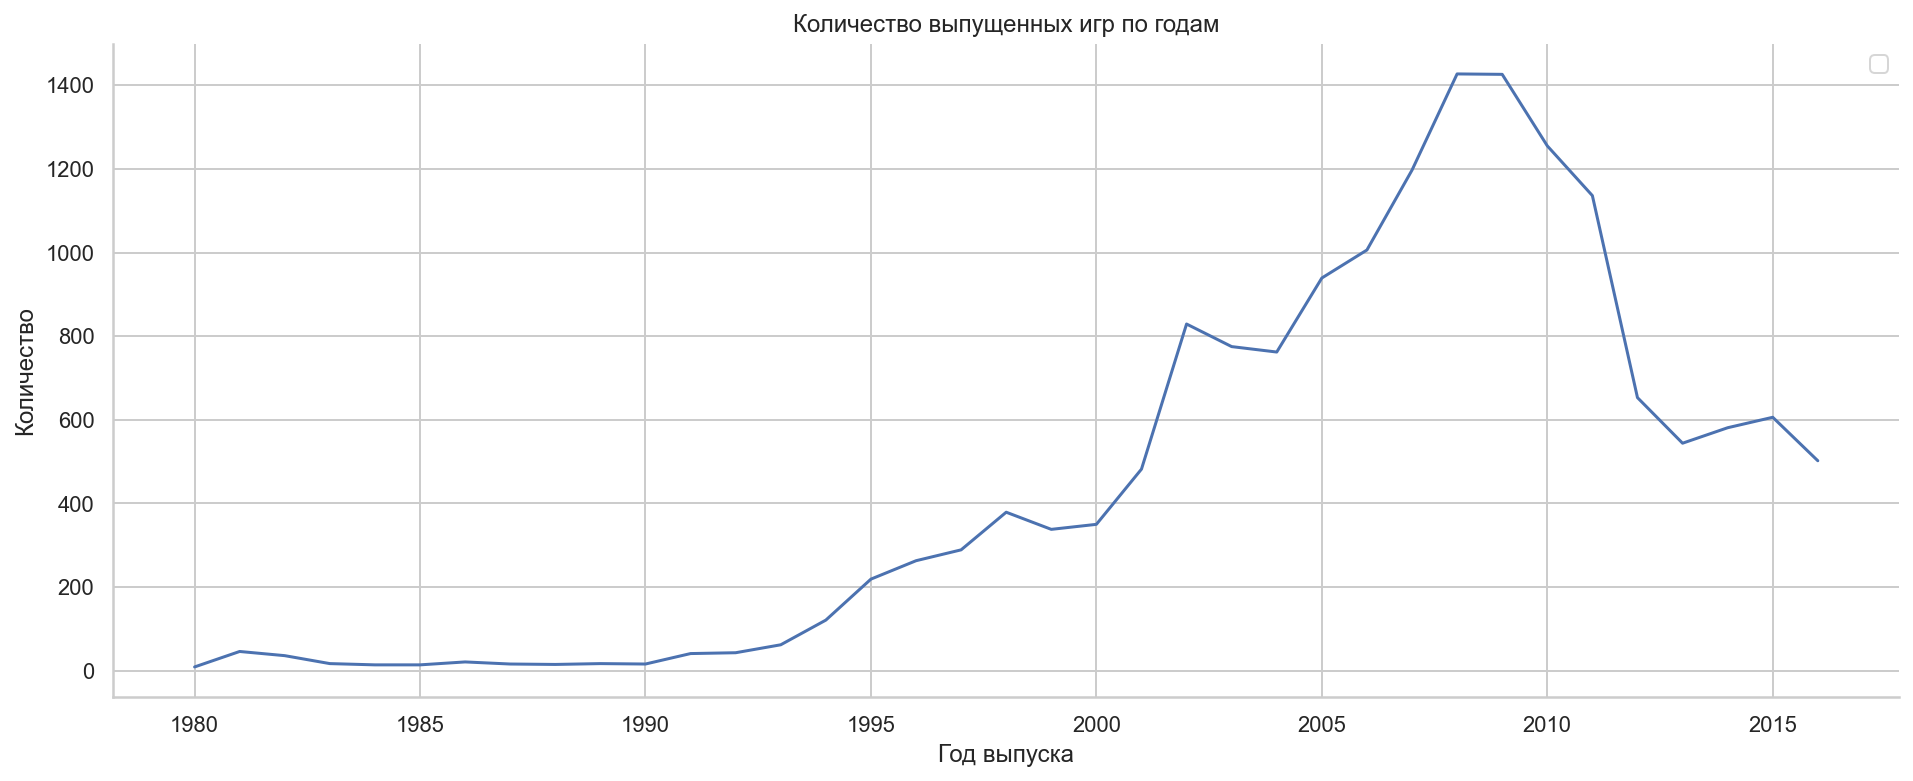

In [33]:
plt.figure(figsize=(16,6))
sns.lineplot(data=game_for_year, color ='black')
plt.title("Количество выпущенных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество")
plt.legend('')

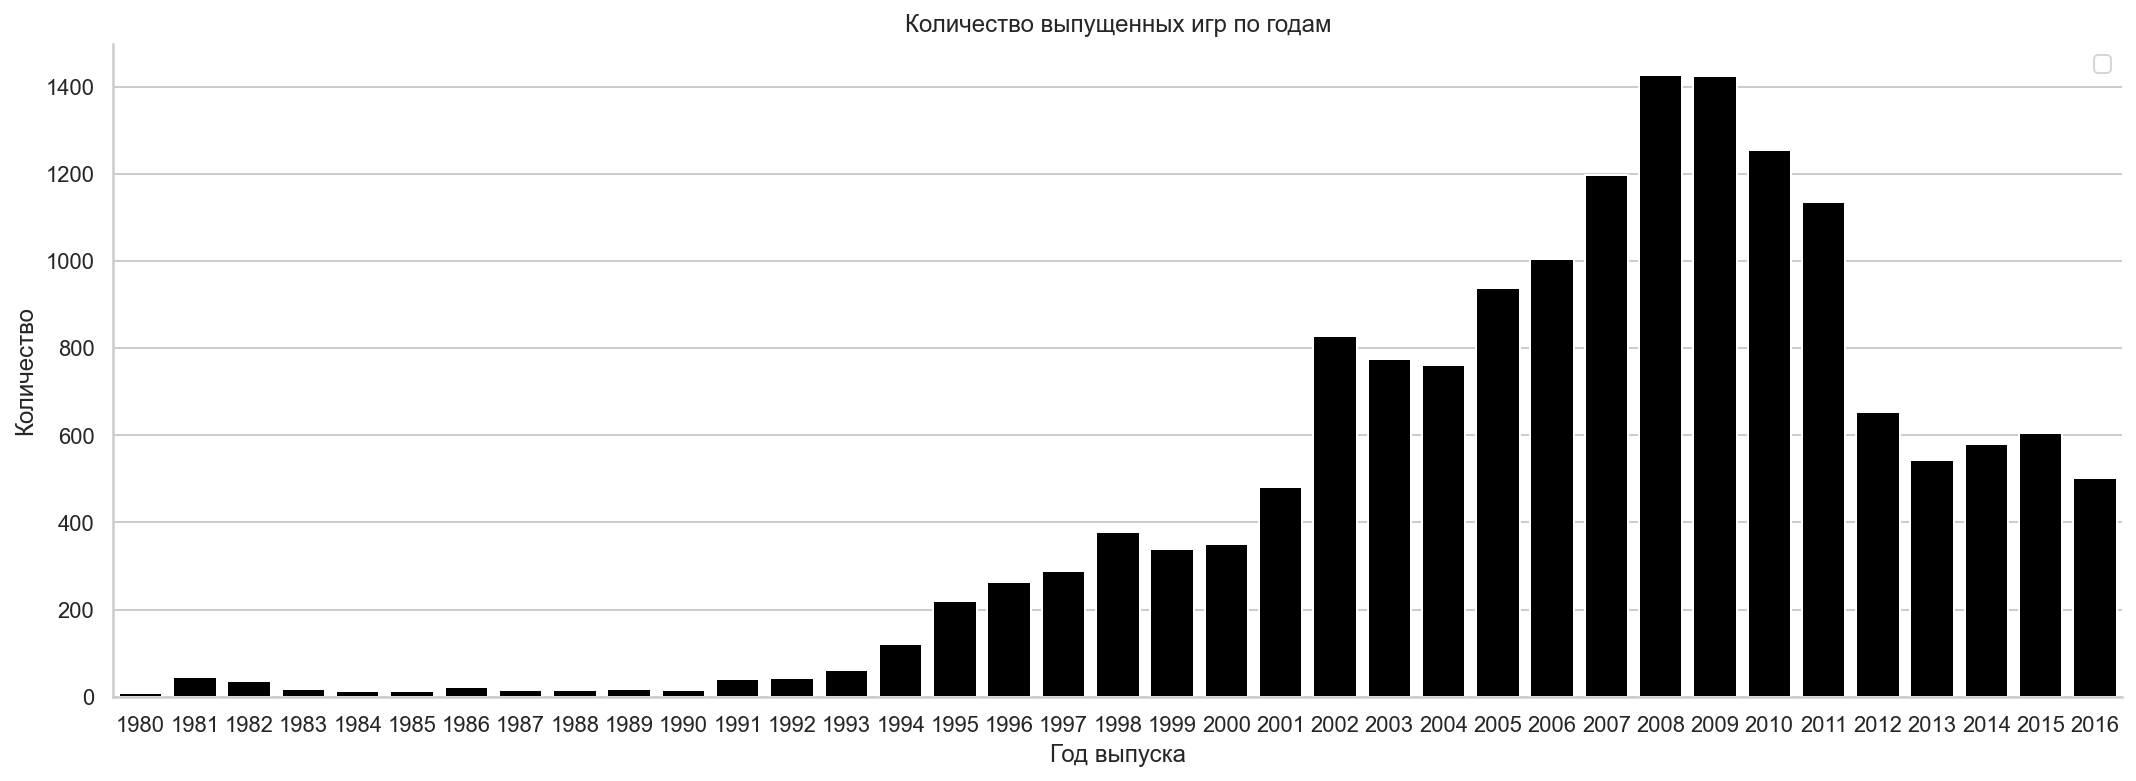

In [34]:
plt.figure(figsize=(18,6))
sns.barplot(x=game_for_year.index, y='name',data=game_for_year.sort_values('name'), color='black')
plt.title("Количество выпущенных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество")
plt.legend('')

По данным видно, что производство игр до 1993 года было минимально, а начиная с 1994 года производство игр только возрастало. При этом можно заметить, что производство игр после 2009 года пошло на спад. Это может говорить нам о том, что до 2008 года производители игр массово выпускали игры и возможжно НЕ пытались сделать более качественный продукт, а начиная с 2009 производители сократили количество и начали делать качественные игры, при этом так же началось развитие мобильных технологий, игр и возможно часть производителей ушло в мобильную разработку. С 2012 по 2016, количество игр было примерно одинаковым.

Можно сделать вывод, что данные за период 1980 - 2011 гг. не показательны  для анализа так как глобально отличаются от более позднего периода.

###  Изучим как менялись продажи по платформам, а так же определим платформы с наибольшими суммарными продажами. Определим сколько "живет"  платформа.

In [35]:
game_for_platform = df.pivot_table(index=['platform'] , values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)
display(game_for_platform)

,all_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


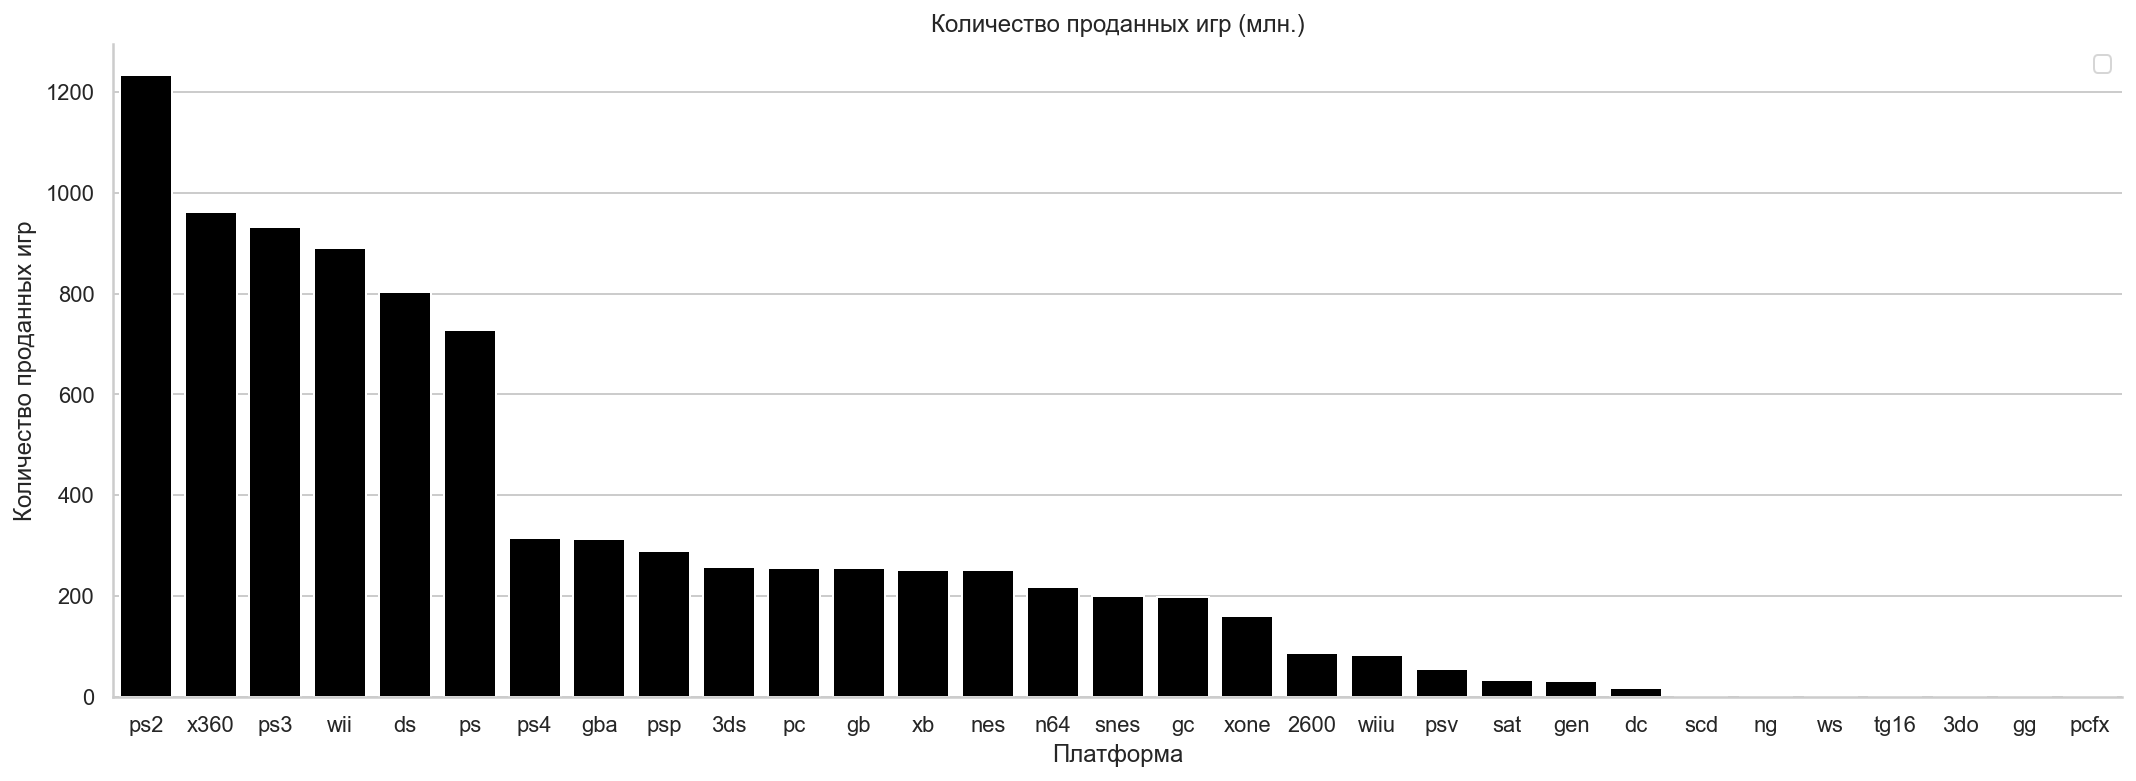

In [36]:
plt.figure(figsize=(18,6))
sns.barplot(x=game_for_platform.index, y='all_sales',data=game_for_platform, color='black')
plt.title("Количество проданных игр (млн.)")
plt.xlabel("Платформа")
plt.ylabel("Количество проданных игр")
plt.legend('')

In [37]:
print(' TOP-5 популярных платформ с ниибольшим количеством проданных копий игр:')
top_5 = game_for_platform.head(5)
display(top_5)

 TOP-5 популярных платформ с ниибольшим количеством проданных копий игр:


,all_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78


In [38]:
#функция для построения графика, которая создает сводные таблицы из df по платформе и году, 
# так же сделаем срез данных начиная с 2000 года
def get_pivot(data, platform):
#     minn=data[data['platform']==platform]['year_of_release'].min()
    data=data[(data['platform']==platform) & (data['year_of_release'] >= 2000) ]
    table = data.pivot_table(index='year_of_release', values='all_sales', aggfunc="sum").sort_values('year_of_release',ascending=False)
    return table

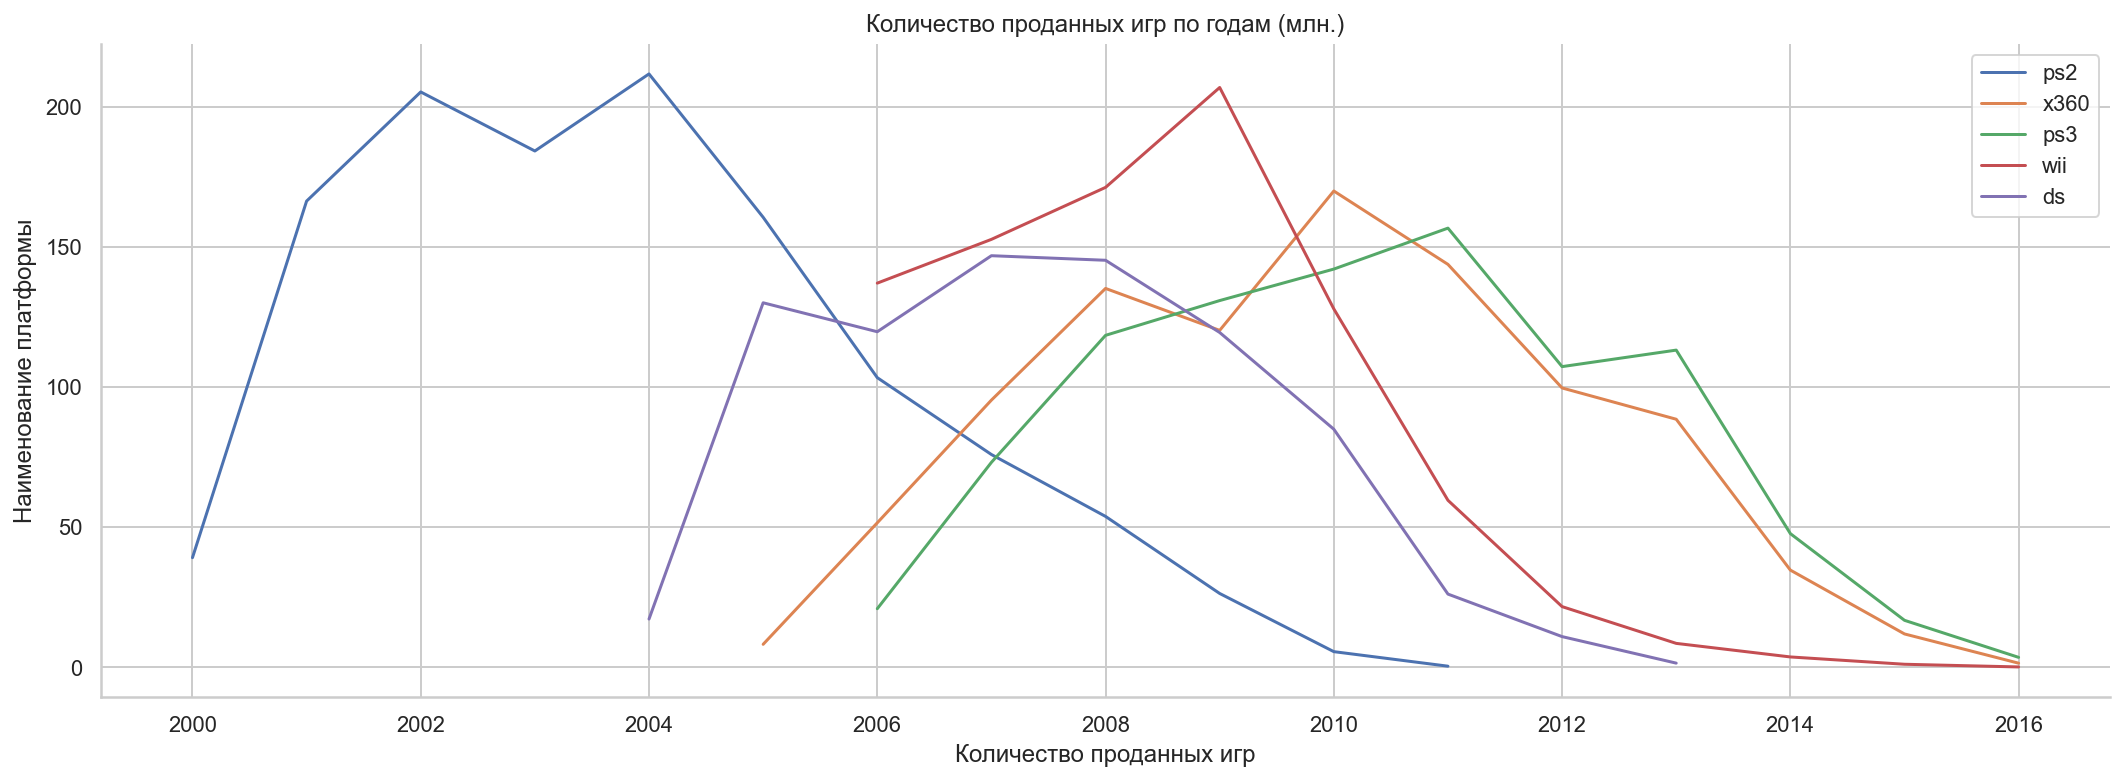

In [39]:
plt.figure(figsize=(18,6))
plt.title("Количество проданных игр по годам (млн.)")
plt.xlabel("Количество проданных игр")
plt.ylabel("Наименование платформы")
for i in list(top_5.index):
    sns.lineplot(data=get_pivot(df,i)['all_sales'], label=i)
    plt.legend()

In [40]:
counter = 5
s = 0
arr = []
for i in list(top_5.index):
    minn=df[(df['platform']==i) & (df['year_of_release']>=2000)]['year_of_release'].min()
    maxx=df[(df['platform']==i) & (df['year_of_release']>=2000)]['year_of_release'].max()
    counter += 1
    s += maxx - minn
    arr.append(maxx - minn)
    print(f'Платформа {i}: период действия  {maxx - minn} лет (c {minn} по {maxx})')
print()
print(f'Среднее количество лет существования компаний {np.mean(arr):.0f} лет')



Платформа ps2: период действия  11 лет (c 2000 по 2011)
Платформа x360: период действия  11 лет (c 2005 по 2016)
Платформа ps3: период действия  10 лет (c 2006 по 2016)
Платформа wii: период действия  10 лет (c 2006 по 2016)
Платформа ds: период действия  9 лет (c 2004 по 2013)

Среднее количество лет существования компаний 10 лет


По графику видно, что компании меняются в среднем в течении 10 лет, при этом компания "ds" существовала в течении 28 лет, но ее прадажи били минимальны до 2004 года, и если рассматривать в разрезе сущесnвования других 4-х компаний - так же сравнима с 10 годами.

Пик продаж по всем компаниям приходит через 4-5 лет.

Актуальный период для прогноза на 2017 год определим как 2012-2016 гг. Так как в этот период отсутсвуют резкие скачки и они наиболее приближены к прогнозируемому периоду, а так же как мы  определили что пики приходятся на 4-5 год существования платофрмы.

Сделаем срез данных согласно актуальному периоду c 2012 по 2016 году.

### Изучим данные за актуальный период c 2012 по 2016 году.

In [41]:
df2=df.query('year_of_release >= 2012')

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [42]:
game_for_platform2 = df2.pivot_table(index="platform", values="all_sales", aggfunc="sum").sort_values("all_sales",ascending=False)
display(game_for_platform2)

,all_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


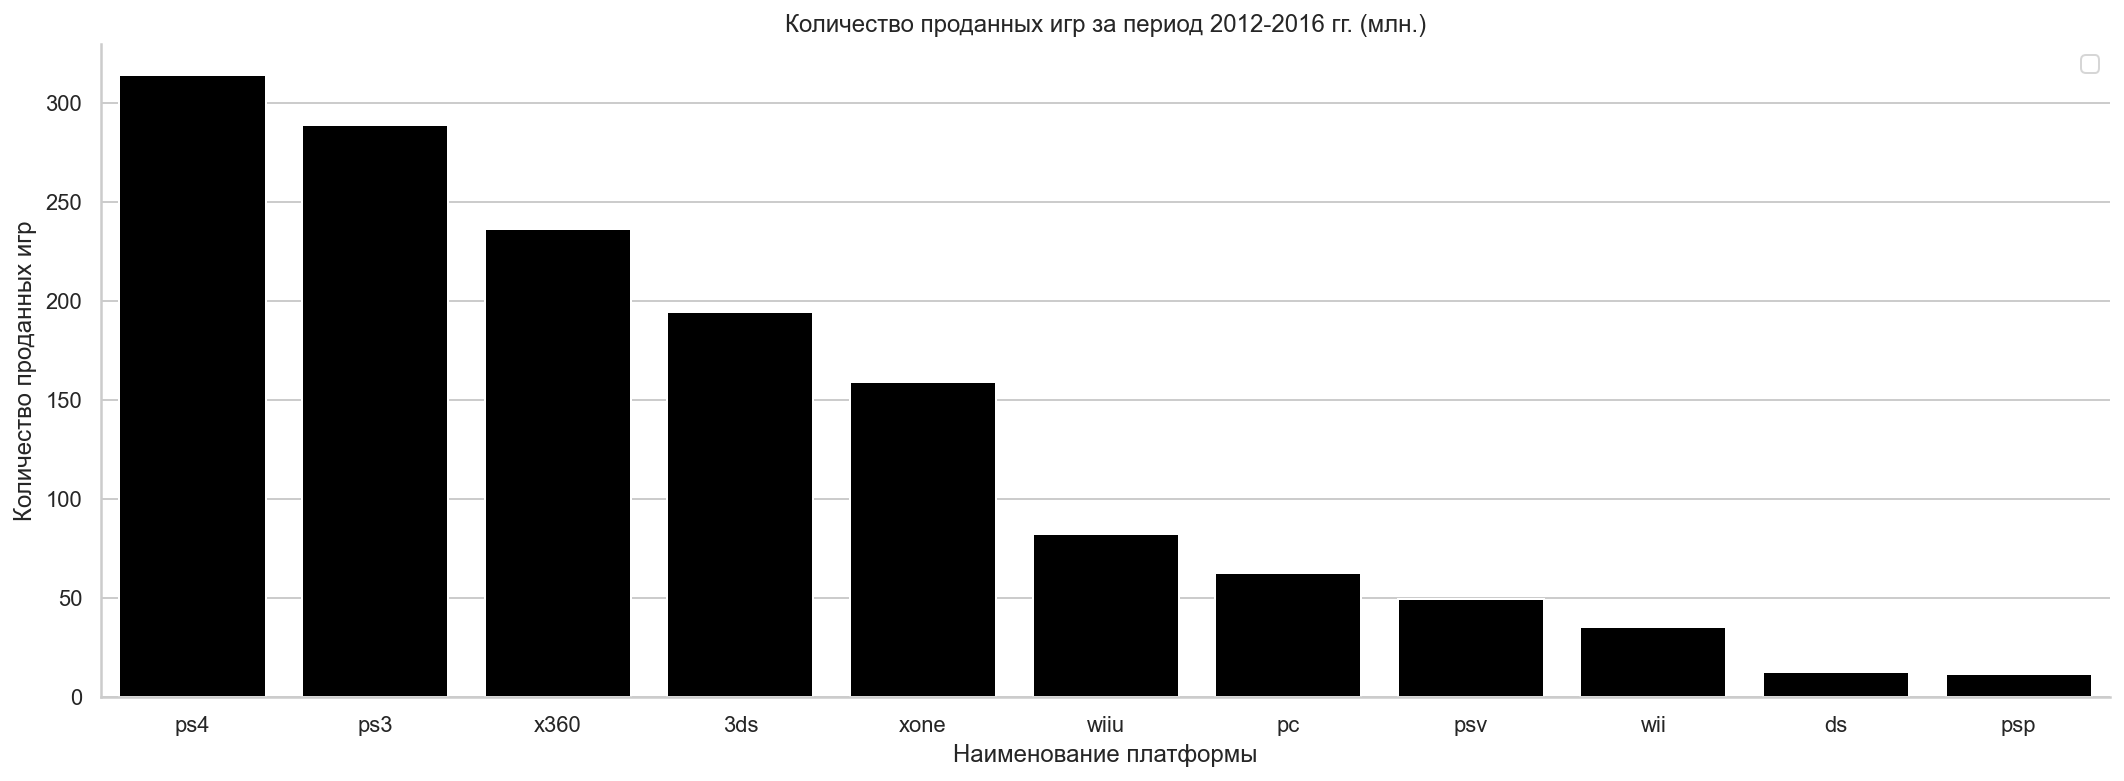

In [43]:
plt.figure(figsize=(18,6))
sns.barplot(x=game_for_platform2.index, y='all_sales',data=game_for_platform2, color='black')
plt.title("Количество проданных игр за период 2012-2016 гг. (млн.)")
plt.xlabel("Наименование платформы")
plt.ylabel("Количество проданных игр")
plt.legend('')

In [44]:
#функция для построения графика, которая создает сводные таблицы из df по платформе и году, 
def get_pivot(data, platform):
    data=data[(data['platform']==platform)]
    table = data.pivot_table(index='year_of_release', values='all_sales', aggfunc="sum").sort_values('year_of_release',ascending=False)
    return table

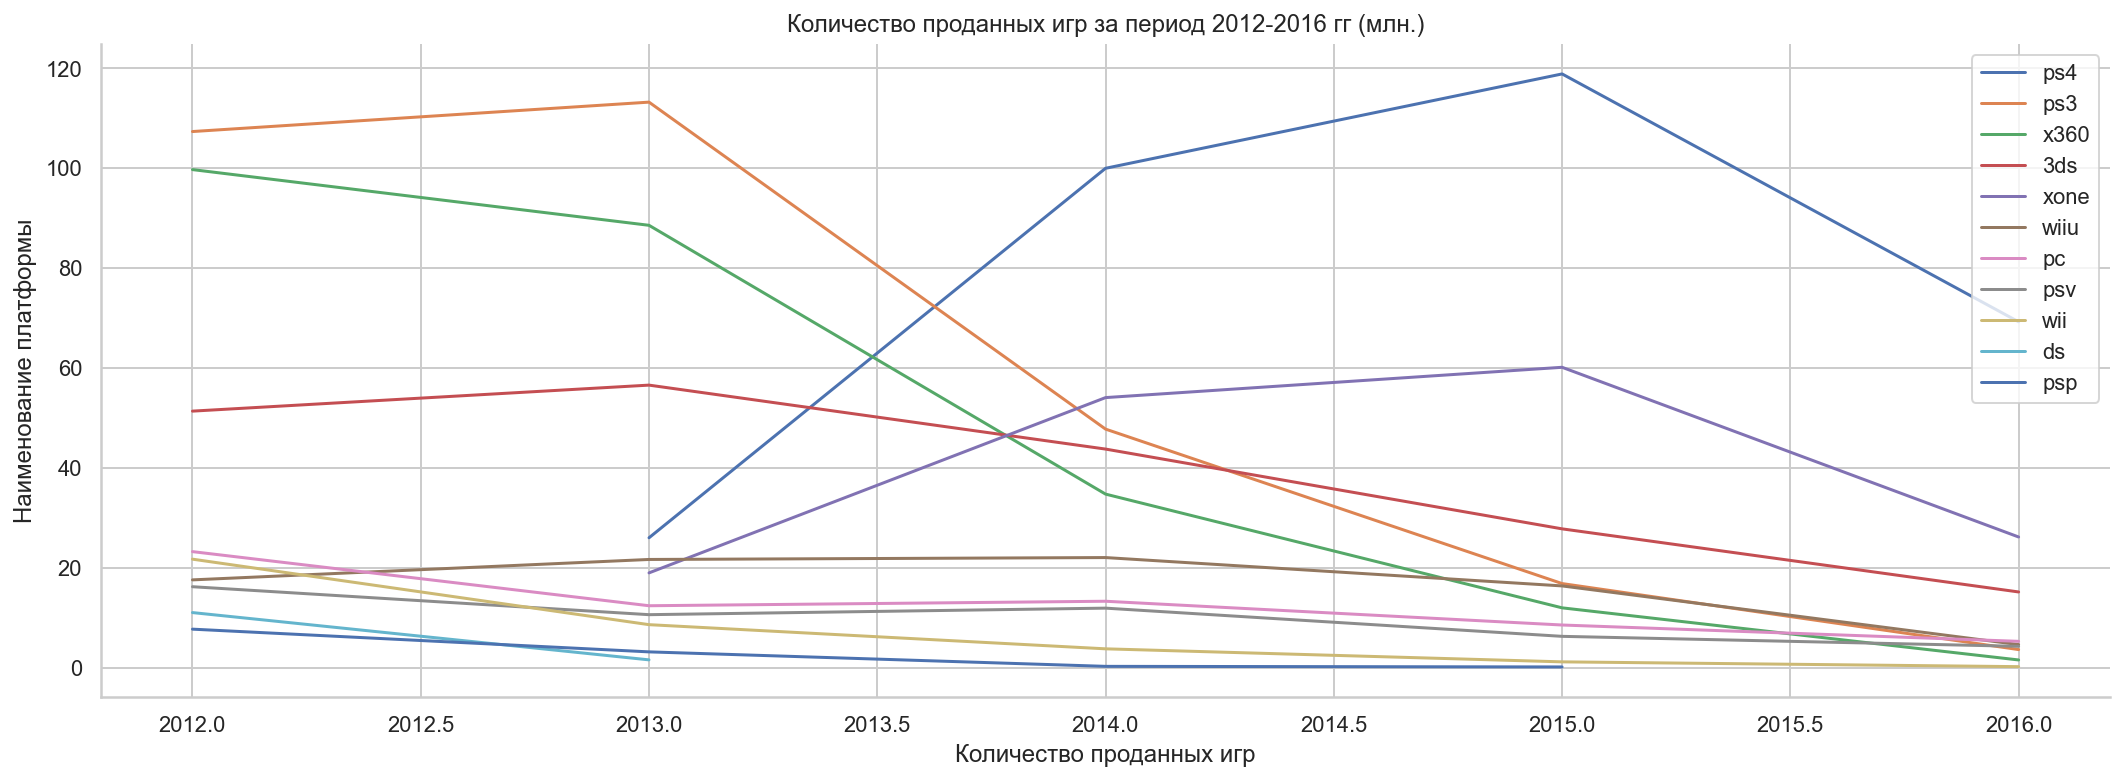

In [50]:
plt.figure(figsize=(18,6))
plt.title("Количество проданных игр за период 2012-2016 гг (млн.)")
plt.xlabel("Количество проданных игр")
plt.ylabel("Наименование платформы")
for i in list(game_for_platform2.index):
    sns.lineplot(data=get_pivot(df2,i)['all_sales'], label=i)
    plt.legend()

In [51]:
list(game_for_platform2.index)

['ps4', 'ps3', 'x360', '3ds', 'xone', 'wiiu', 'pc', 'psv', 'wii', 'ds', 'psp']

Посмотрм на график продаж для каждой платформ:

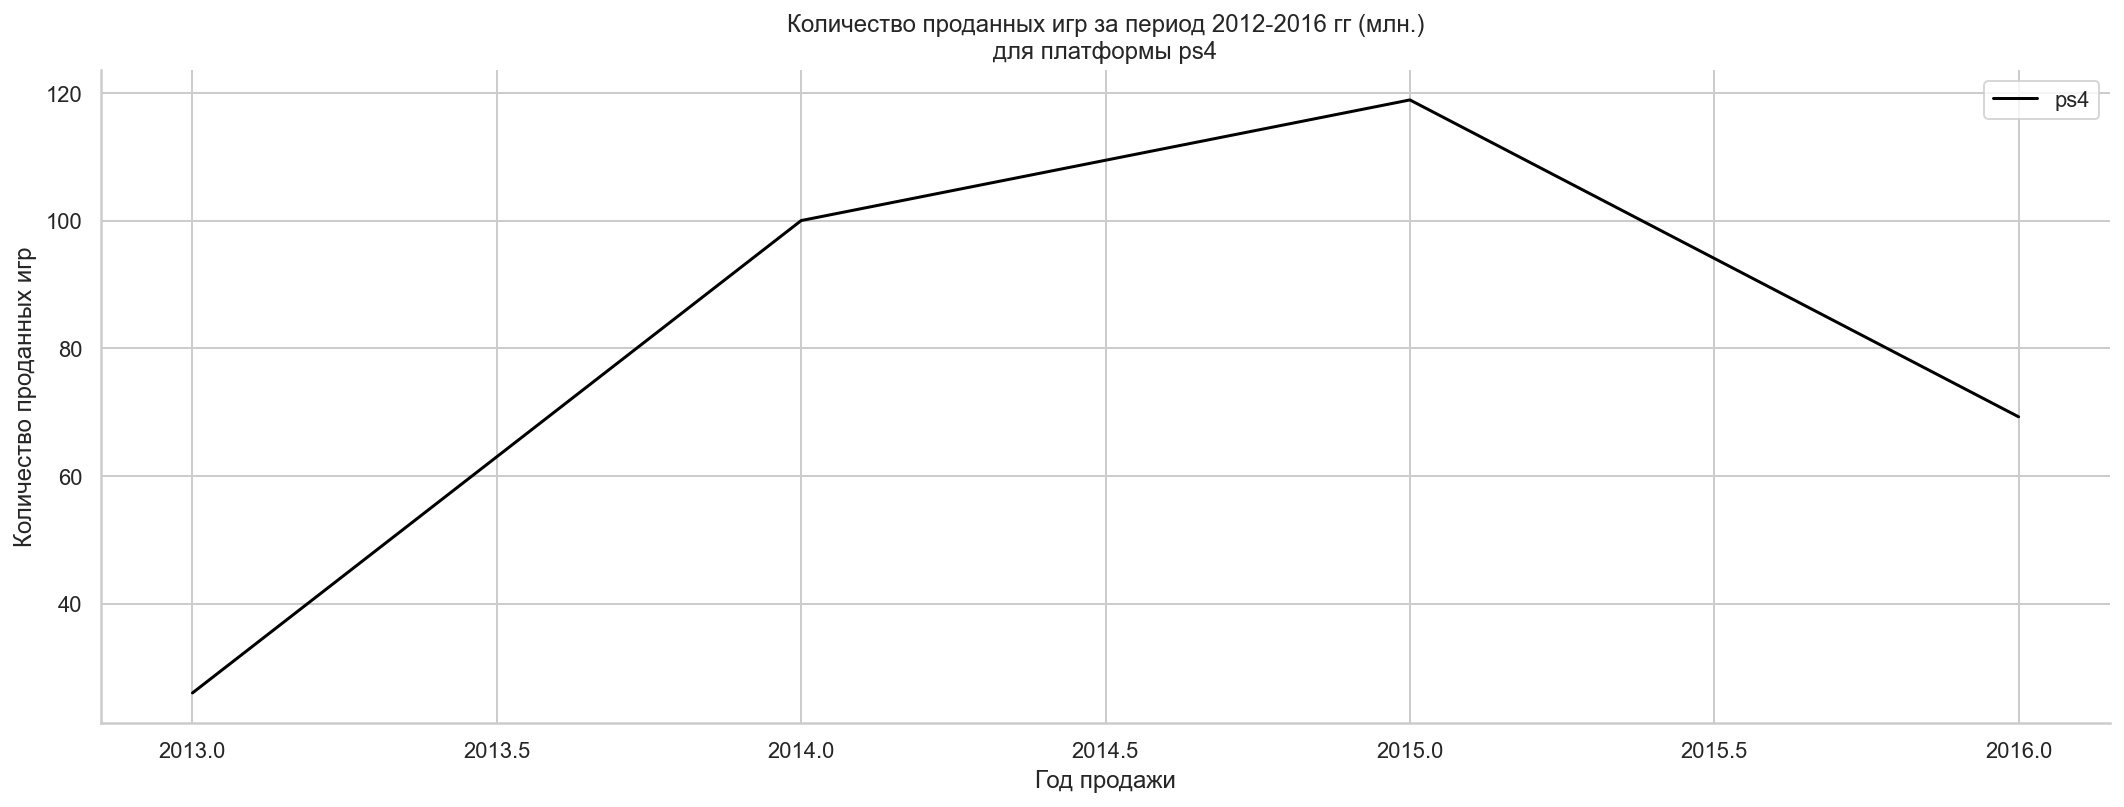

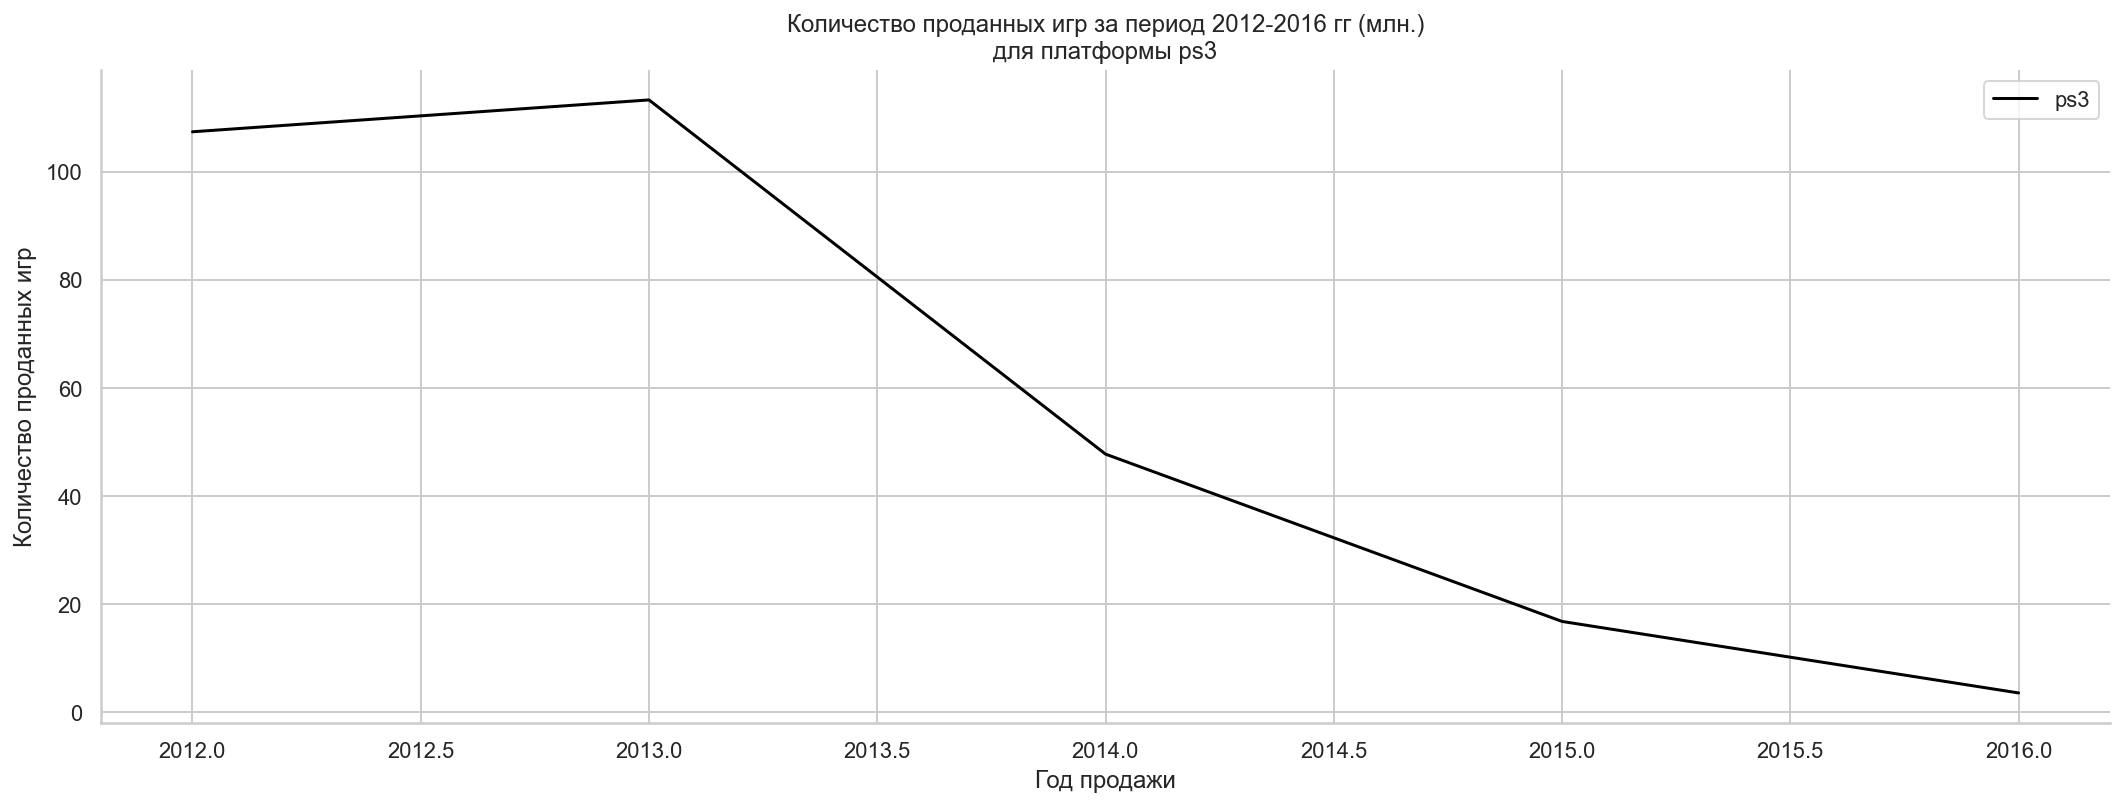

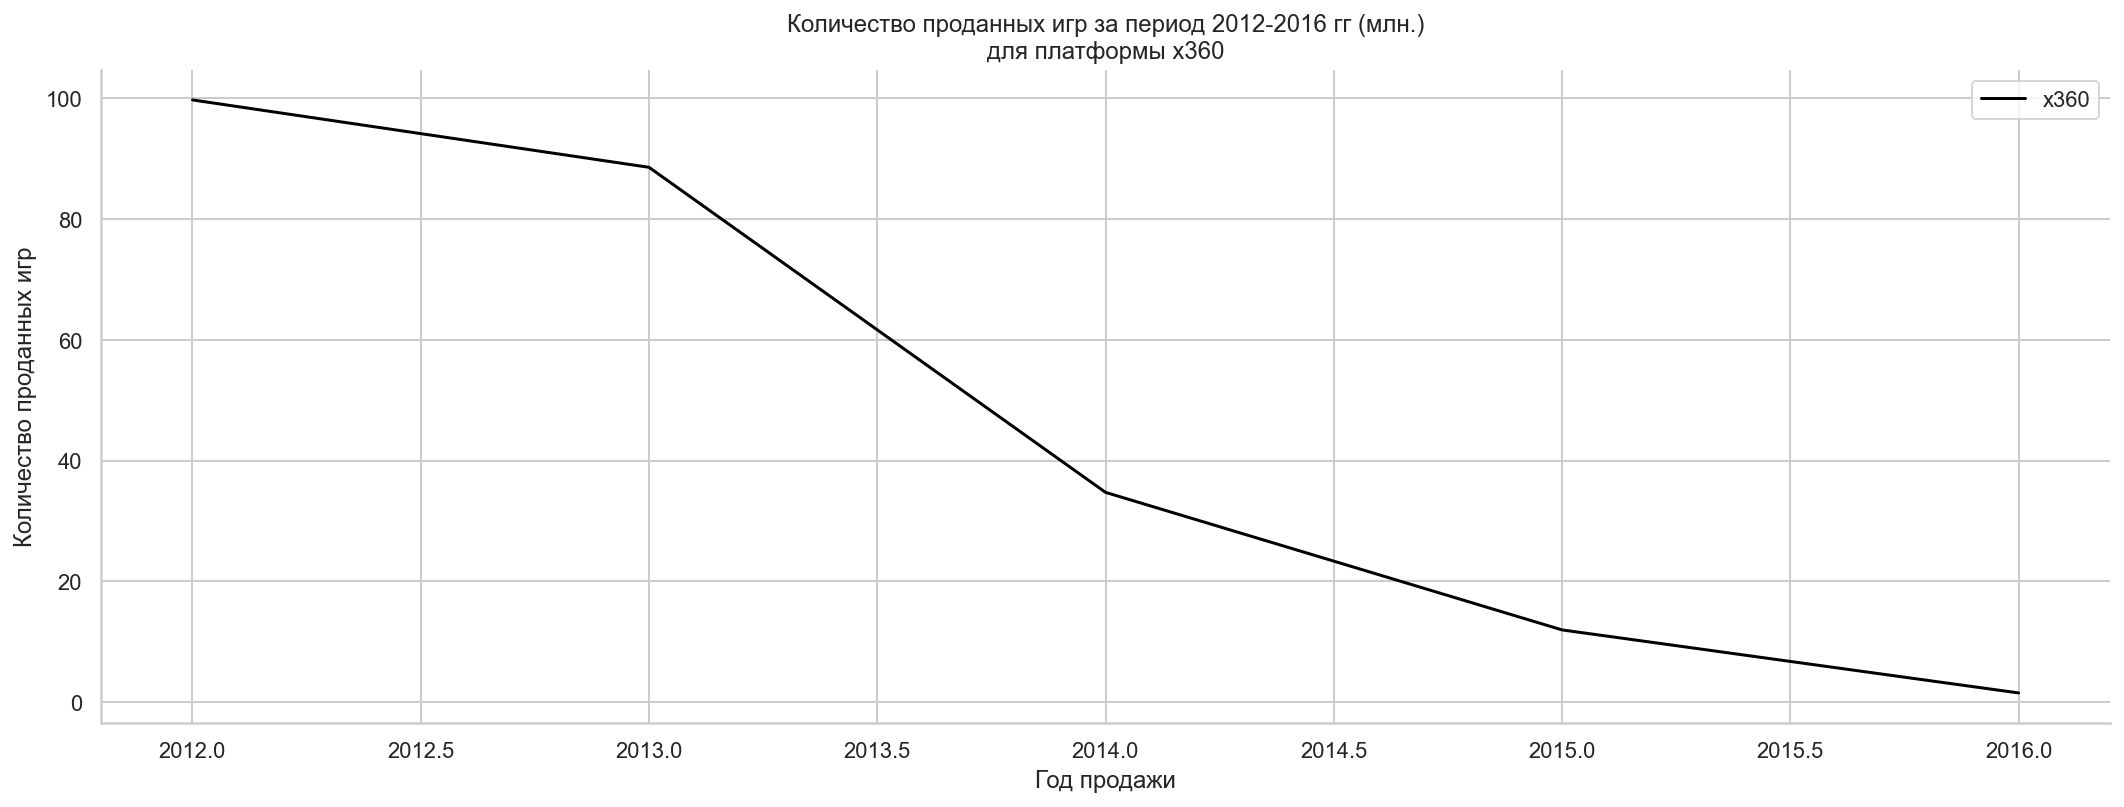

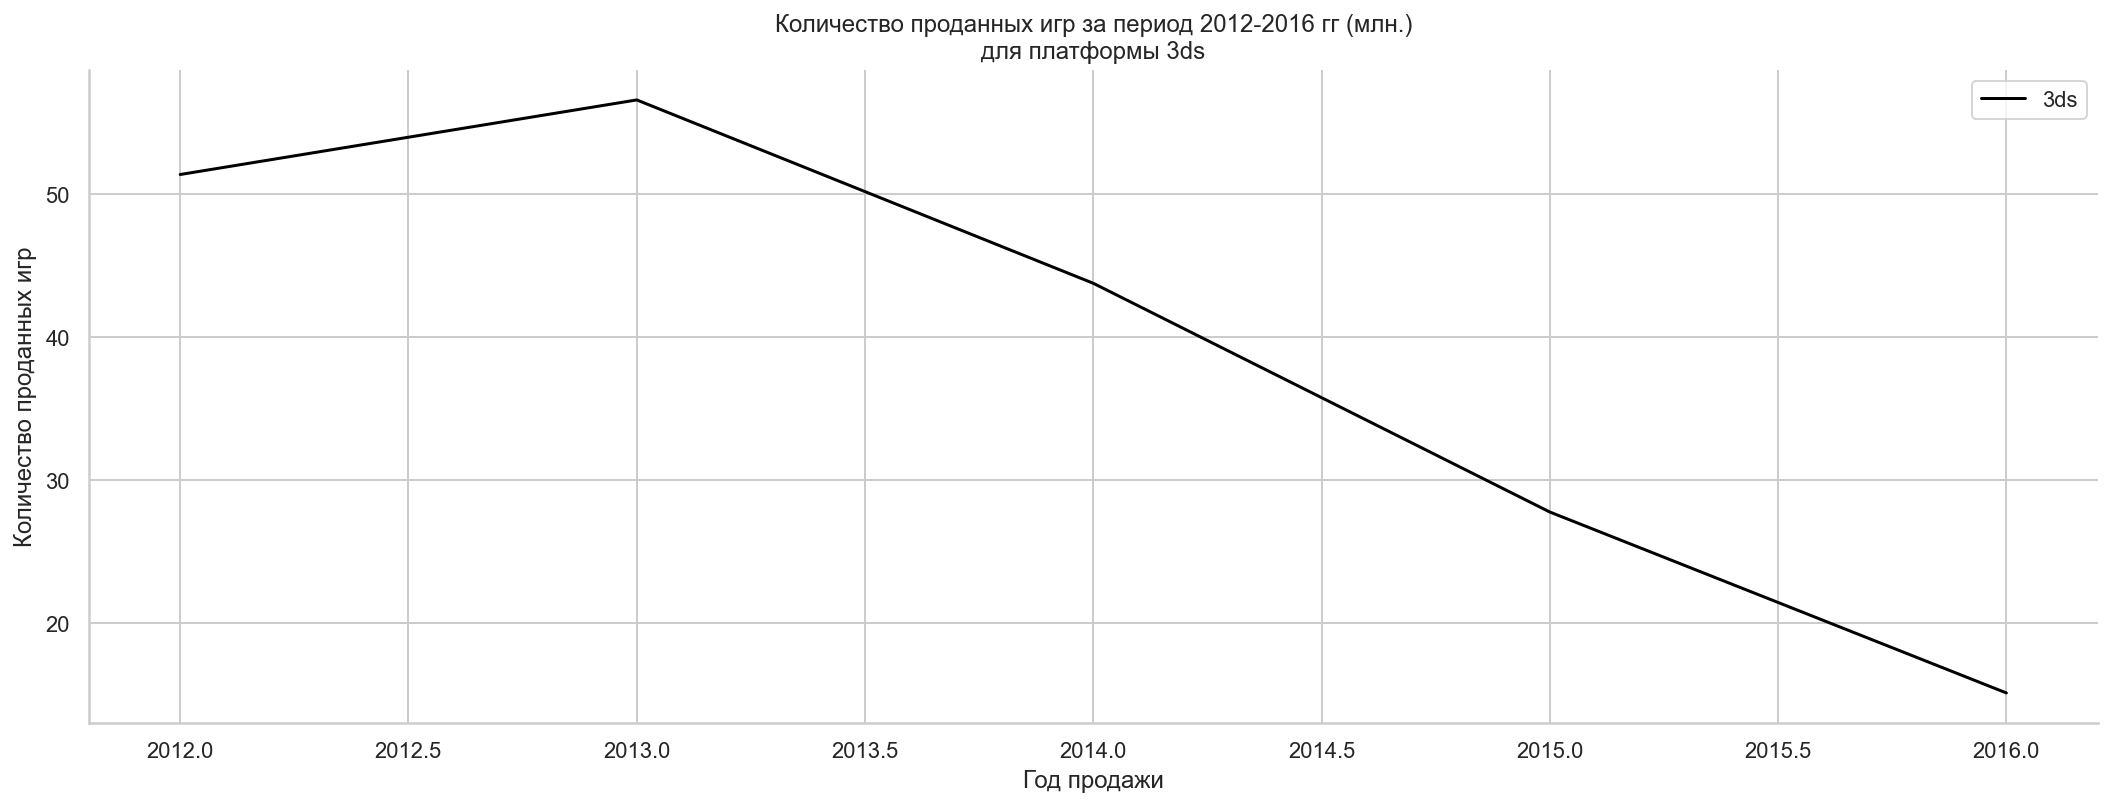

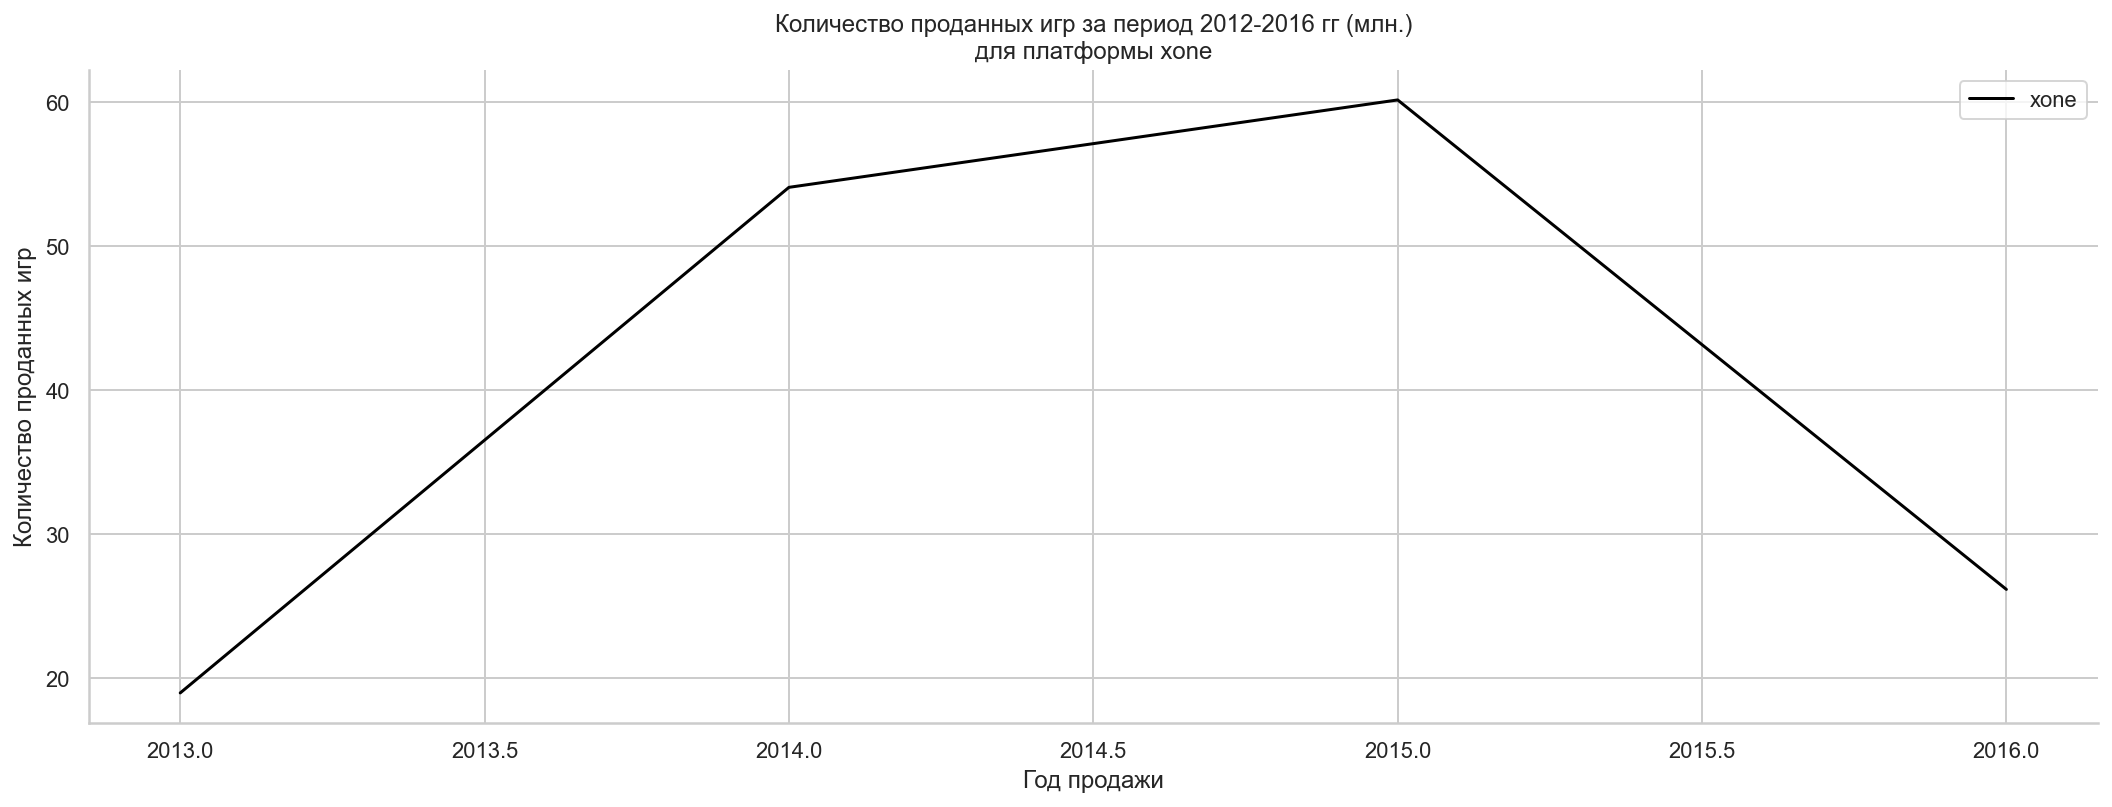

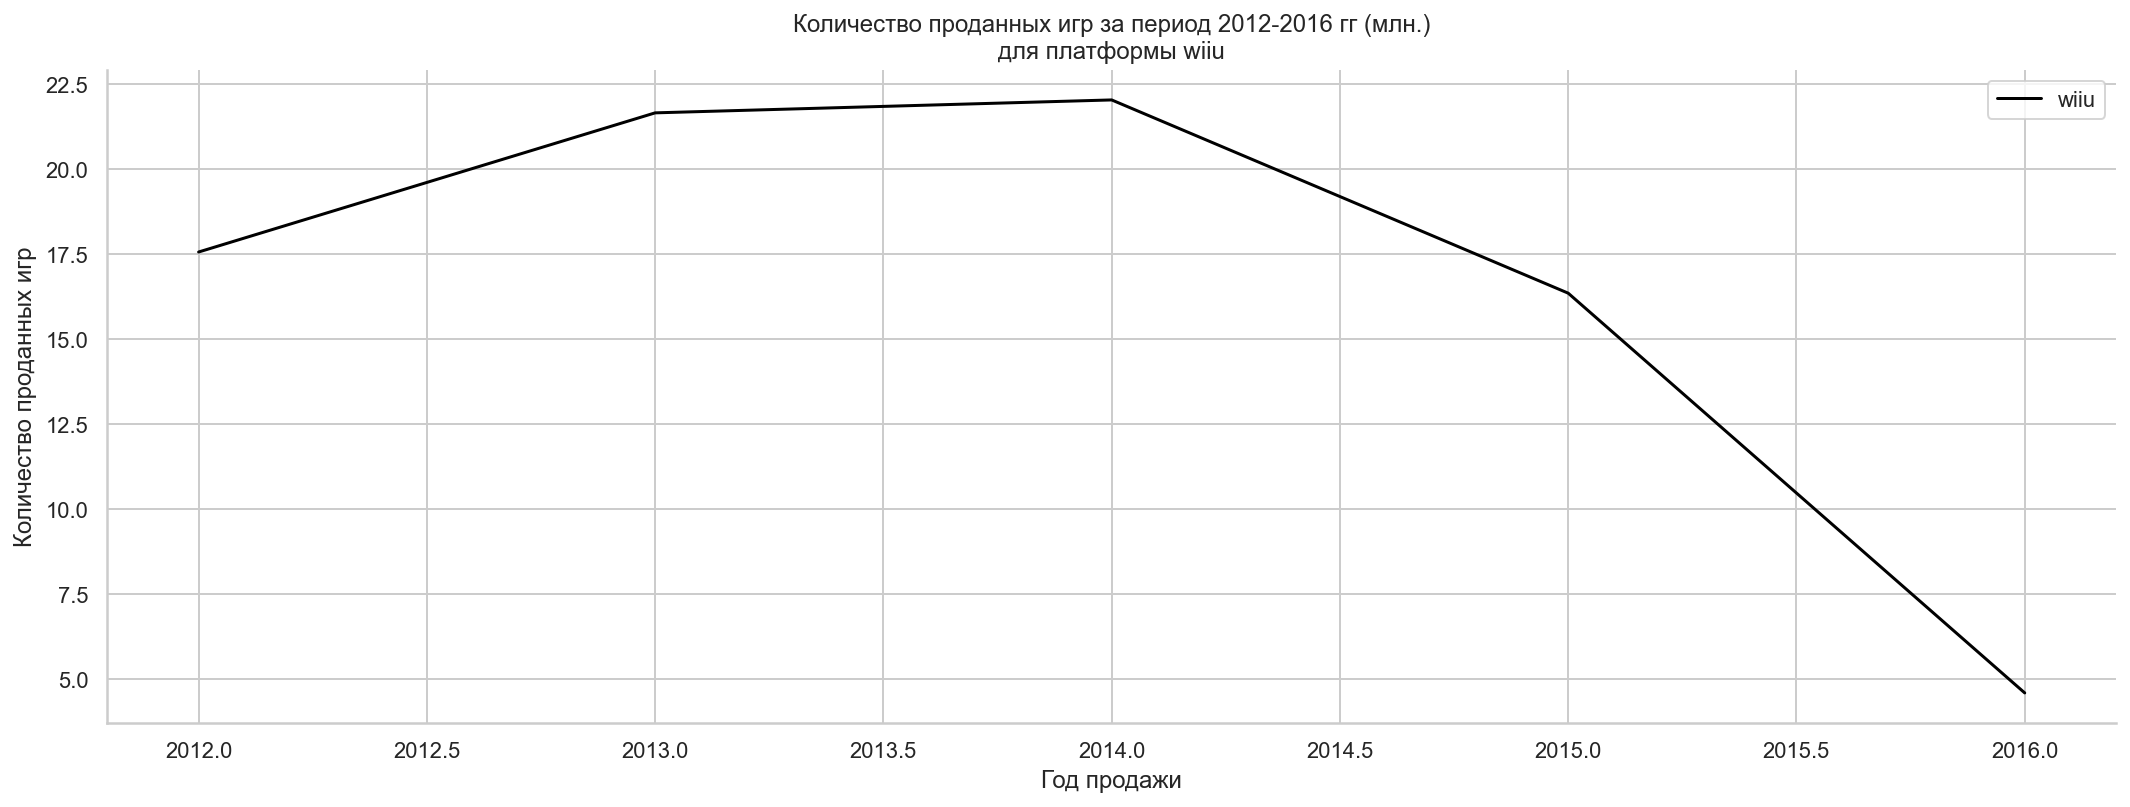

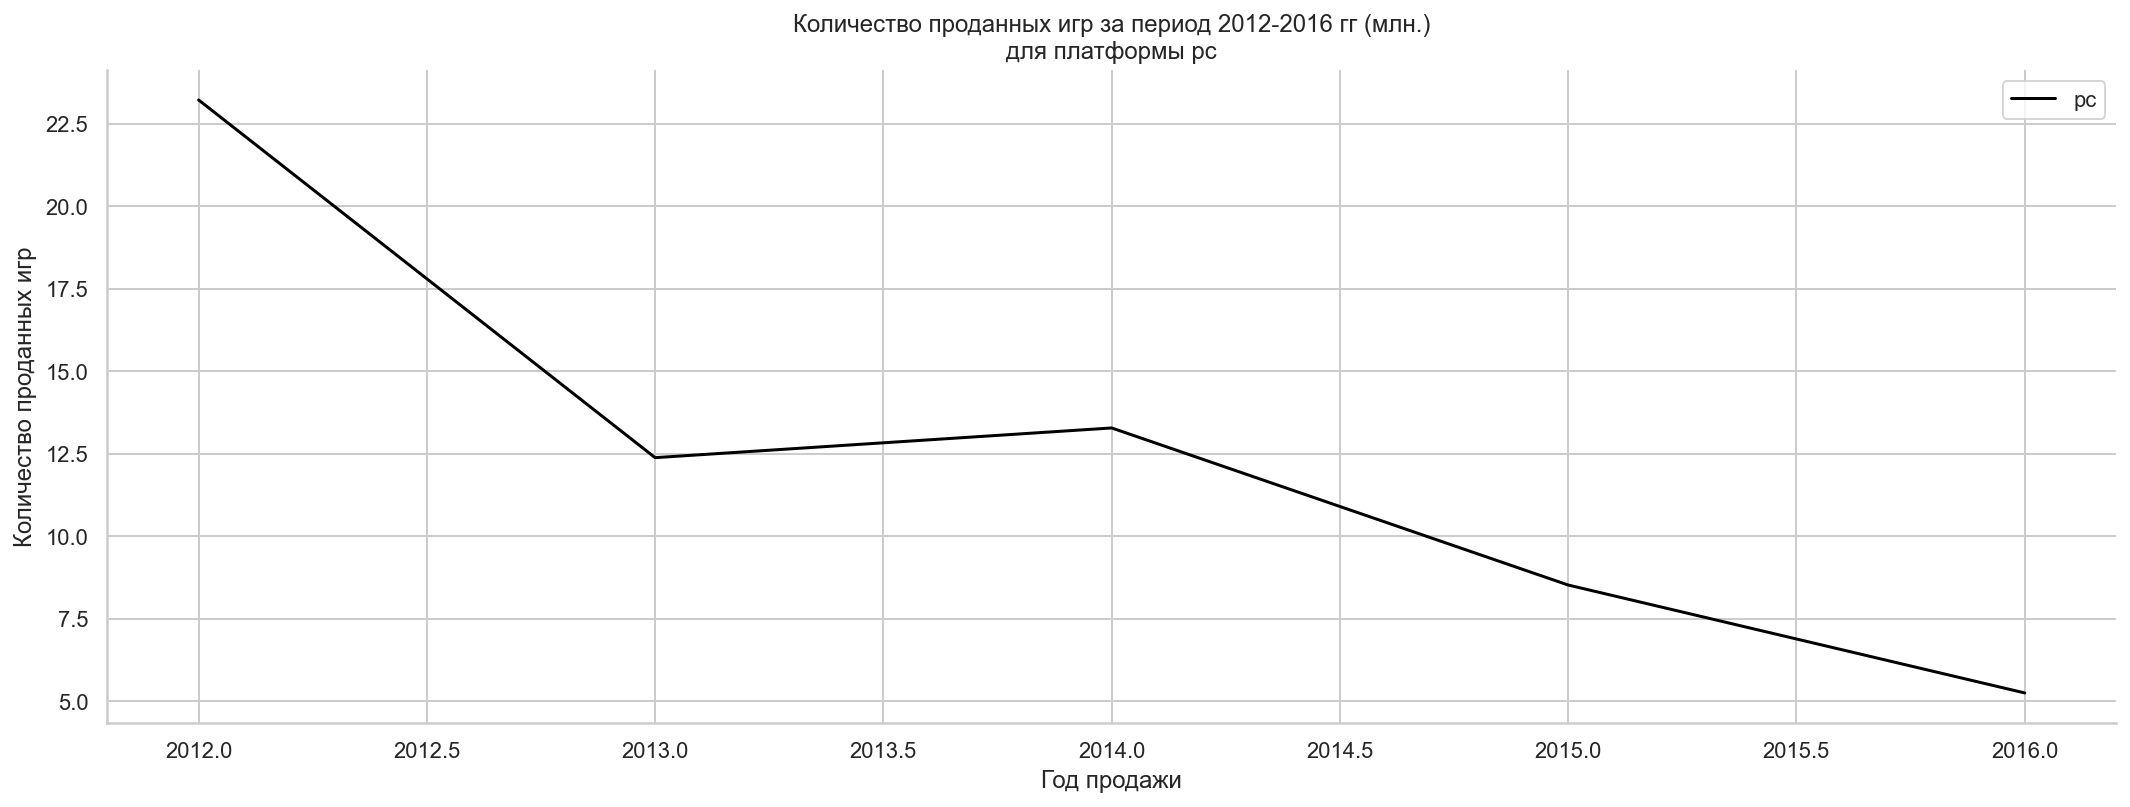

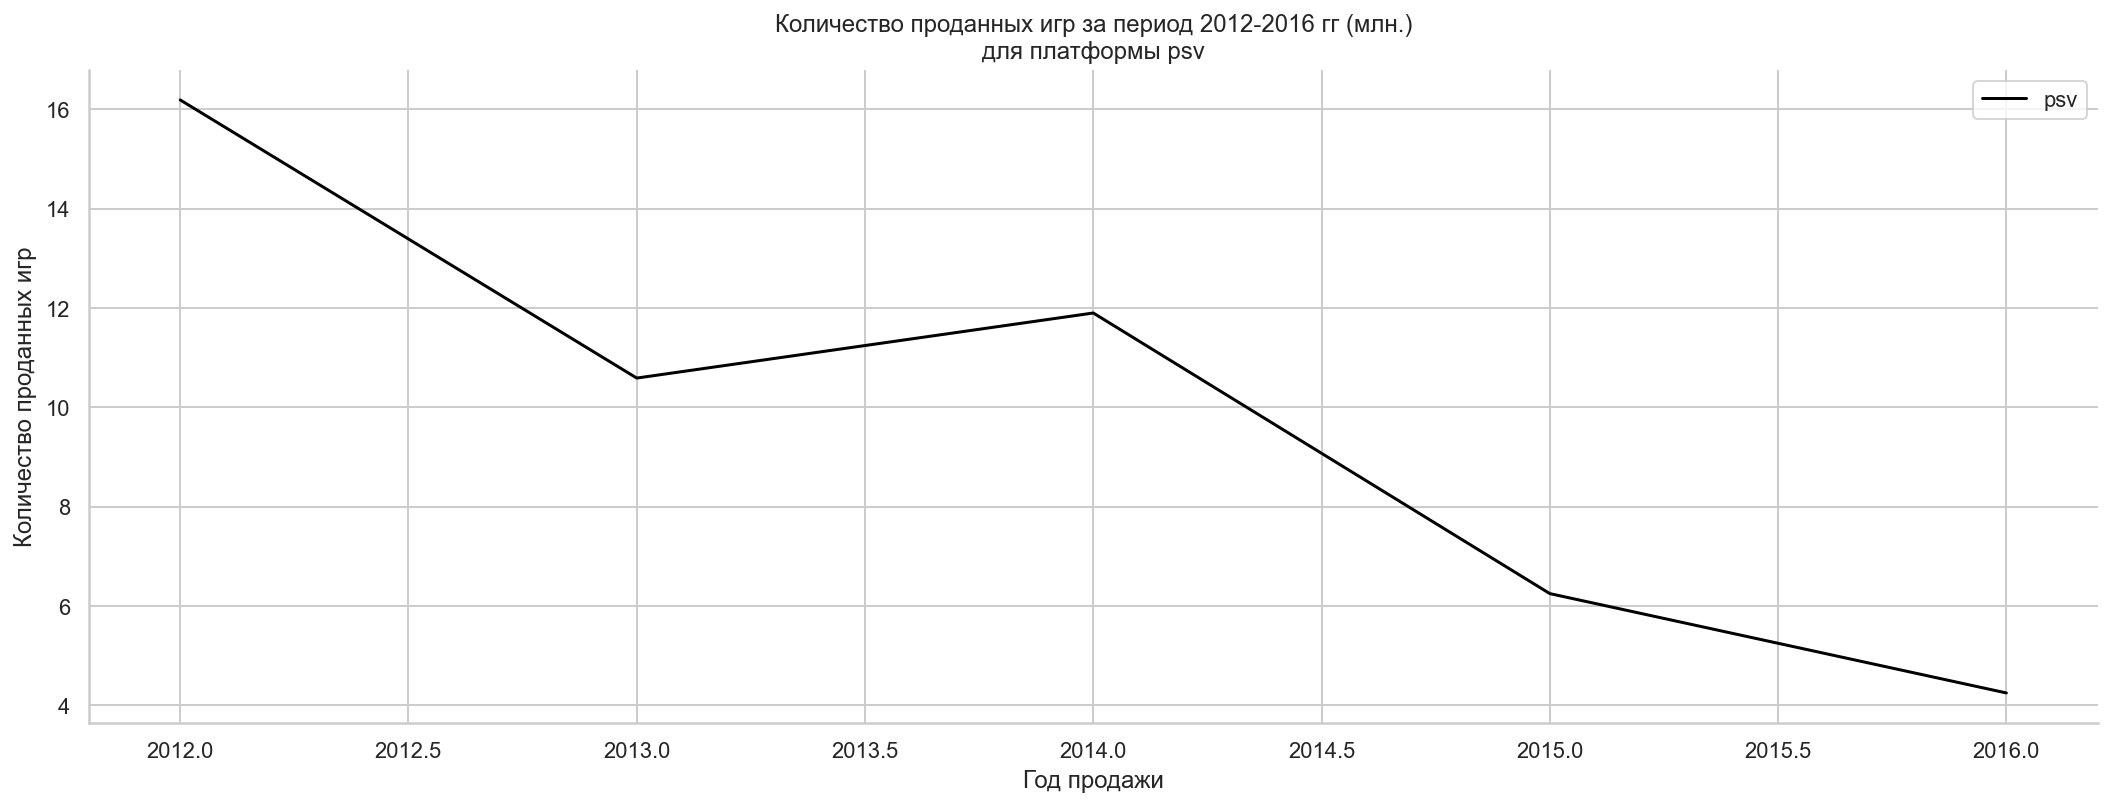

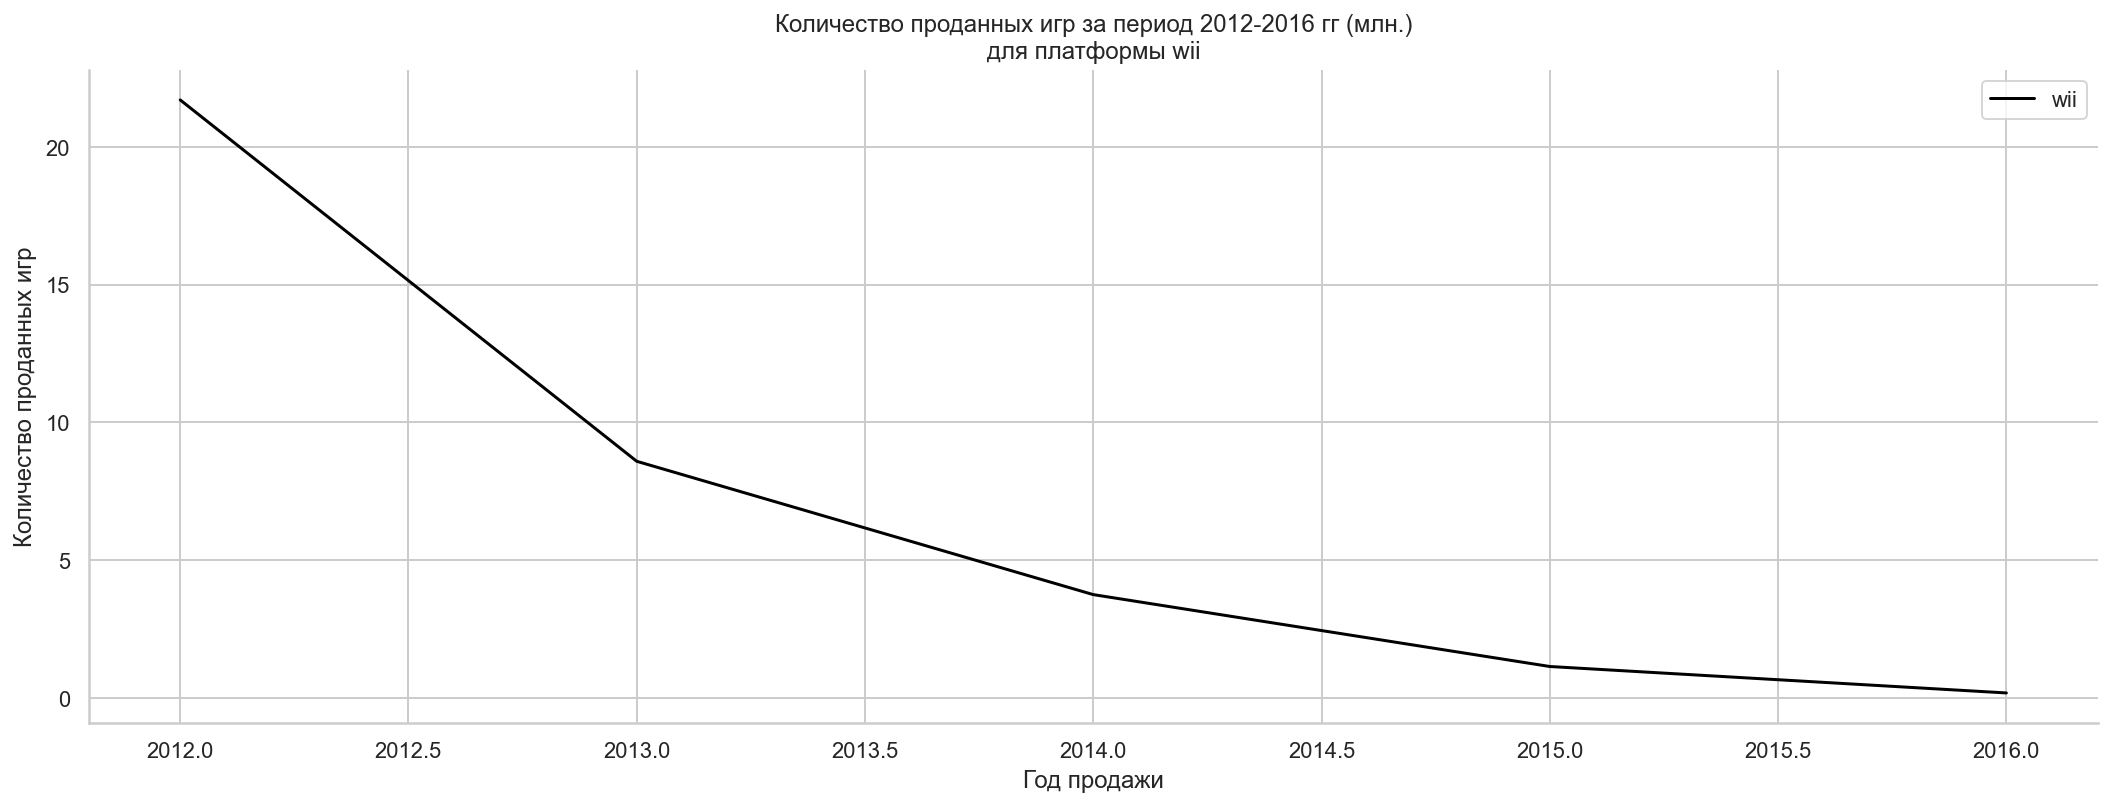

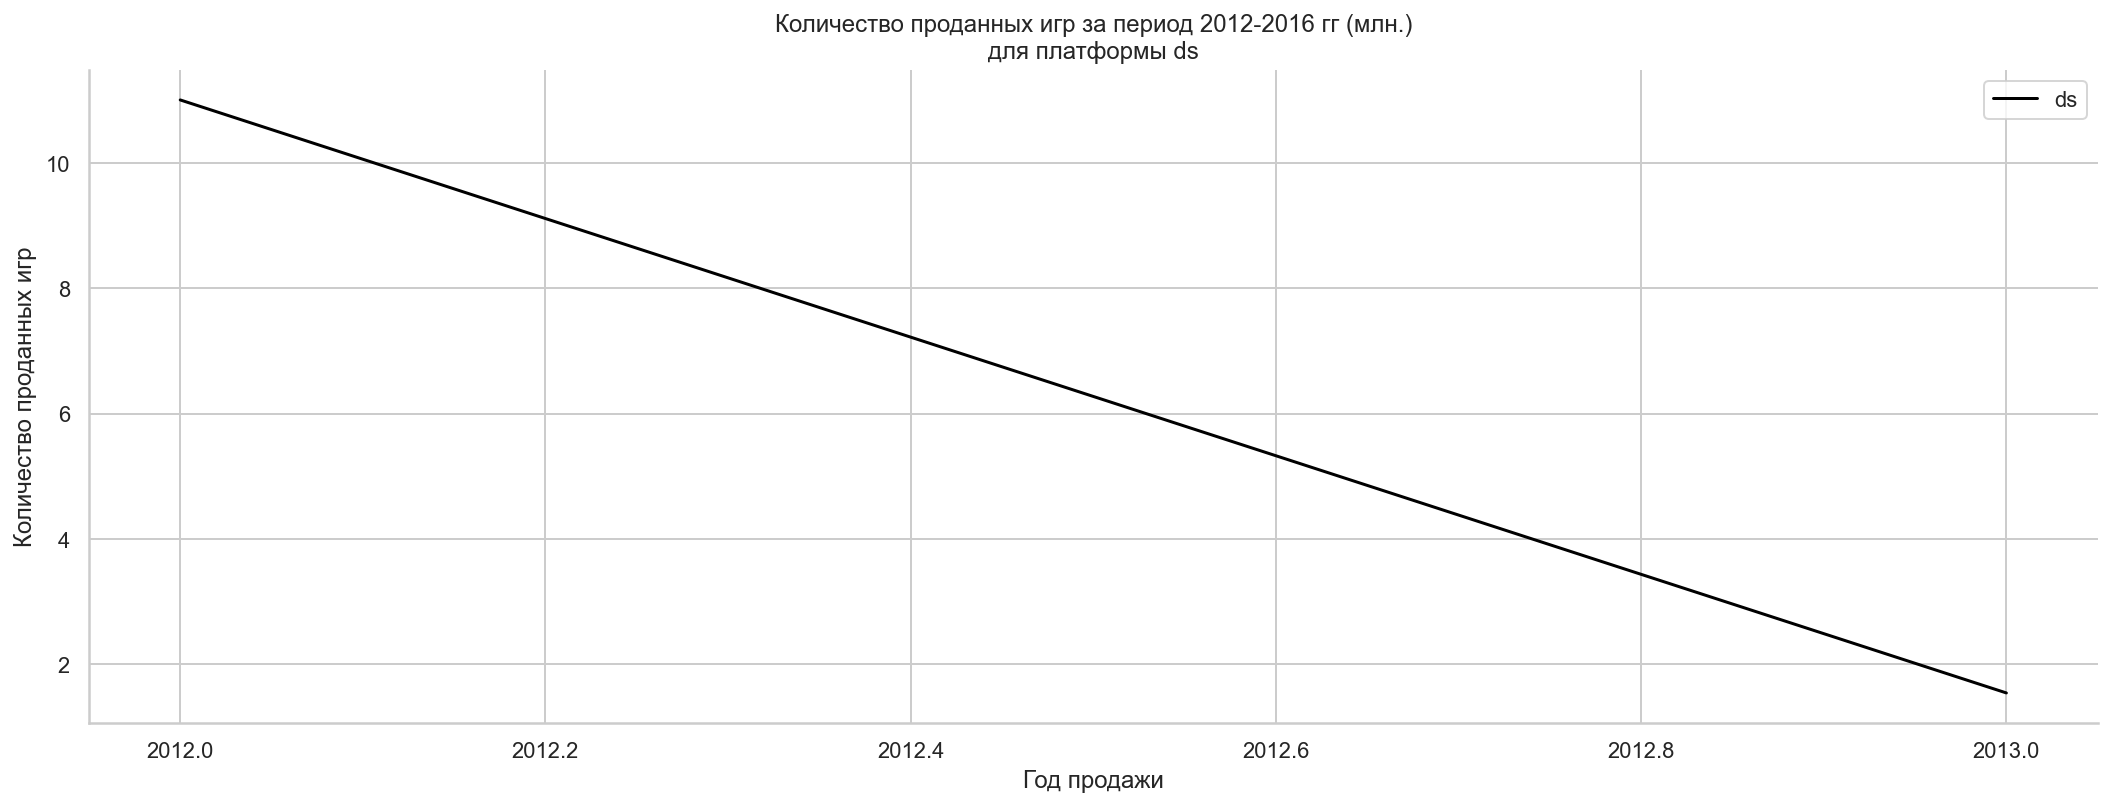

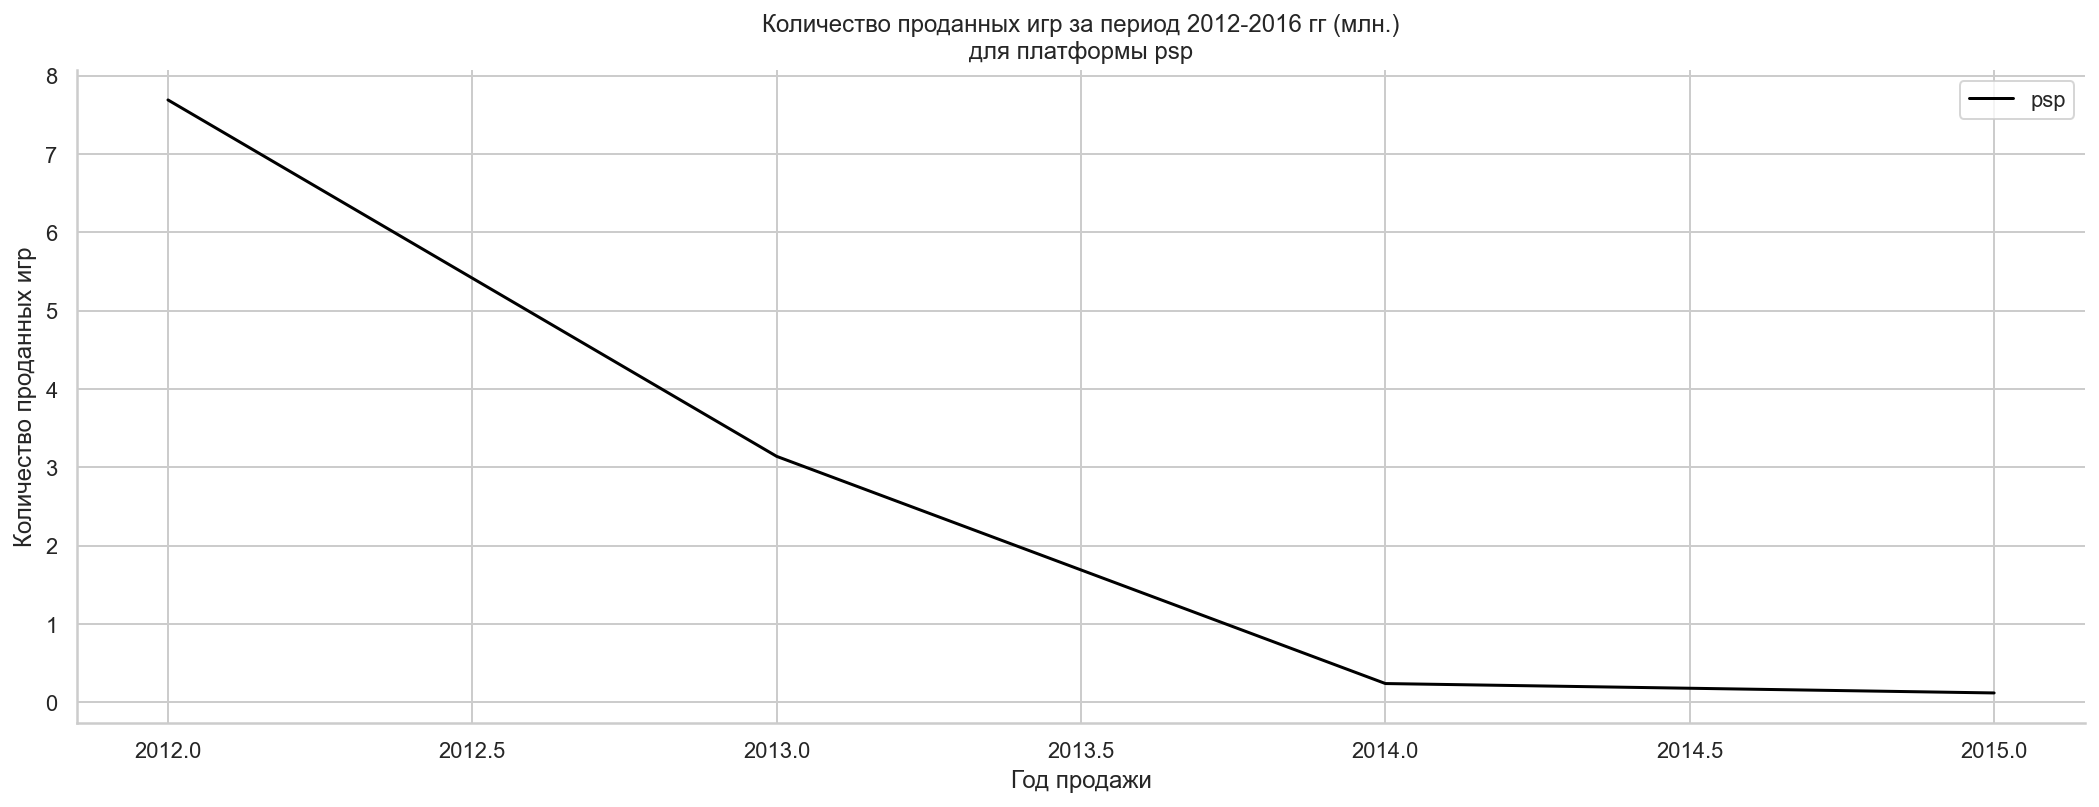

In [52]:
for i in list(game_for_platform2.index):
    plt.figure(figsize=(18,6))
    plt.title(f'Количество проданных игр за период 2012-2016 гг (млн.)\nдля платформы {i}')
    plt.xlabel("Год продажи")
    plt.ylabel("Количество проданных игр")
    sns.lineplot(data=get_pivot(df2,i)['all_sales'], label=i, color='black')
    plt.legend()

In [53]:
print(f'Лидируют по продажам платформы:')
display(game_for_platform2.head(8))

Лидируют по продажам платформы:


,all_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18


При этом лидирующие по продажам платформы падают в продажах.

Потенциально прибыльными можно выбрать такие платформы как: ps4, xone, 3ds так как игры для этих платформ все еще продаются, так же в потенциальные прибыльные платформы можно включить wiiu и pc их продажи выше конкуретных, но при этом есть потенциал роста продаж.

Сделаем срез по актуальному периоду и потенциально прибыльным платформам и построим ящик с усами

In [54]:
df2 = df2[df2['platform'].isin(['ps4','xone','3ds','wiiu','pc'])]

In [55]:
# изучим статистичискеи данные выбранных платформ по продажам
display(df2.describe())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,813.000000,859.000000,1432.000000
mean,2014.372207,0.219546,0.208247,0.081774,0.058108,72.819188,6.679511,0.567675
std,1.346013,0.520860,0.523782,0.317967,0.154229,12.457634,1.507054,1.271066
min,2012.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.400000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,67.000000,5.900000,0.050000
50%,2015.000000,0.040000,0.045000,0.000000,0.010000,75.000000,7.000000,0.150000
75%,2016.000000,0.190000,0.170000,0.050000,0.040000,81.000000,7.800000,0.480000
max,2016.000000,6.030000,6.310000,4.390000,2.380000,97.000000,9.300000,14.630000


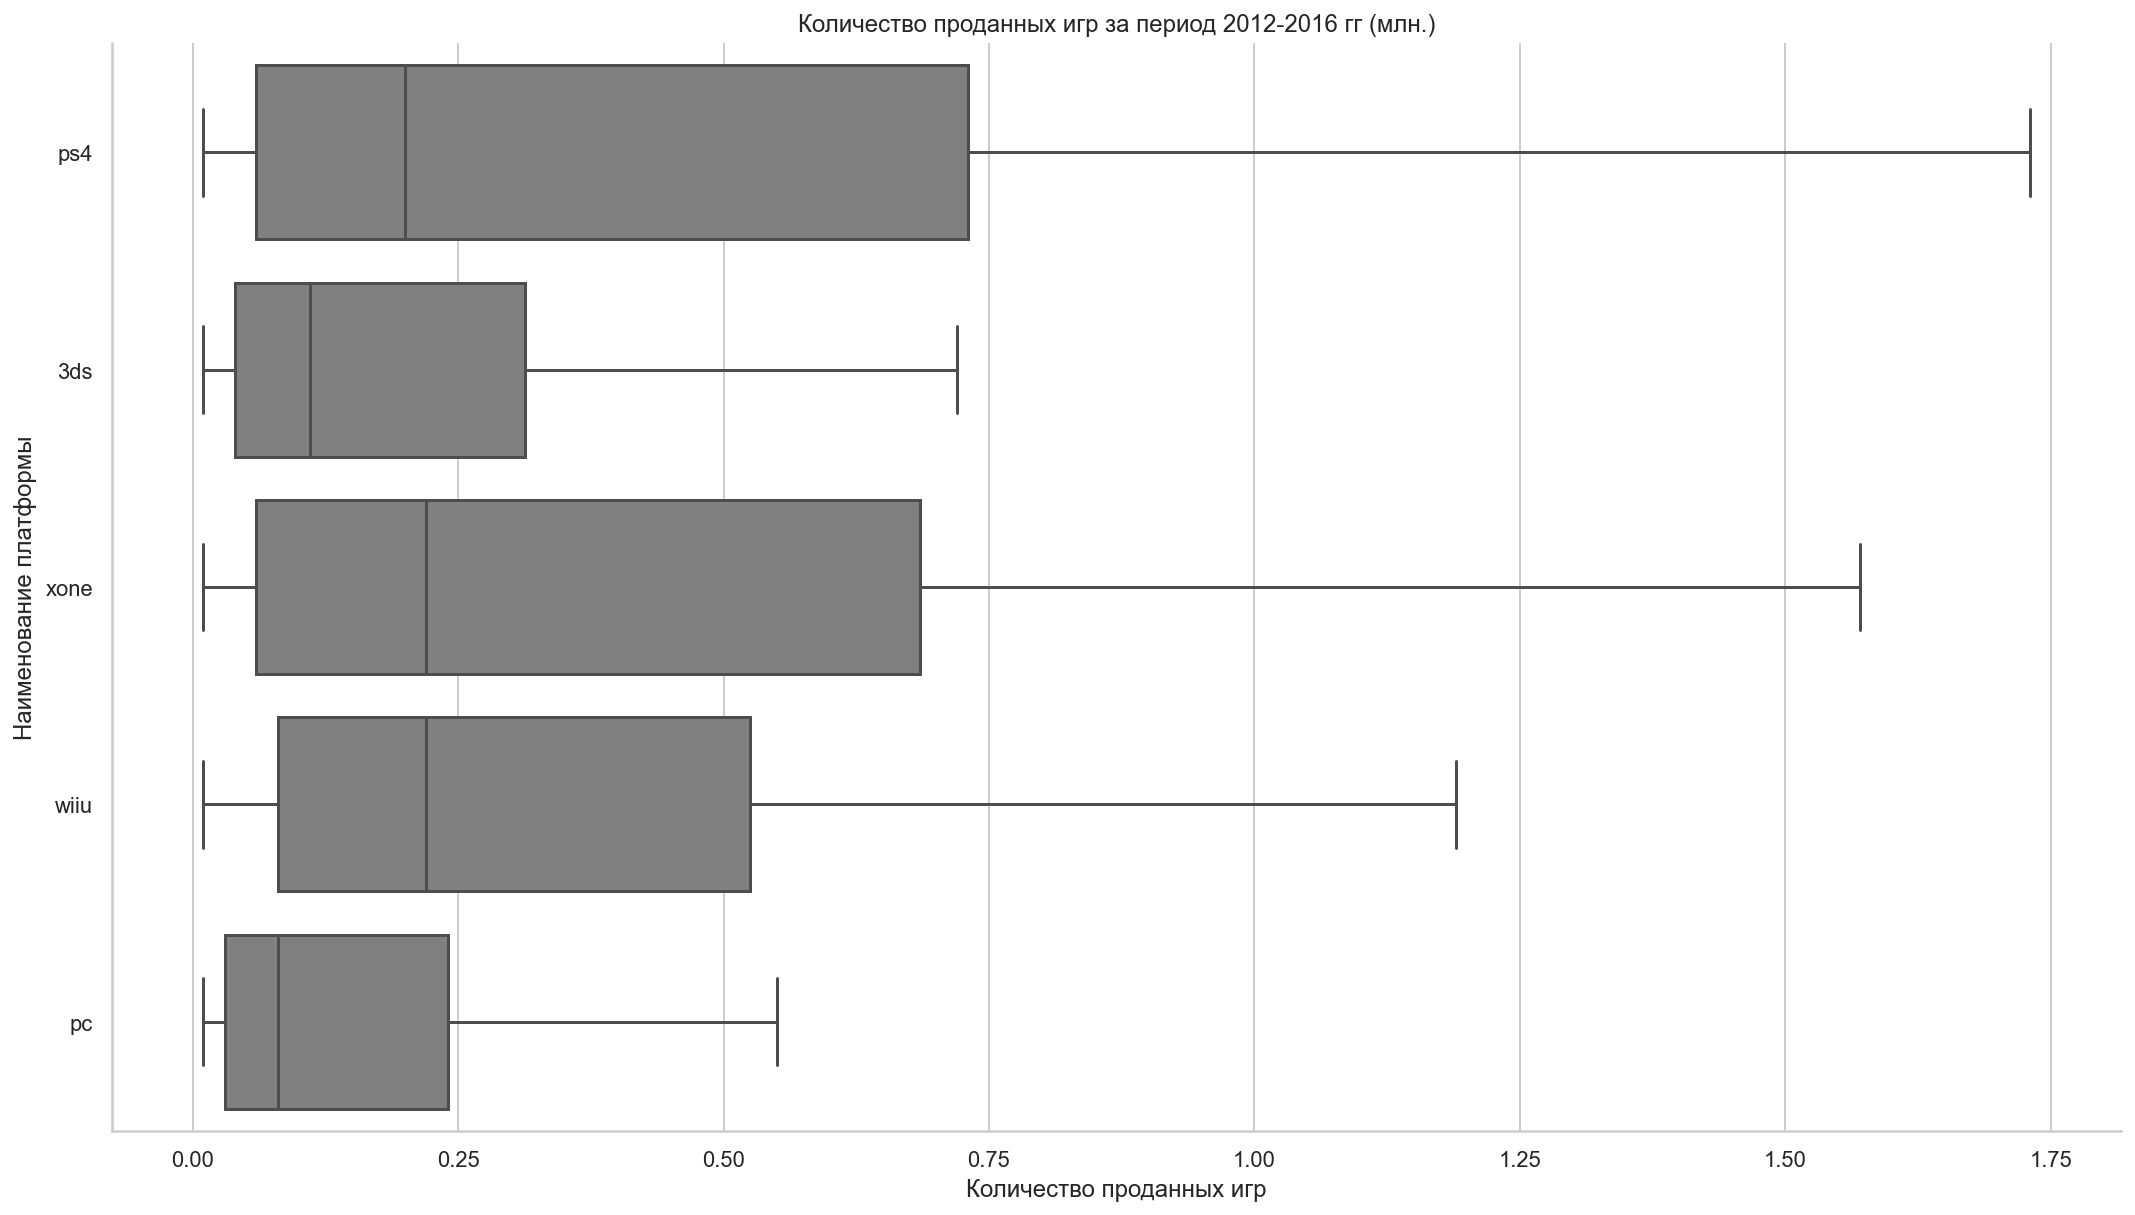

In [56]:
plt.figure(figsize=(18,10))
sns.boxplot(x='all_sales', y='platform', data=df2, showfliers=False, color='grey')
plt.title("Количество проданных игр за период 2012-2016 гг (млн.)")
plt.xlabel("Количество проданных игр")
plt.ylabel("Наименование платформы")
plt.show()

Как видно из графика и данных, есть много выбросов т.е. какие-то игры проадвались значительно лучше и следовательно медианы разные и расположены по разному.

### Проанализируем, как влияют на продажи отзывы пользователей и критиков внутри одной популярной платформы.

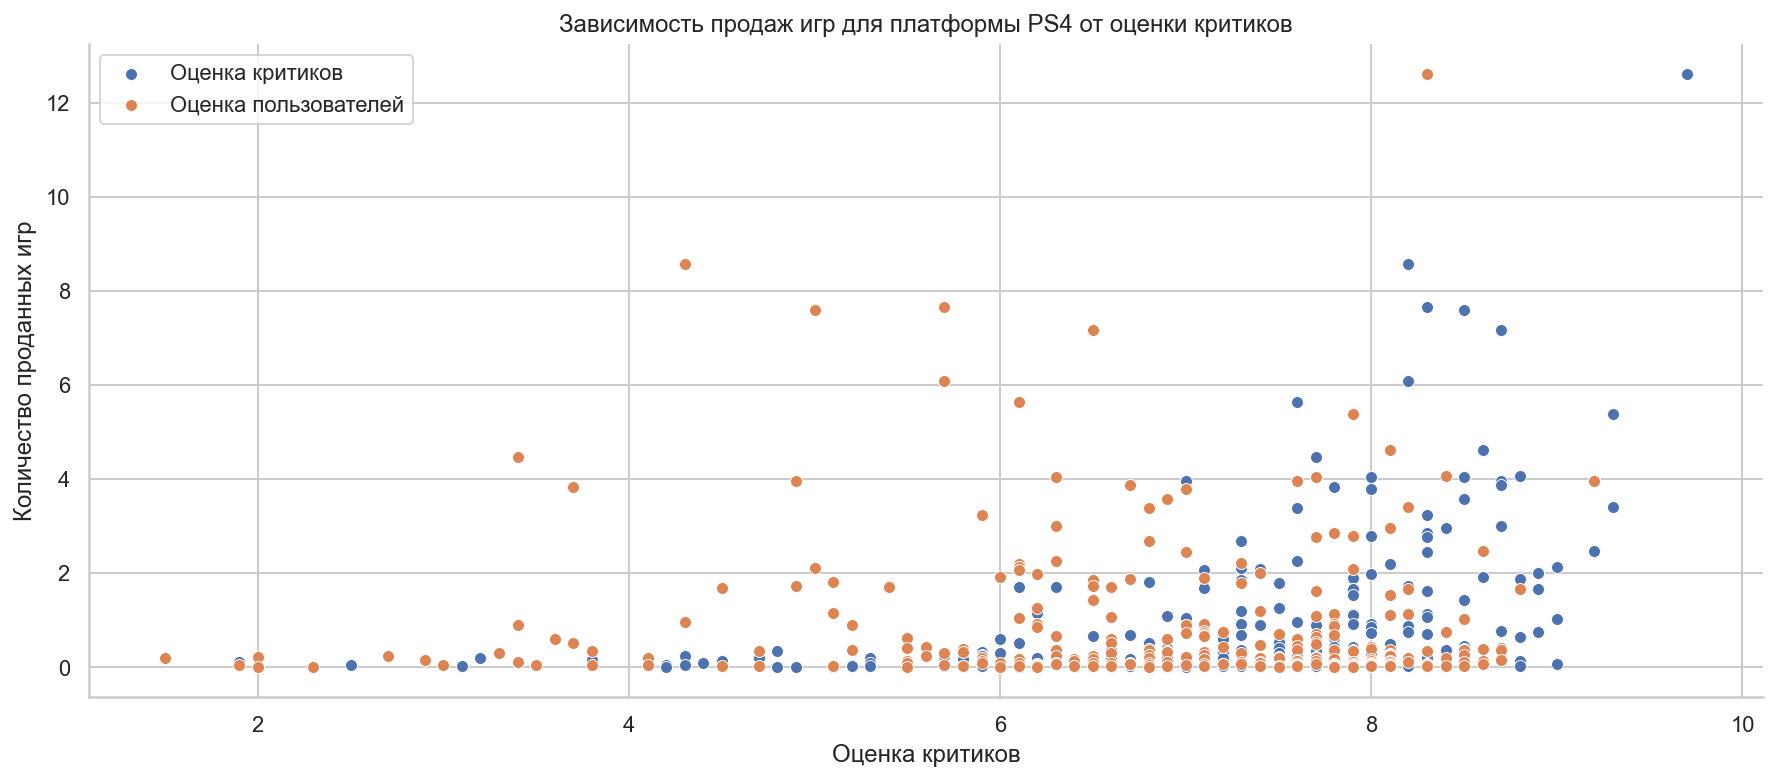

In [57]:
t = df2[df2['platform']=='ps4']
t["critic_score"] = t["critic_score"] / 10
plt.figure(figsize=(15,6))
plt.title("Зависимость продаж игр для платформы PS4 от оценки критиков")
plt.xlabel("Оценка критиков")
plt.ylabel("Количество проданных игр")
sns.scatterplot(x='critic_score', y='all_sales', data=t,  label="Оценка критиков")
sns.scatterplot(x='user_score', y='all_sales', data=t, label="Оценка пользователей" )
plt.show()

,all_sales,critic_score,user_score
all_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


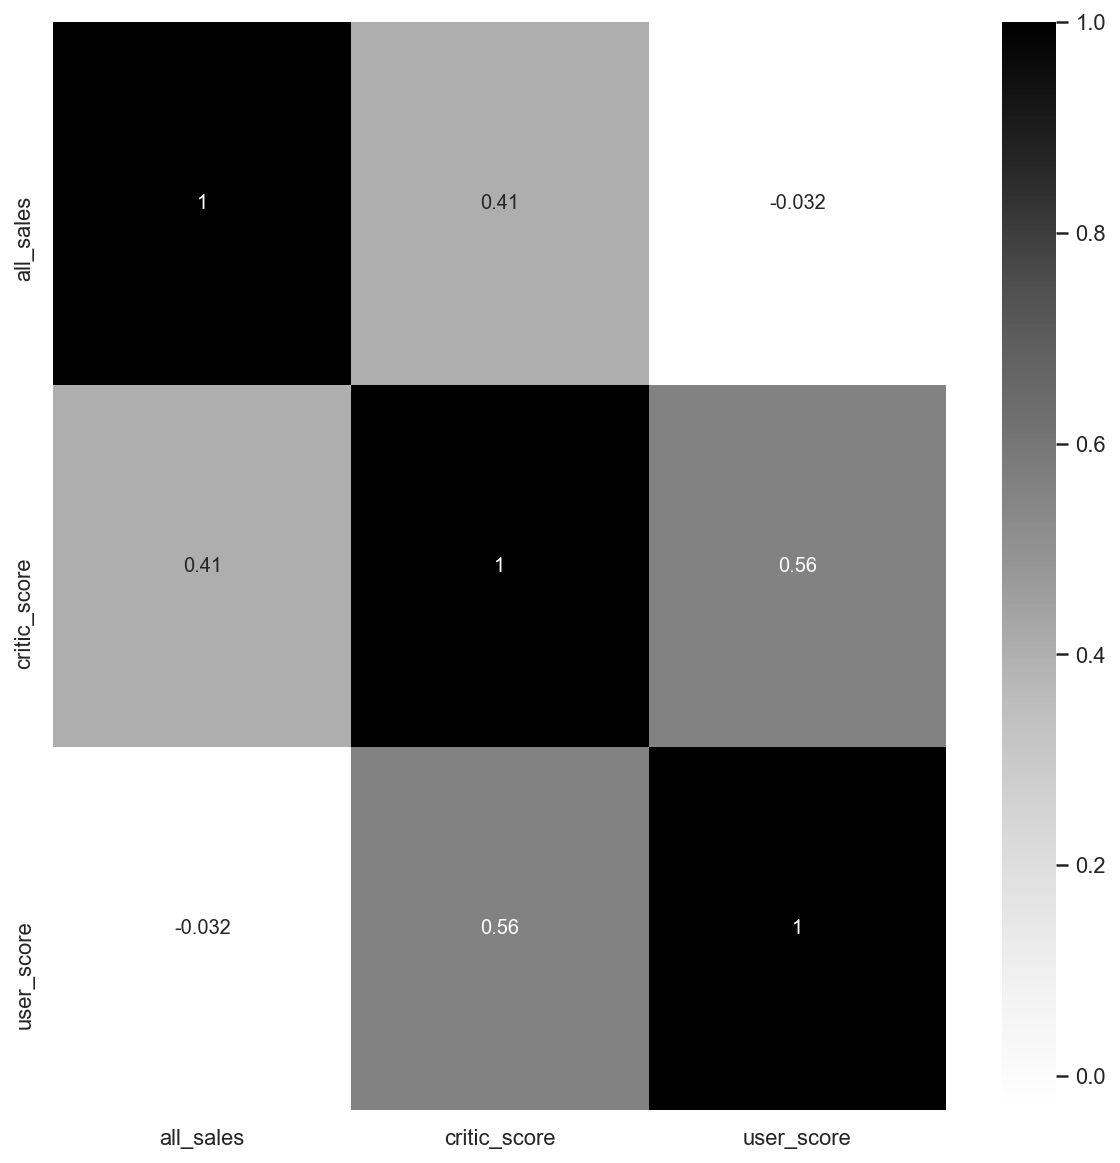

In [58]:
display(t[["all_sales", "critic_score", "user_score"]].corr())
plt.figure(figsize=(10,10))
sns.heatmap(t[["all_sales", "critic_score", "user_score"]].corr(), annot=True, cmap="Greys")
plt.show()

Для изучения влияния оценок критиков и пользователей на продажи выбрали наиболее продоваемую платформу PS4. Критерии критиков перевили к 10 бальной шкале.

**ВЫВОД**

Из исследования видно, что:
- продажи копий игр для платформы свыше 0,4 млн.копий, расположены за оценкой 5 и более баллов.
- видна средняя корреляция между оценкой критиков и количеством проданных копий равная 0,41
- кореляция между продажей и оценкой пользователей стремится к 0, но это связь может быть не прямая и более сложная, так как пользователи являются потребителями продукта и их оценки должны учитываться разработчиками.

Можно сказать, что при планировании рекламной компании обязательно нужно учитывать оценки критиков и пользователей.

### Посмотрим на продажами игр на других платформах

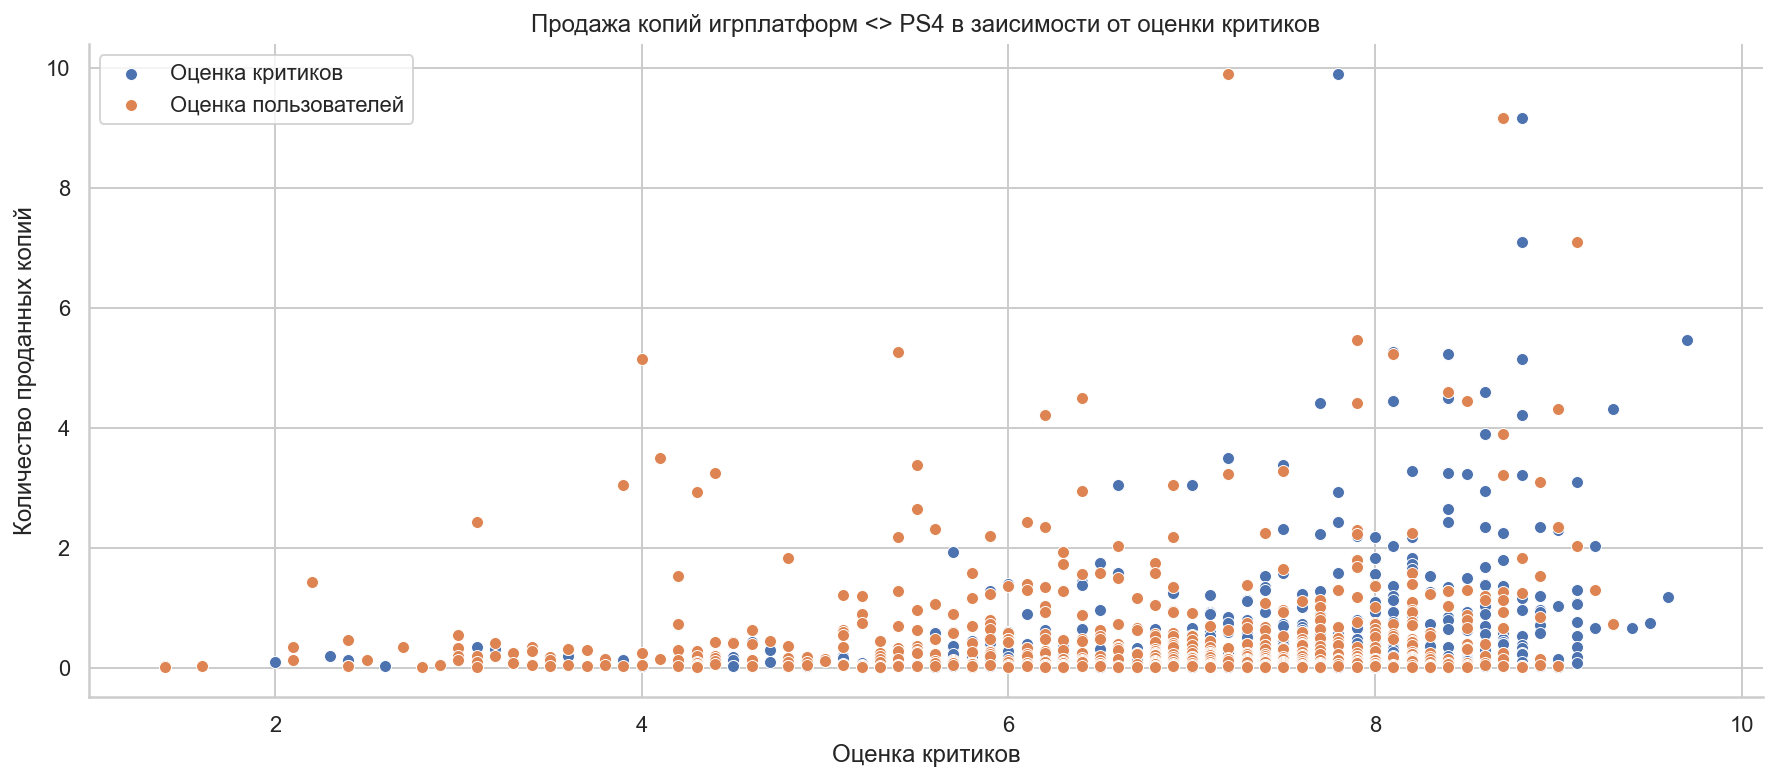

In [59]:
t = df2[df2['platform']!='ps4']
t["critic_score"] = t["critic_score"] / 10
plt.figure(figsize=(15,6))
plt.title("Продажа копий игрплатформ <> PS4 в заисимости от оценки критиков")
plt.xlabel("Оценка критиков")
plt.ylabel("Количество проданных копий")
sns.scatterplot(x='critic_score', y='all_sales', data=t,  label="Оценка критиков")
sns.scatterplot(x='user_score', y='all_sales', data=t, label="Оценка пользователей" )
plt.show()

,all_sales,critic_score,user_score
all_sales,1.000000,0.284918,0.097968
critic_score,0.284918,1.000000,0.487084
user_score,0.097968,0.487084,1.000000


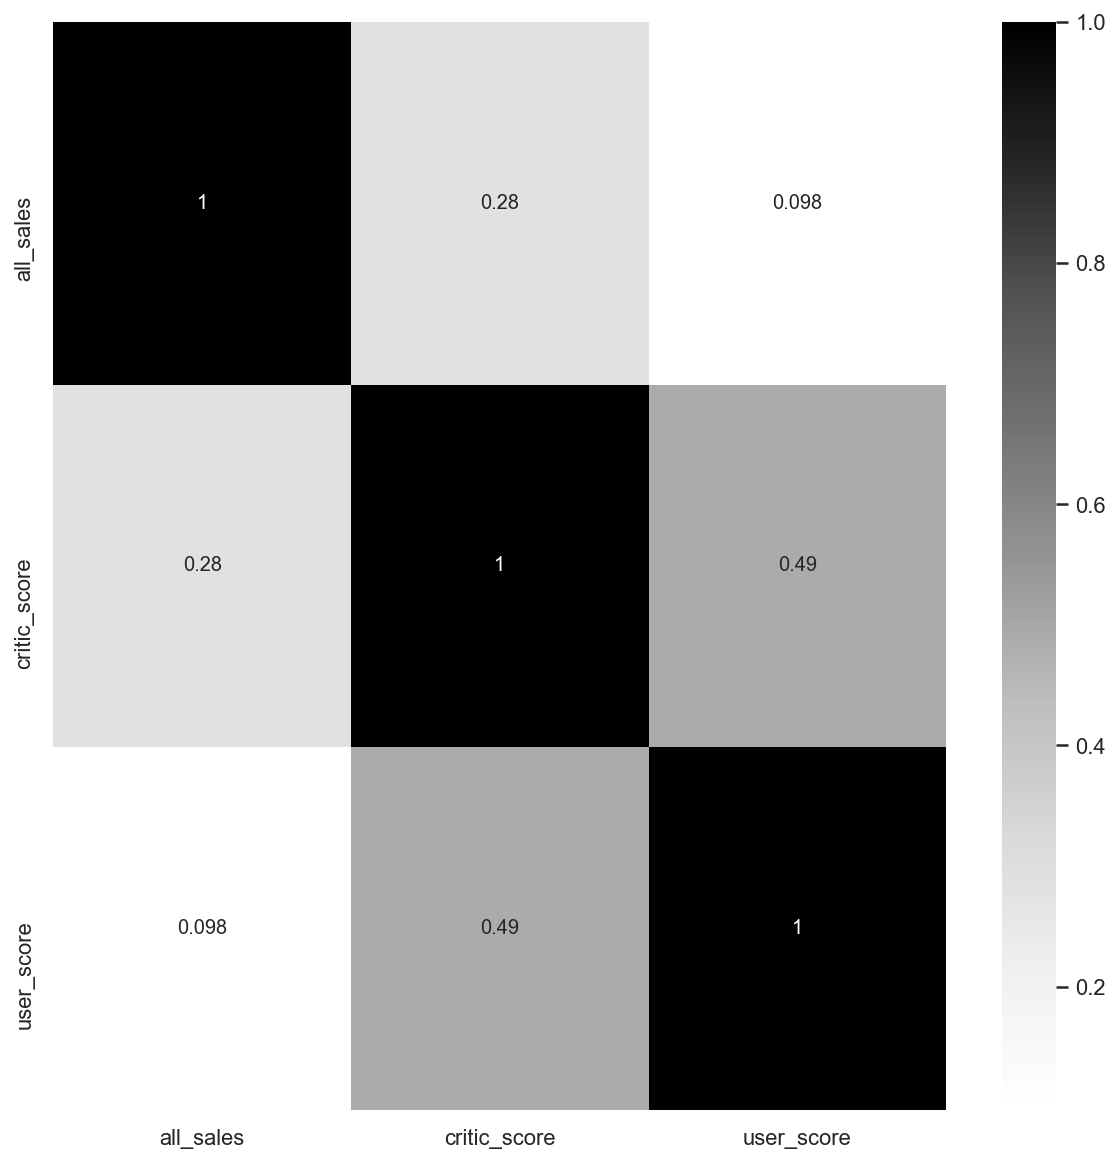

In [60]:
display(t[["all_sales", "critic_score", "user_score"]].corr())
plt.figure(figsize=(10,10))
sns.heatmap(t[["all_sales", "critic_score", "user_score"]].corr(), annot=True, cmap='Greys')
plt.show()

При сравнении продаж в зависимости от оценки критиков/пользователей для PS4 и других платформ можно сказать, что основные продажи игр находятся за оценкой в 5 баллов и чем выше бал, тем вероятнее больше продаж, при этом зависимость продаж игр для других платформ уже имеет незначительную корреляцию от оценок критиков (0,28), но так же незначительная кореляция от оценок пользователей(0,17).

Т.е.для всех платформ включая PS4 нужно учитывать оценки как критиков так и пользователей.

In [61]:
genre = df2.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values('all_sales',ascending=False)
genre['%'] = np.round(genre['all_sales']/df2['all_sales'].sum()*100,1)  
genre

,all_sales,%
genre,,
action,211.11,26.0
shooter,169.30,20.8
role-playing,135.38,16.7
sports,93.00,11.4
platform,49.40,6.1
misc,38.26,4.7
racing,31.31,3.9
simulation,31.27,3.8
fighting,25.95,3.2


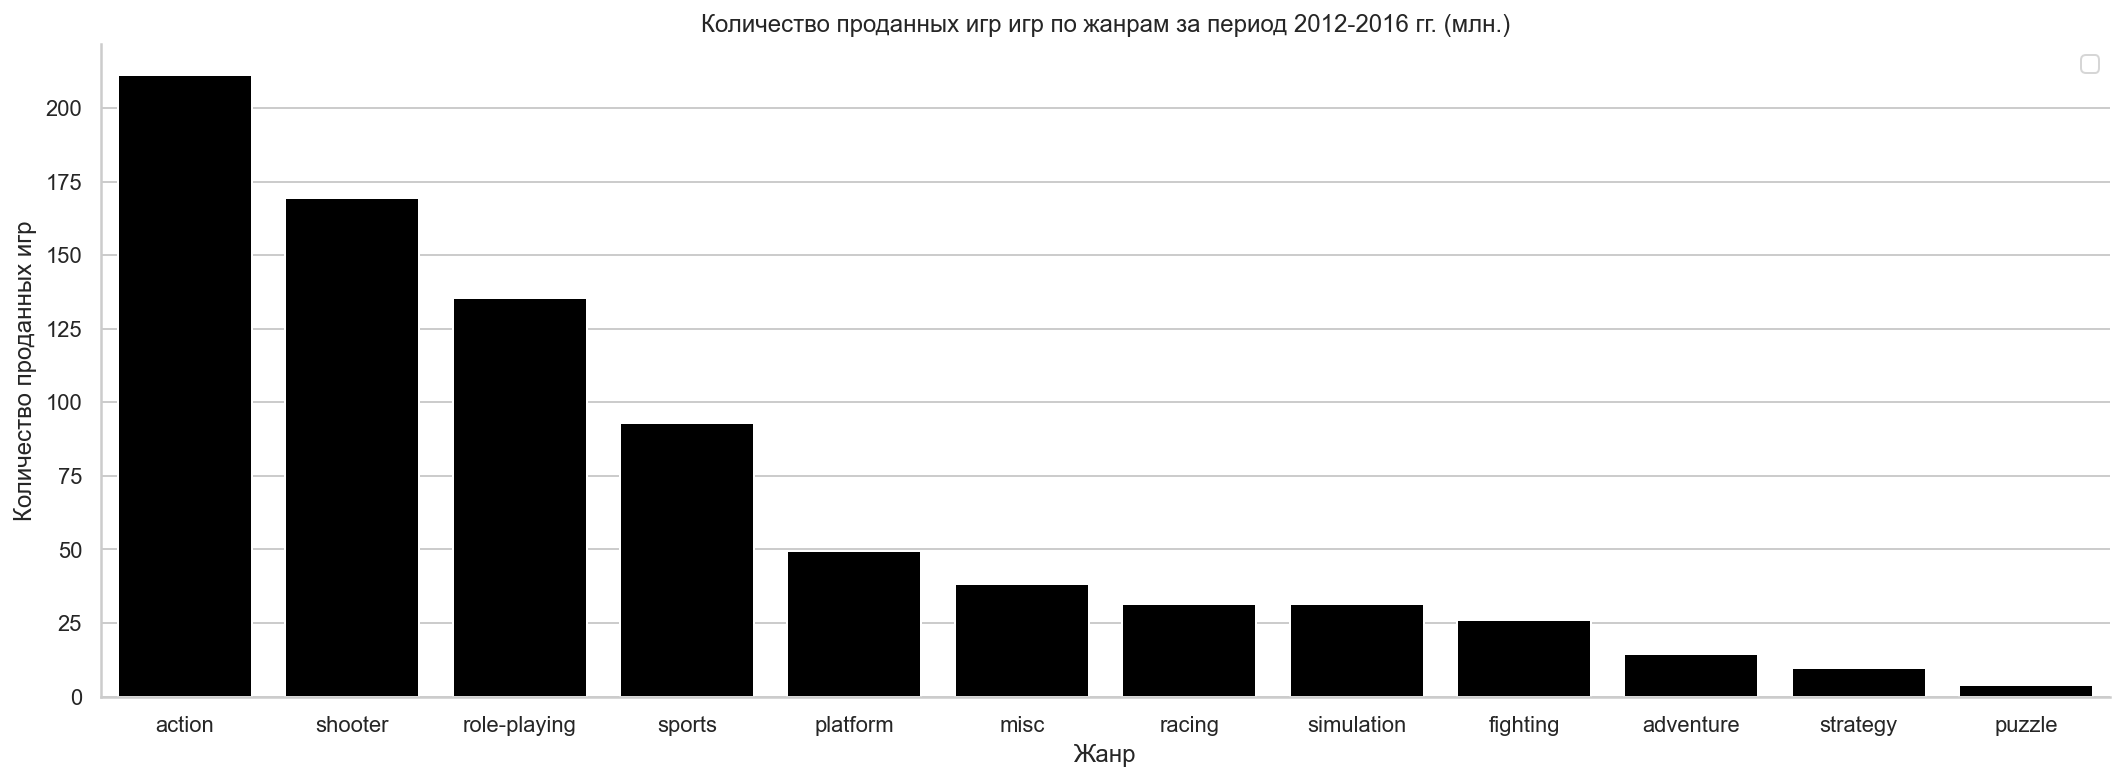

In [62]:
plt.figure(figsize=(18,6))
sns.barplot(x=genre.index, y='all_sales',data=genre, color='black')
plt.title("Количество проданных игр игр по жанрам за период 2012-2016 гг. (млн.)")
plt.xlabel("Жанр")
plt.ylabel("Количество проданных игр")
plt.legend('')

In [63]:
genre_p = df2.pivot_table(index=['genre', 'platform'], values='all_sales', aggfunc='sum').sort_values('all_sales',ascending=False).reset_index()
genre_p['%'] = np.round(genre_p['all_sales']/df2['all_sales'].sum()*100,2)  
for i in genre.head(4).index:
        print('Всего проадных игры в жанре {}'.format(i))
        display(genre_p[genre_p['genre']==i].reset_index(drop=True))

Всего проадных игры в жанре action


,genre,platform,all_sales,%
0,action,ps4,96.10,11.82
1,action,3ds,45.49,5.60
2,action,xone,37.31,4.59
3,action,wiiu,19.07,2.35
4,action,pc,13.14,1.62


Всего проадных игры в жанре shooter


,genre,platform,all_sales,%
0,shooter,ps4,88.56,10.89
1,shooter,xone,60.33,7.42
2,shooter,pc,14.27,1.76
3,shooter,wiiu,6.01,0.74
4,shooter,3ds,0.13,0.02


Всего проадных игры в жанре role-playing


,genre,platform,all_sales,%
0,role-playing,3ds,79.30,9.76
1,role-playing,ps4,28.99,3.57
2,role-playing,pc,13.65,1.68
3,role-playing,xone,10.55,1.30
4,role-playing,wiiu,2.89,0.36


Всего проадных игры в жанре sports


,genre,platform,all_sales,%
0,sports,ps4,55.61,6.84
1,sports,xone,26.74,3.29
2,sports,3ds,4.23,0.52
3,sports,pc,3.26,0.40
4,sports,wiiu,3.16,0.39


In [64]:
genre_p = df2.pivot_table(index=['genre', 'platform'], values='all_sales', aggfunc='median').sort_values('all_sales',ascending=False).reset_index()
for i in genre.head(4).index:
    print('Средние продажи игры в жанре {}'.format(i))
    display(genre_p[genre_p['genre']==i].reset_index(drop=True))

Средние продажи игры в жанре action


,genre,platform,all_sales
0,action,ps4,0.155
1,action,wiiu,0.150
2,action,xone,0.150
3,action,3ds,0.090
4,action,pc,0.090


Средние продажи игры в жанре shooter


,genre,platform,all_sales
0,shooter,xone,1.095
1,shooter,ps4,0.970
2,shooter,pc,0.220
3,shooter,wiiu,0.120
4,shooter,3ds,0.065


Средние продажи игры в жанре role-playing


,genre,platform,all_sales
0,role-playing,wiiu,0.41
1,role-playing,xone,0.32
2,role-playing,3ds,0.22
3,role-playing,ps4,0.20
4,role-playing,pc,0.16


Средние продажи игры в жанре sports


,genre,platform,all_sales
0,sports,ps4,0.525
1,sports,wiiu,0.365
2,sports,xone,0.335
3,sports,3ds,0.205
4,sports,pc,0.060


Самыми прибильными жанрами являются: action, shooter, role-playing, sports, которые выпускаются только для платформ ps4, 3ds, xone, wiiu, pc.

Продажи по этим жанрам составляют 75% от общего количества проданых копий независимо от жанра и платформы.

Самыми не прибльными жанрами являются: adventure, strategy, puzzle процент их продаж составил суммарно всего 3,5%.

При анализе средних значений можно выделить 2 платформы которые всегда лидируют при продажах игр ps4 и xone при этом независимо от жанра эти платформы значительно лучше продаются, чем их конкуренты.

## 4. Изучим и составим портрет пользователя каждого региона

 TOP-5 PLATFORM по региону:


,platform,NA,EU,JP,Other
0,ps4,34.59,47.31,13.63,58.11
1,xone,29.62,17.30,0.29,17.15
2,3ds,17.59,14.30,74.97,10.66
3,wiiu,12.12,8.43,11.11,7.15
4,pc,6.08,12.66,0.00,6.93


1 место по продажам занимает платформа:
    Северная Америка: "PS4" c долей продаж 34.59%
    Европа: "PS4" c долей продаж 47.31%
    Япония: "3DS" c долей продаж 74.97%
    Другие страны: "PS4" c долей продаж 58.11%

2 место по продажам занимает платформа:
    Северная Америка: "XONE" c долей продаж 29.62%
    Европа: "XONE" c долей продаж 17.3%
    Япония: "PS4" c долей продаж 13.63%
    Другие страны: "XONE" c долей продаж 17.15%

3 место по продажам занимает платформа:
    Северная Америка: "3DS" c долей продаж 17.59%
    Европа: "3DS" c долей продаж 14.3%
    Япония: "WIIU" c долей продаж 11.11%
    Другие страны: "3DS" c долей продаж 10.66%

4 место по продажам занимает платформа:
    Северная Америка: "WIIU" c долей продаж 12.12%
    Европа: "PC" c долей продаж 12.66%
    Япония: "XONE" c долей продаж 0.29%
    Другие страны: "WIIU" c долей продаж 7.15%

5 место по продажам занимает платформа:
    Северная Америка: "PC" c долей продаж 6.08%
    Европа: "WIIU" c долей продаж 8.43

,genre,NA,EU,JP,Other
0,action,26.06,26.44,23.53,27.38
1,shooter,24.43,22.40,3.91,25.38
2,role-playing,14.25,12.47,37.05,12.03
3,sports,12.01,13.43,2.70,14.46
4,platform,6.42,5.60,7.25,4.83


1 место по продажам занимает жанр:
    Северная Америка: "ACTION" c долей продаж 26.06%
    Европа: "ACTION" c долей продаж 26.44%
    Япония: "ROLE-PLAYING" c долей продаж 37.05%
    Другие страны: "ACTION" c долей продаж 27.38%

2 место по продажам занимает жанр:
    Северная Америка: "SHOOTER" c долей продаж 24.43%
    Европа: "SHOOTER" c долей продаж 22.4%
    Япония: "ACTION" c долей продаж 23.53%
    Другие страны: "SHOOTER" c долей продаж 25.38%

3 место по продажам занимает жанр:
    Северная Америка: "ROLE-PLAYING" c долей продаж 14.25%
    Европа: "SPORTS" c долей продаж 13.43%
    Япония: "SIMULATION" c долей продаж 8.17%
    Другие страны: "SPORTS" c долей продаж 14.46%

4 место по продажам занимает жанр:
    Северная Америка: "SPORTS" c долей продаж 12.01%
    Европа: "ROLE-PLAYING" c долей продаж 12.47%
    Япония: "PLATFORM" c долей продаж 7.25%
    Другие страны: "ROLE-PLAYING" c долей продаж 12.03%

5 место по продажам занимает жанр:
    Северная Америка: "PLATFORM" c 

,rating,NA,EU,JP,Other
0,m,32.70,33.99,6.15,35.80
1,не определен,22.61,22.24,59.04,21.92
2,e,20.38,22.63,20.35,19.84
3,e10+,12.42,9.57,6.27,9.83
4,t,11.89,11.57,8.19,12.61


1 место по продажам занимает рейтинг:
    Северная Америка: "M" c долей продаж 32.7%
    Европа: "M" c долей продаж 33.99%
    Япония: "НЕ ОПРЕДЕЛЕН" c долей продаж 59.04%
    Другие страны: "M" c долей продаж 35.8%

2 место по продажам занимает рейтинг:
    Северная Америка: "НЕ ОПРЕДЕЛЕН" c долей продаж 22.61%
    Европа: "E" c долей продаж 22.63%
    Япония: "E" c долей продаж 20.35%
    Другие страны: "НЕ ОПРЕДЕЛЕН" c долей продаж 21.92%

3 место по продажам занимает рейтинг:
    Северная Америка: "E" c долей продаж 20.38%
    Европа: "НЕ ОПРЕДЕЛЕН" c долей продаж 22.24%
    Япония: "T" c долей продаж 8.19%
    Другие страны: "E" c долей продаж 19.84%

4 место по продажам занимает рейтинг:
    Северная Америка: "E10+" c долей продаж 12.42%
    Европа: "T" c долей продаж 11.57%
    Япония: "E10+" c долей продаж 6.27%
    Другие страны: "T" c долей продаж 12.61%

5 место по продажам занимает рейтинг:
    Северная Америка: "T" c долей продаж 11.89%
    Европа: "E10+" c долей продаж 9.

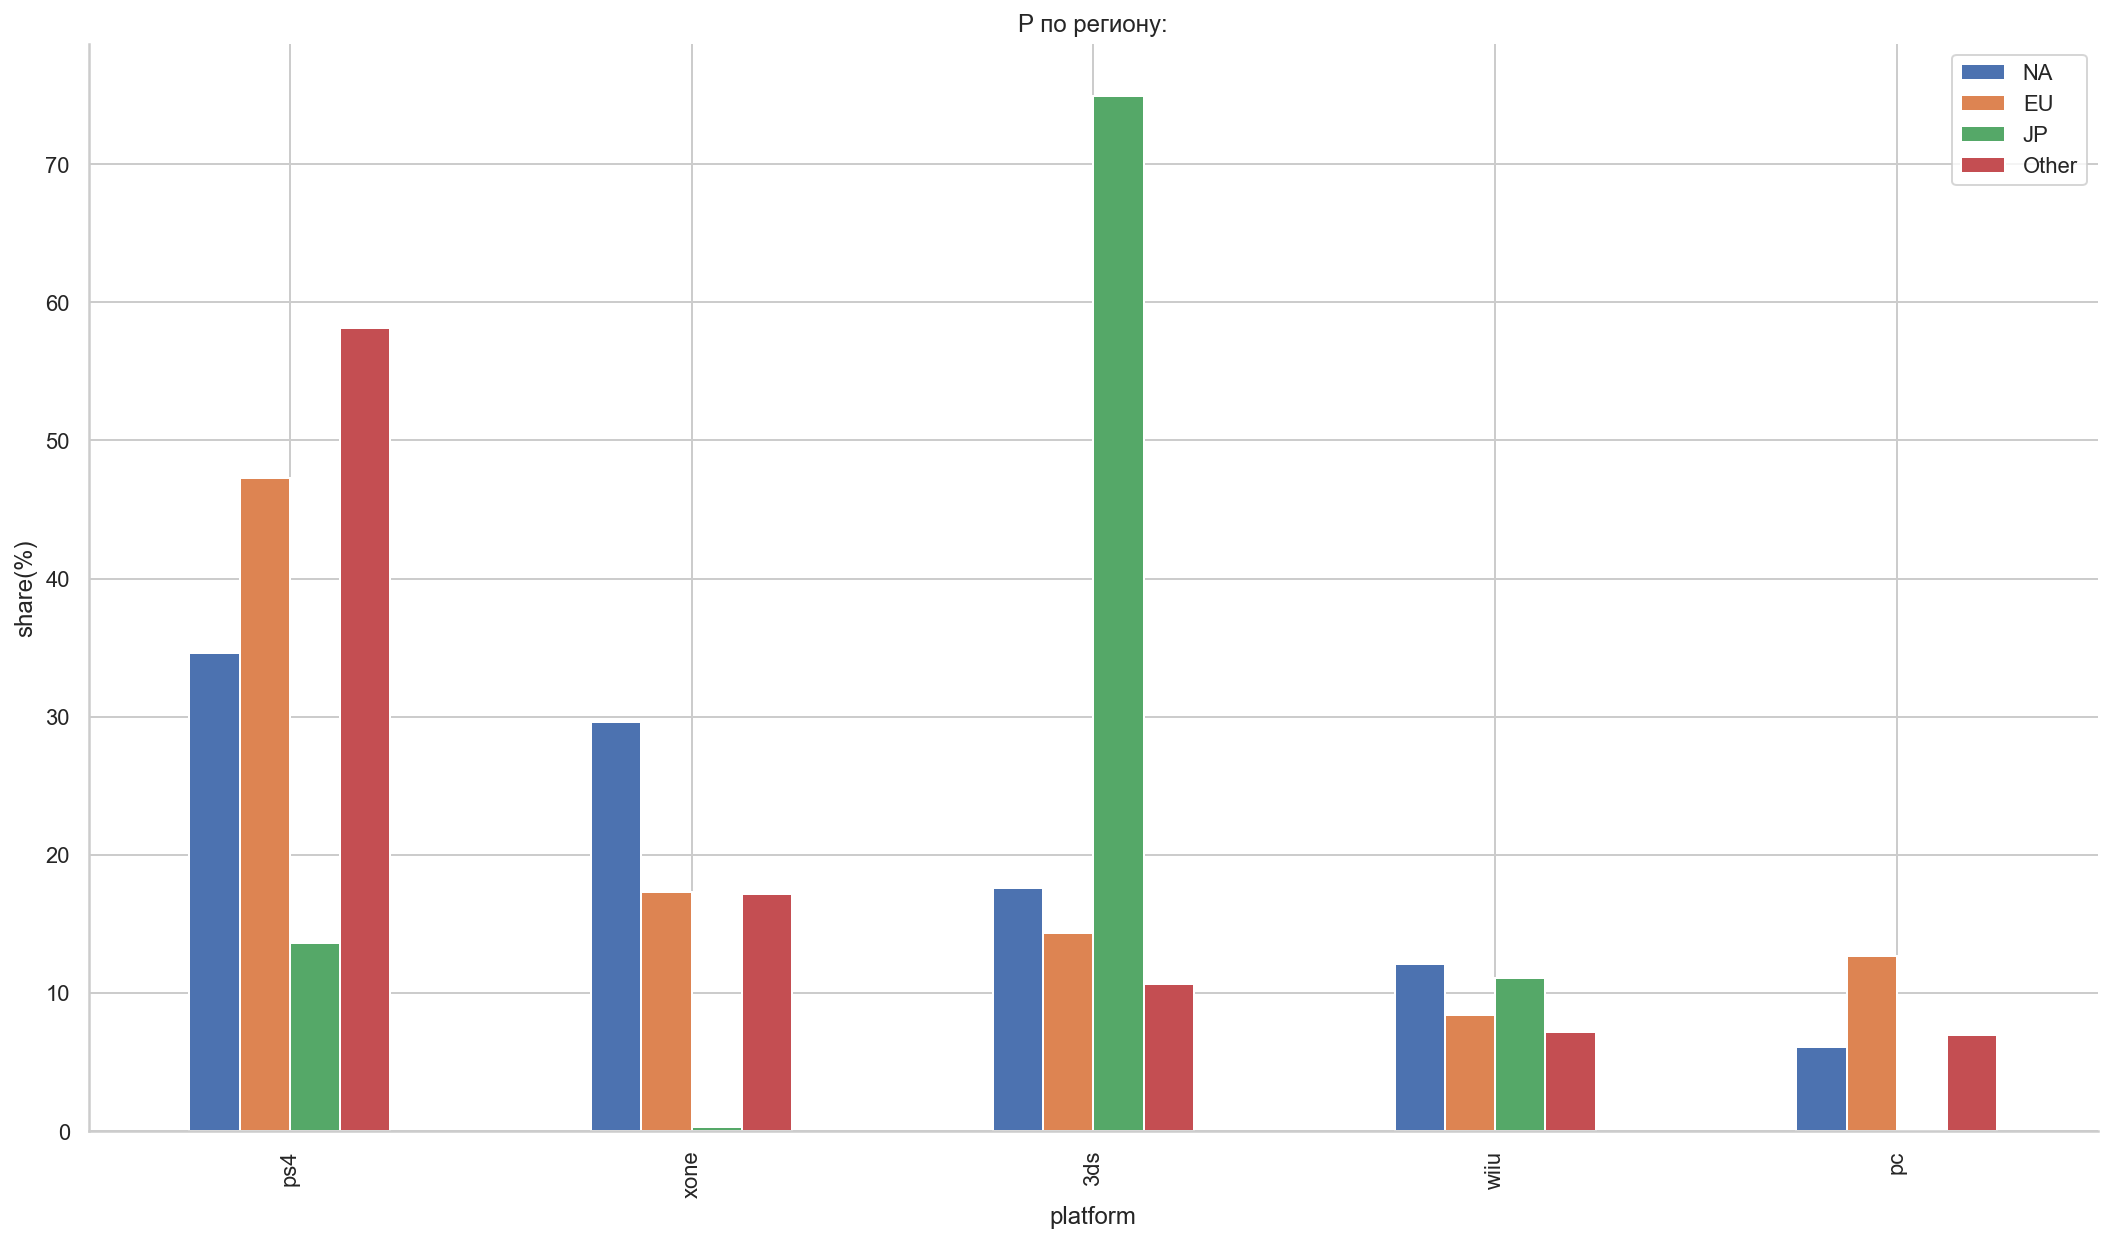

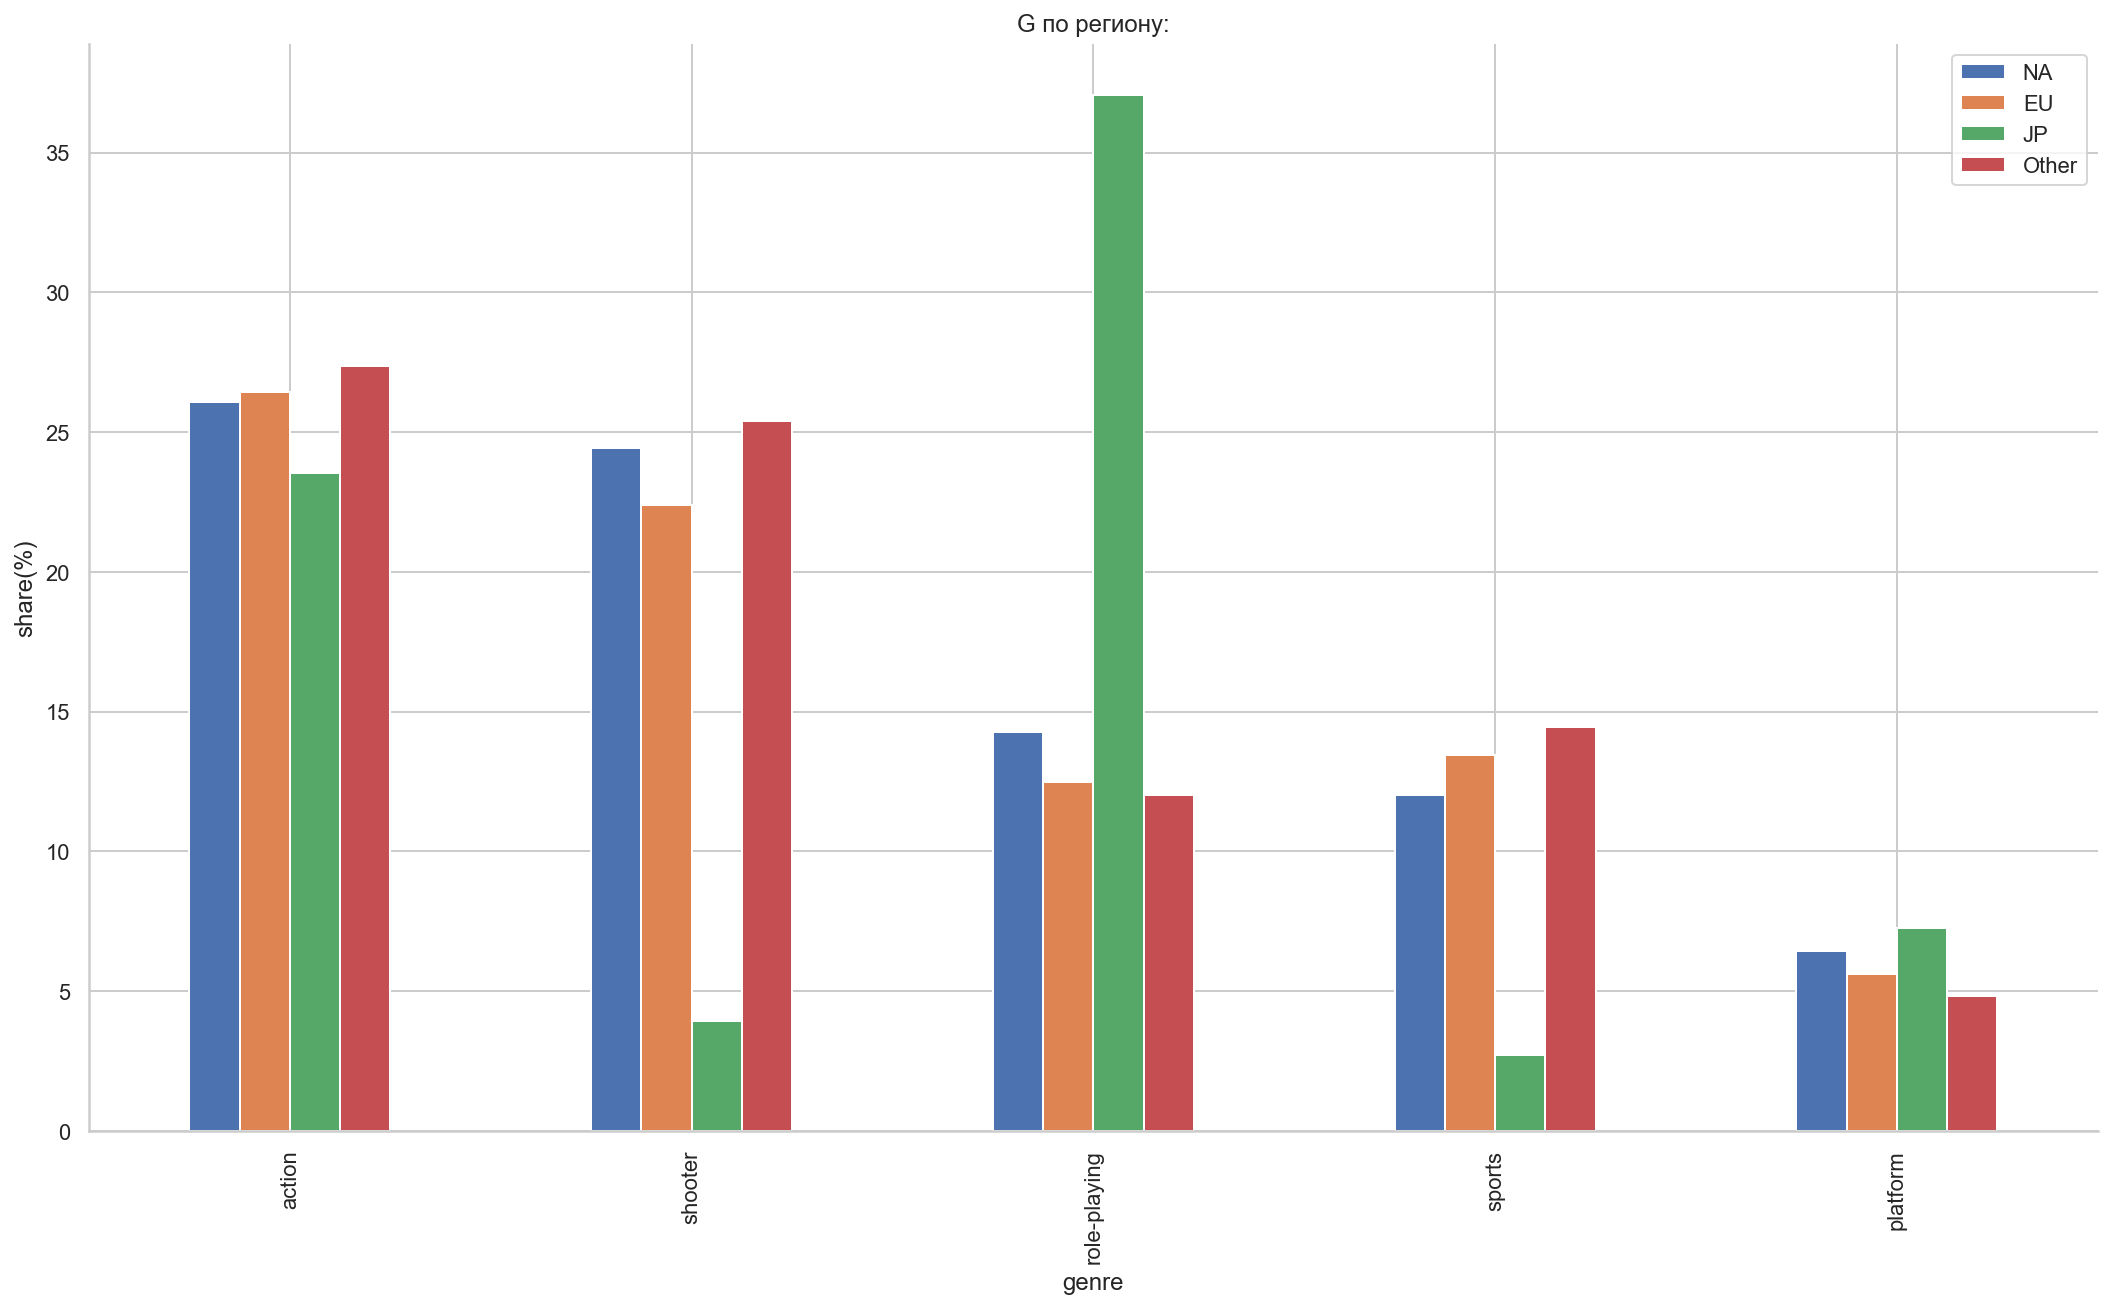

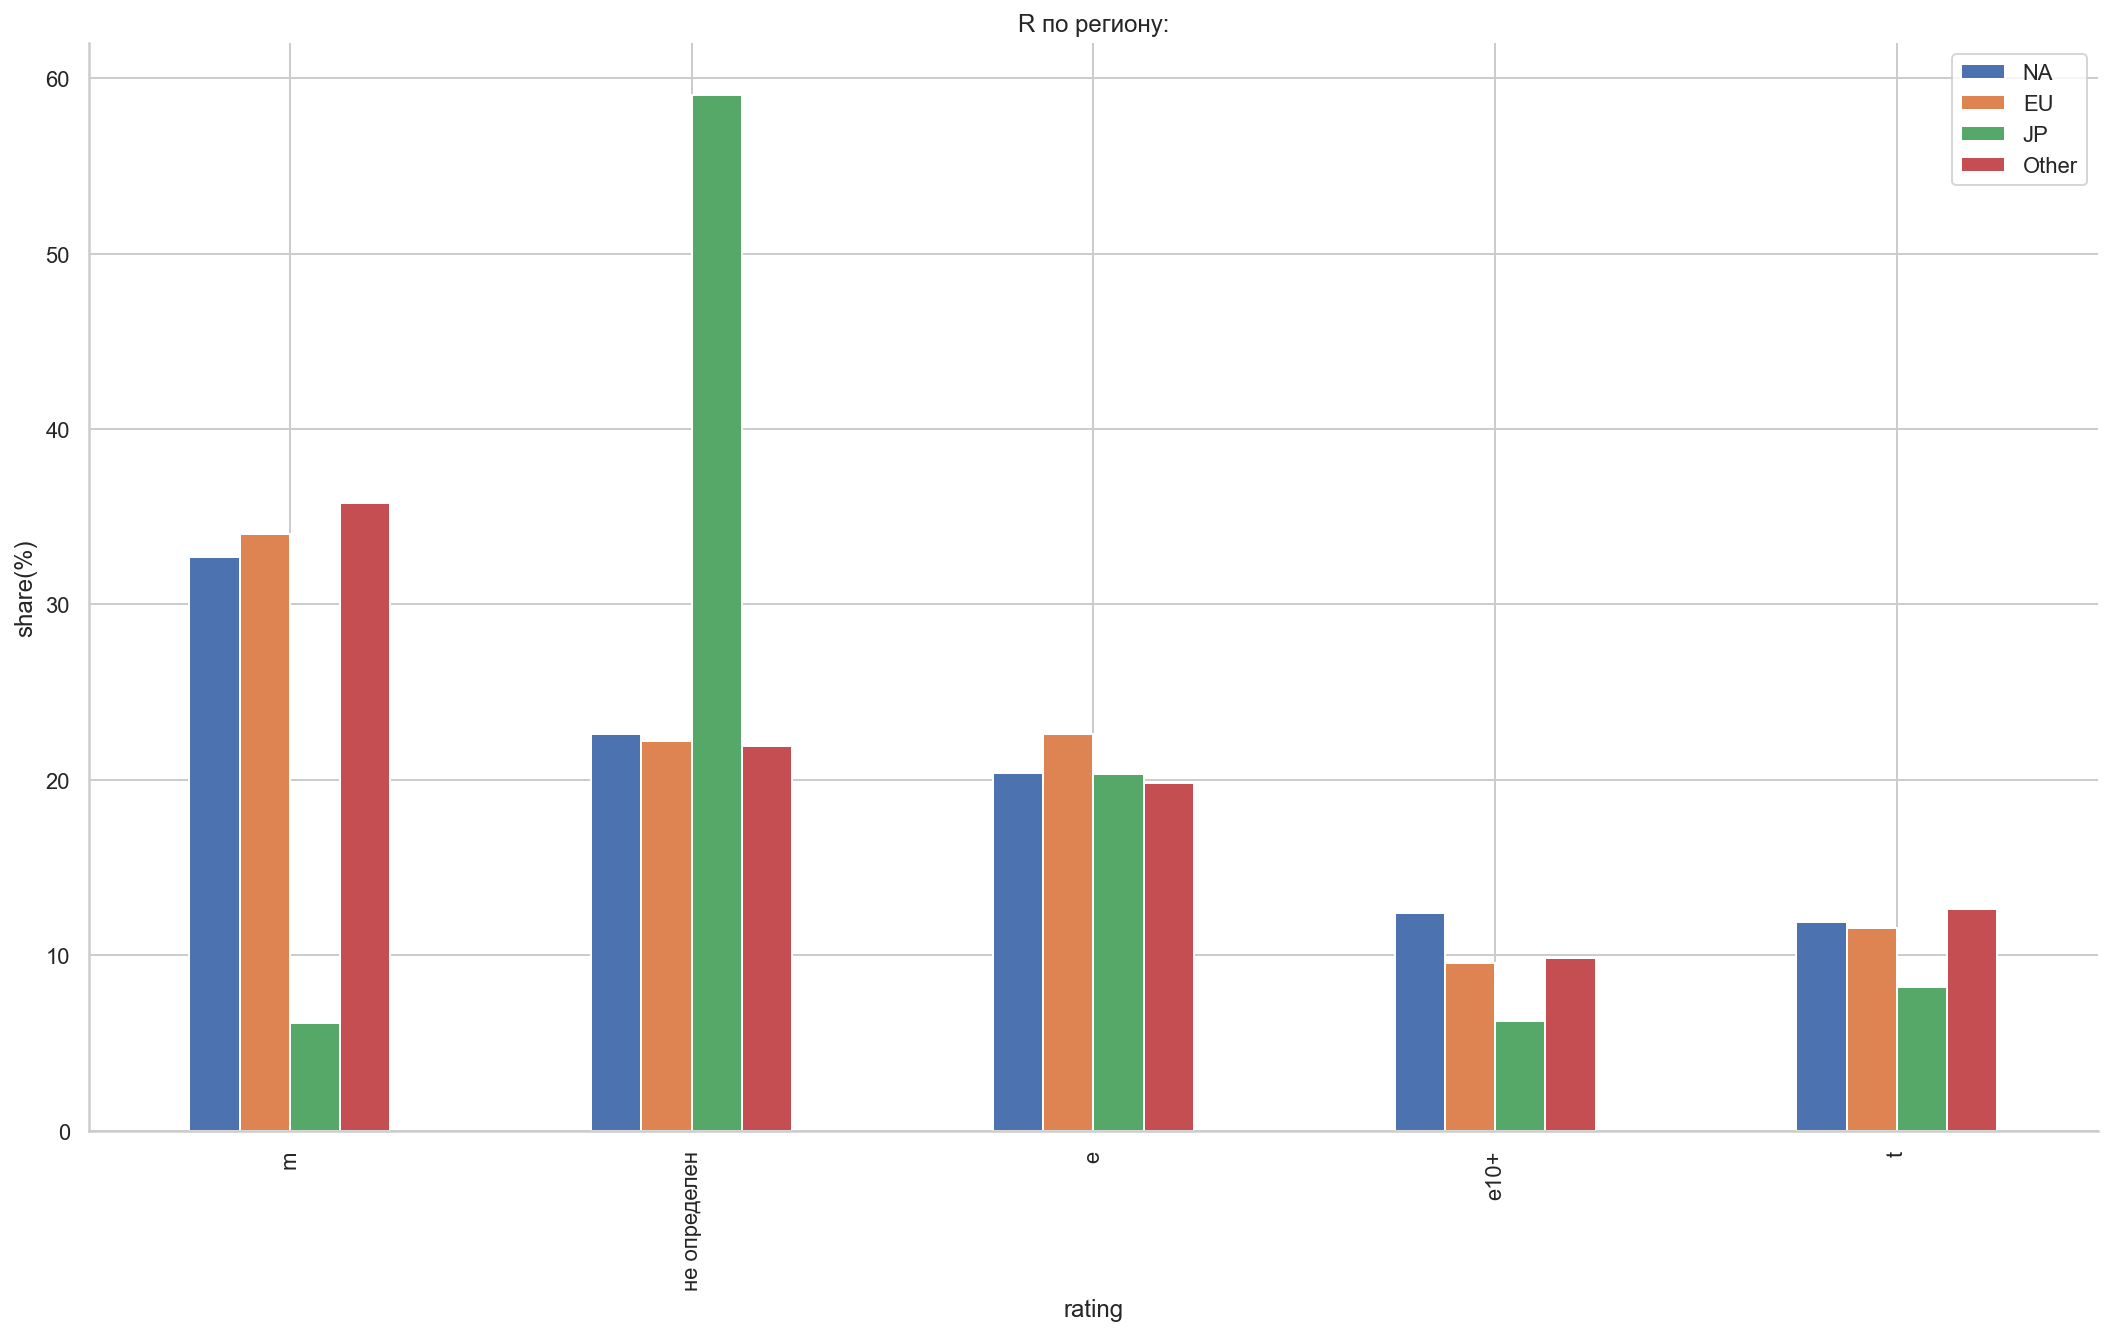

In [65]:
arr={"NA":'na_sales', "EU":'eu_sales', "JP":'jp_sales', "Other":'other_sales'}
arr2 ={'platform':'платформа','genre':'жанр','rating':'рейтинг'}
arr3 ={"NA":'Северная Америка', "EU":'Европа', "JP":'Япония', "Other":'Другие страны'}
for n in arr2:
    c=0
    table=[]
    for r in arr:
        table_2 = df2.pivot_table(index=[n], values=[arr[r]], aggfunc='sum').reset_index().sort_values(arr[r], ascending=False)
        table_2[r] = np.round(table_2[arr[r]]/table_2[arr[r]].sum()*100,2)
        if c > 0:
            table=table.merge(table_2[[n, r]], on=n, how='outer')
        else:
            table=table_2[[n, r]]
        c+=1
    if n!='rating':  
        print(f'\033[1m TOP-5 {n.upper()} по региону:\033[0m')
    else:
        print(f'ESRB {n.upper()} по региону:')
    display(table.head())
    for k in table.head().index:
        print(f'{k+1} место по продажам занимает {arr2[n]}:')
        for r2 in arr:
            d = table.sort_values(r2, ascending=False).reset_index(drop=True)
            print(f'    \033[1m{arr3[r2]}:\033[0m "{d.loc[k,n].upper()}" c долей продаж {d.loc[k,r2]}%')
        print('')
    table.head().plot(kind='bar', x=n, figsize=(18,10), title=f'{n[0].upper()} по региону:', xlabel=n, ylabel=('share(%)'))

**Итог**


В большинстве случаев регионы: Северная Америка, Европа и другие страны имеют похожие портреты, в отличаии от Японии, поэтому при прогнозе продаж нужно учитывать платформу, жанр, рейтинг игры согласно ESRB и регион продаж, так как если не учесть один из параметров может получить неверный прогноз.
При этом так же необходимо выяснить почему отсутсвуют оценки критиков/пользователей/рейтинг, возможно выгрузка не корректная, поэтому с этим вопросом лучше обратиться к коллегам.

## 5. Проверка гипотез

Для проверки гипотез пороговое значение примем 1%

In [66]:
alpha = .01

### **Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC равны.}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC различаются.}
 \end{cases}
\end{equation*}$

In [67]:
# удалим пропуски 
xone=df2[df2['platform']=='xone'].dropna()

In [68]:
pc=df2[df2['platform']=='pc'].dropna()

Проверим нормальность распределения данных

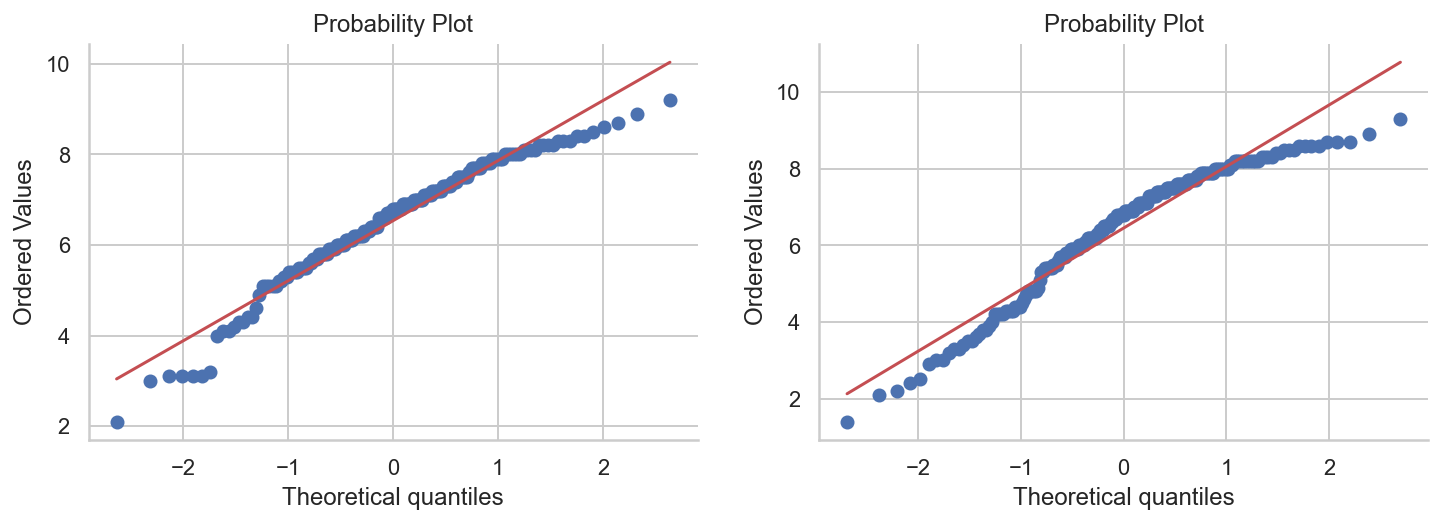

In [69]:
# построим QQ-графики
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(xone['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(pc['user_score'], dist="norm", plot=plt)
plt.show()

Так же проведем проверку с помощью "Критерия Шапиро-Уилка":

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC распределены нормально}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC распределены не нормально}
 \end{cases}
\end{equation*}$

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Классная дополнительная проверка 👍    
</div>

In [70]:
print("Тест Шапиро-Уилка, W-statistic: %f, p-value: %f" % st.shapiro(xone['user_score']))

Тест Шапиро-Уилка, W-statistic: 0.958713, p-value: 0.000084


In [71]:
print("Тест Шапиро-Уилка, W-statistic: %f, p-value: %f" % st.shapiro(pc['user_score']))

Тест Шапиро-Уилка, W-statistic: 0.939860, p-value: 0.000000


Проверка нормальности распределения показало, что наши выборки не распределены нормально:
 1. На QQ-графиках для нормальности распределения, точки должны следовать по прямой линии, тогда как на наших графиках  точки распределения сильно отклоняются от нее.
 2. Критерий Шапиро-Уилка, p-value полученое в нем на порядок меньше чем заданное alpha, что говорит нам о не нормальном распределении.
 
 Это позволяет нам использовать не параметрические тесты.
 
 Проверим нашу гипотезу с помощью непараметрического теста Манна-Уитни

In [72]:
t = st.mannwhitneyu(pc['user_score'],xone['user_score'], alternative='two-sided')
print('p-значение: ', t.pvalue)

if (t.pvalue < alpha):
    print(f'\033[1mОтвергаем нулевую гипотезу\033[0m')
    print('')
else:
    print(f'\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m')
    print('')

print('Средний пользовательский рейтинг для жанра Action:', np.round(np.mean(xone['user_score']),2), 'медиана:', np.round(np.median(xone['user_score']),2))
print('Средний пользовательский рейтинг для жанра Sports:', np.round(np.mean(pc['user_score']),2), 'медиана:', np.round(np.median(pc['user_score']),2))

p-значение:  0.8004981224790099
Не получилось отвергнуть нулевую гипотезу

Средний пользовательский рейтинг для жанра Action: 6.54 медиана: 6.8
Средний пользовательский рейтинг для жанра Sports: 6.45 медиана: 6.8


Результаты проверки гипотезы говорят нам о том, что средние значения рейтинга у платформ Xbox One и PC не равны и вероятности, что равны просто нет так как P-значение очень маленькое(меньше aqlpha).

### **Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны**

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports равны.}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action и Sports различаются.}
 \end{cases}
\end{equation*}$

In [73]:
a=df2[df2['genre']=='action'].dropna()

In [74]:
s=df2[df2['genre']=='sports'].dropna()

Проверим нормальность распределения данных

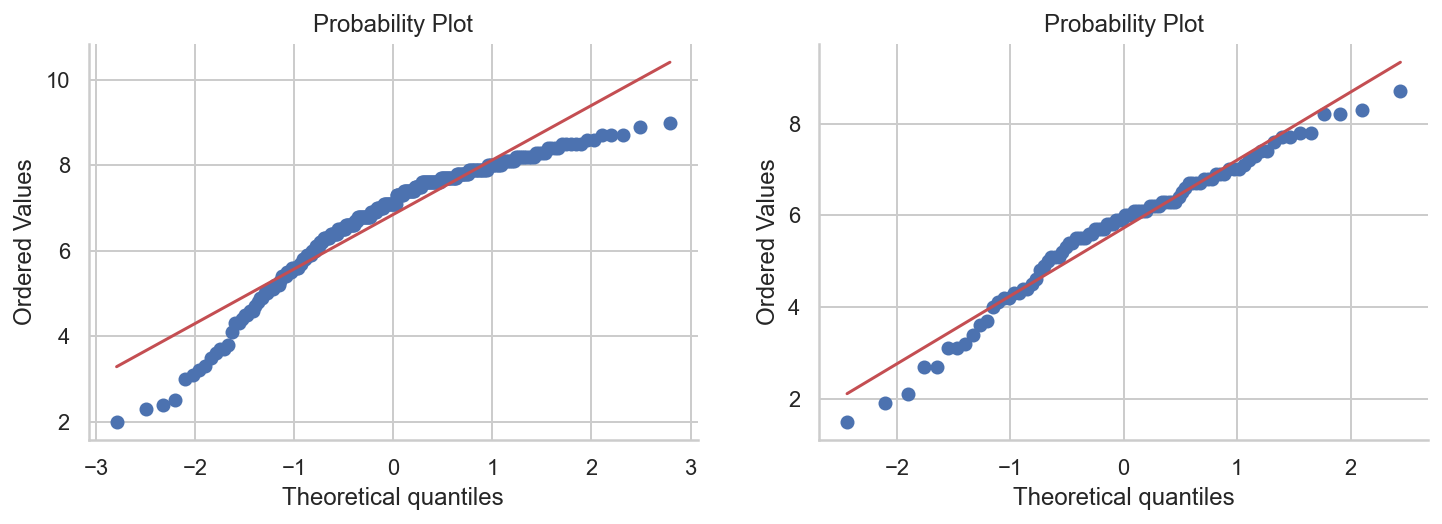

In [75]:
# построим QQ-графики
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(a['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(s['user_score'], dist="norm", plot=plt)
plt.show()

Так же проведем проверку с помощью "Критерия Шапиро-Уилка":

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports распределены нормально}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action и Sports распределены не нормально}
 \end{cases}
\end{equation*}$

In [76]:
print("Тест Шапиро-Уилка, W-statistic: %f, p-value: %f" % st.shapiro(a['user_score']))

Тест Шапиро-Уилка, W-statistic: 0.900300, p-value: 0.000000


In [77]:
print("Тест Шапиро-Уилка, W-statistic: %f, p-value: %f" % st.shapiro(s['user_score']))

Тест Шапиро-Уилка, W-statistic: 0.966021, p-value: 0.015129


Проверка нормальности распределения показало, что наши выборки не распределены нормально:
 1. На QQ-графиках для нормальности распределения, точки должны следовать по прямой линии, тогда как на наших графиках  точки распределения сильно отклоняются от нее.
 2. Критерий Шапиро-Уилка, p-value полученое в нем на порядок меньше чем заданное alpha, что говорит нам о не нормальном распределении.
 
 Это позволяет нам использовать не параметрические тесты.
 
 Проверим нашу гипотезу с помощью непараметрического теста Манна-Уитни

In [78]:
t = st.mannwhitneyu(a['user_score'],s['user_score'], alternative='two-sided')
print('p-значение: ', t.pvalue)

if (t.pvalue < alpha):
    print(f'\033[1mОтвергаем нулевую гипотезу\033[0m')
    print('')
else:
    print(f'\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m')
    print('')
    
print('Средний пользовательский рейтинг для жанра Action:', np.round(np.mean(a['user_score']),2), 'медиана:', np.round(np.median(a['user_score']),2))
print('Средний пользовательский рейтинг для жанра Sports:', np.round(np.mean(s['user_score']),2), 'медиана:', np.round(np.median(s['user_score']),2))

p-значение:  6.934247797334652e-12
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг для жанра Action: 6.85 медиана: 7.1
Средний пользовательский рейтинг для жанра Sports: 5.72 медиана: 5.95


Результаты проверки гипотезы говорят нам о том, что средние значения пользовательских рейтингов для жанров Action и Sports не равны и вероятности, что равны просто нет так как P-значение очень маленькое (меньше aqlpha).

## 6. Общий вывод

**Успешность игры зависит:**
 - **от оценки критиков** - есть средняя зависимость продаж игр от оценки критиков, т.е. потенциальные  покупатели прислушиваются к их оцениванию, кореляция может быть еще сильнее если она не прямая, а  более сложная, при этом для корректной оценки влияния данного параметра - необходимо выяснить причину большого количества пропусков в столбце "critic_score".
 

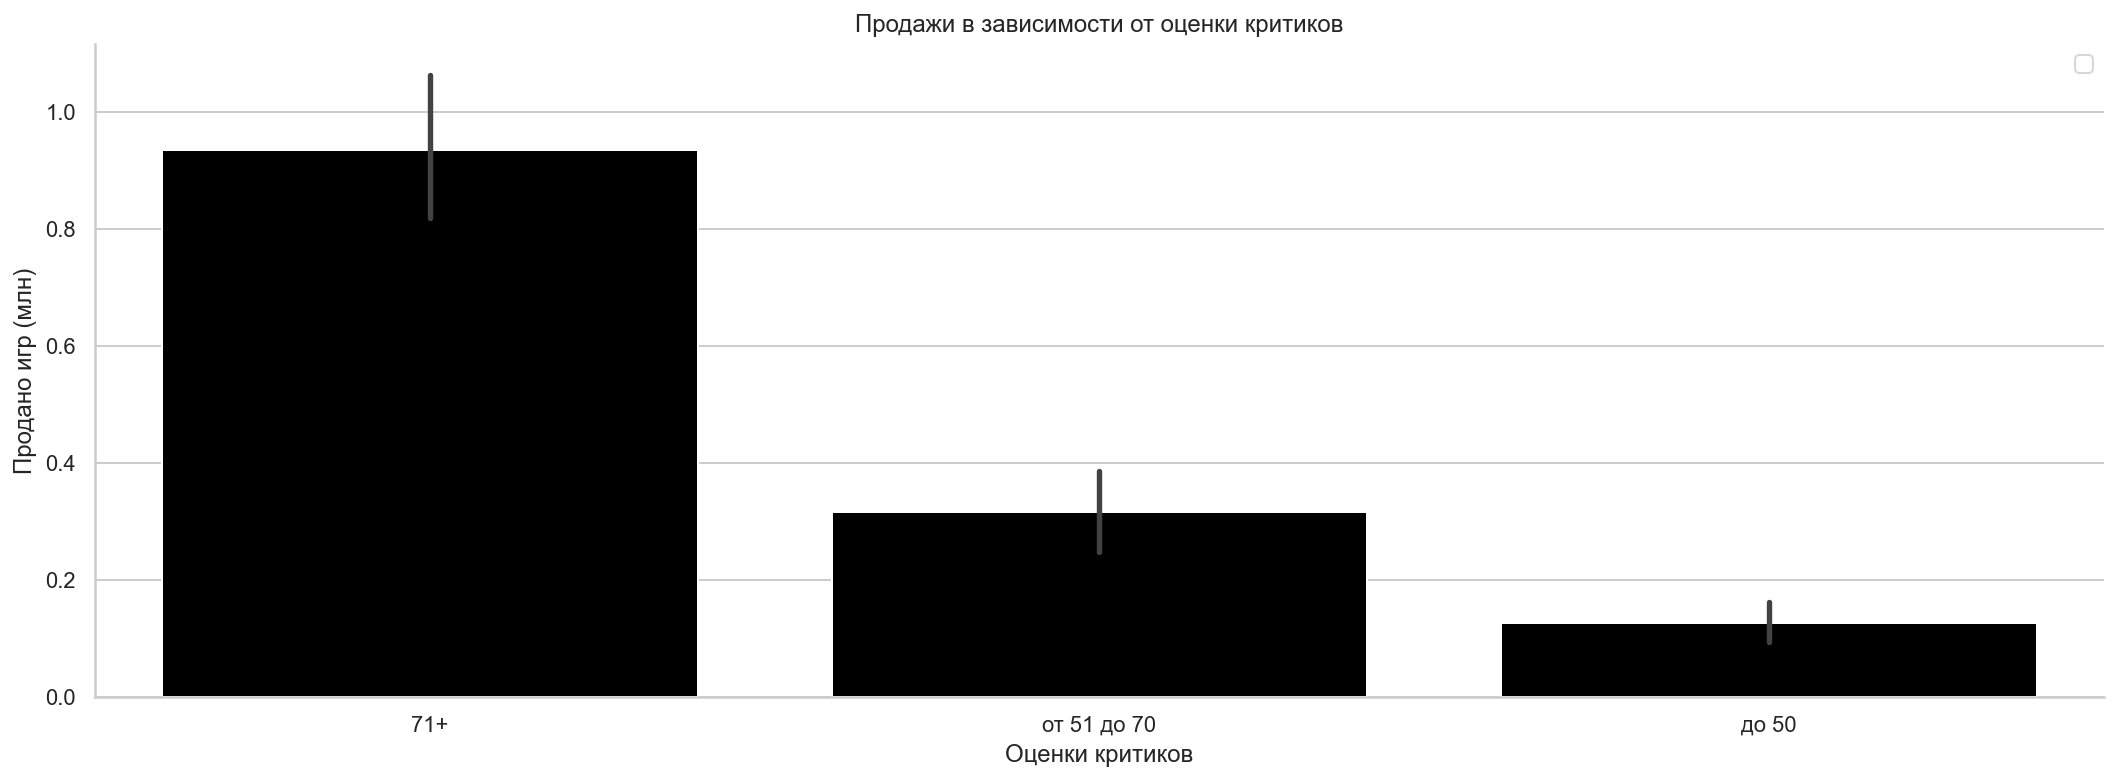

In [79]:
def category(row):
    if row <= 50:
        return "до 50"
    elif  50<= row <=70:
        return "от 51 до 70"
    elif 71 <= row <=100:
        return "71+"
    else:
        return row
df2["critic"] = df2["critic_score"].apply(category)
tabs = df2[['all_sales',"critic"]]
tabs=tabs.reset_index(drop=True)
plt.figure(figsize=(18,6))
sns.barplot(x="critic", y='all_sales',data=tabs, color='black')
plt.title("Продажи в зависимости от оценки критиков")
plt.xlabel("Оценки критиков")
plt.ylabel("Продано игр (млн)")
plt.legend('')

-  **от оценки пользователей** - есть незначительная зависимость продаж игр от оценки пользователей, т.е. потенциальные покупатели прислушиваются к оценкам уже купивших игру, но зависимость может быть более сложной поэтому данный параметр нужно учитывать, при этом для более корректной оценки влияния данного параметра - необходимо выяснить причину большого количества пропусков в столбце "user_score".

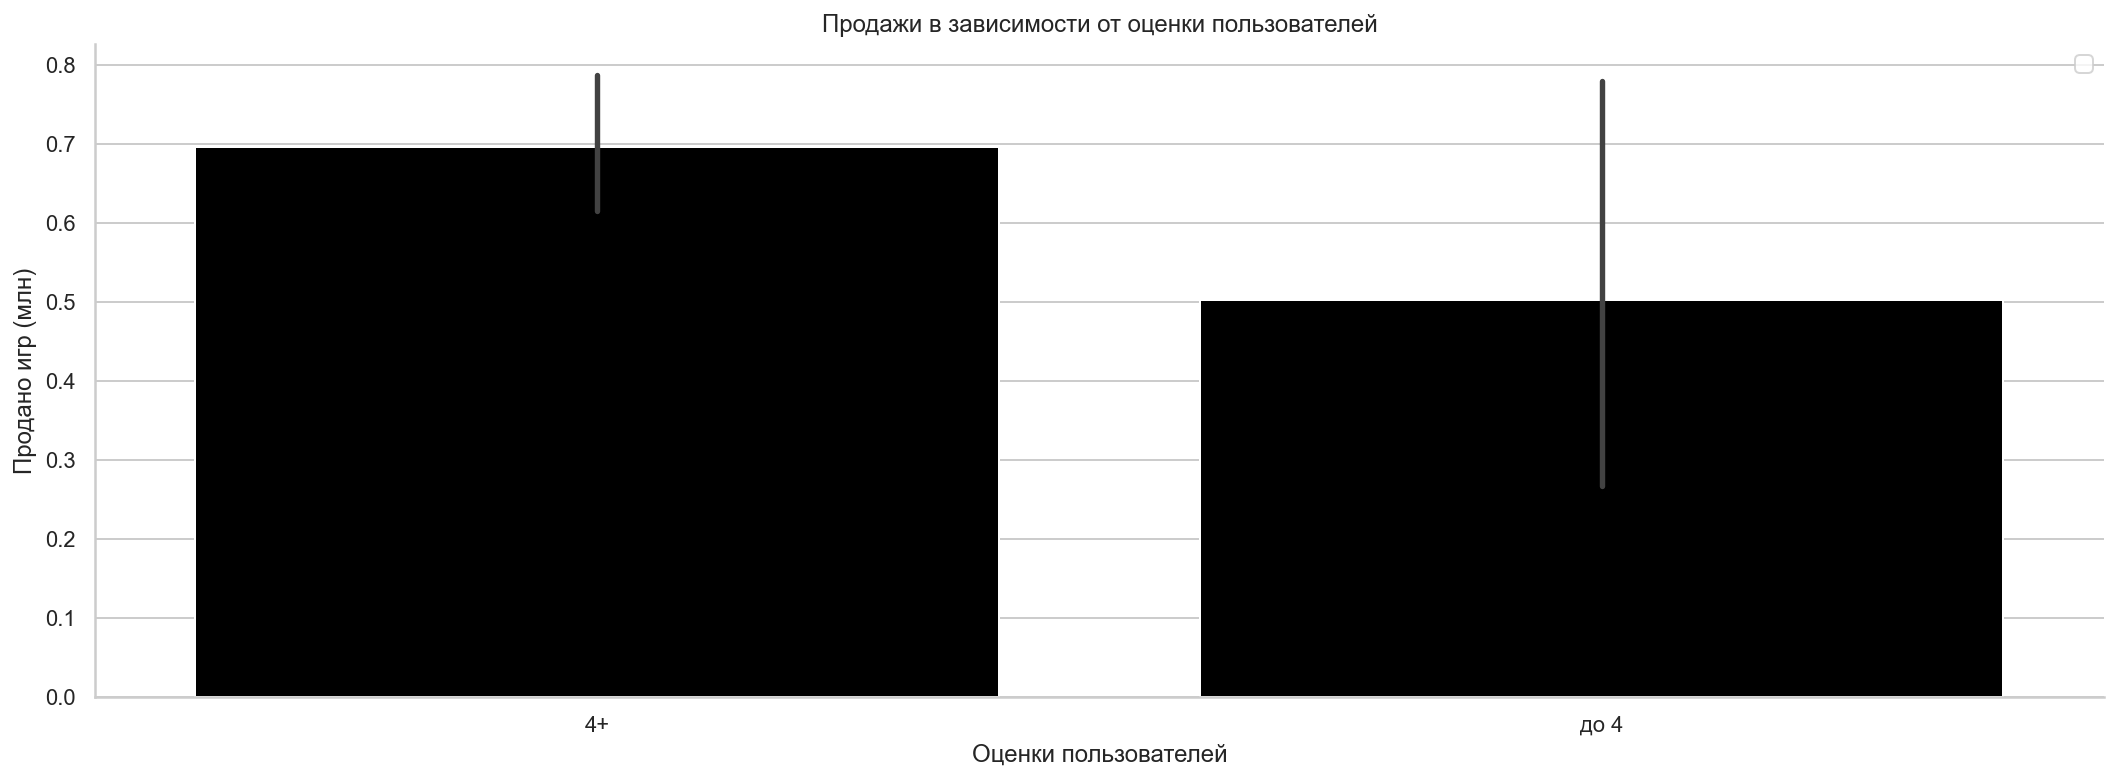

In [80]:
def category_2(row):
    if row <= 4:
        return "до 4"
    elif 4.01 <= row <= 10:
        return "4+"
    else:
        return row
df2["users"] = df2["user_score"].apply(category_2)
tabs = df2[['all_sales',"users"]]
tabs=tabs.reset_index(drop=True)
plt.figure(figsize=(18,6))
sns.barplot(x="users", y='all_sales',data=tabs, color='black')
plt.title("Продажи в зависимости от оценки пользователей")
plt.xlabel("Оценки пользователей")
plt.ylabel("Продано игр (млн)")
plt.legend('')


 - **от рейтинга от организации ESRB** -  возрастную категории игры нужно учитывать при планировании продаж, при этом для корректной оценки влияния данного параметра - необходимо выяснить причину большого количества пропусков в столбце "rating" так как например для Японии в 56 %  не указаны данные. Возможно дополнительно учитывать среднний возраст страны для продаж.

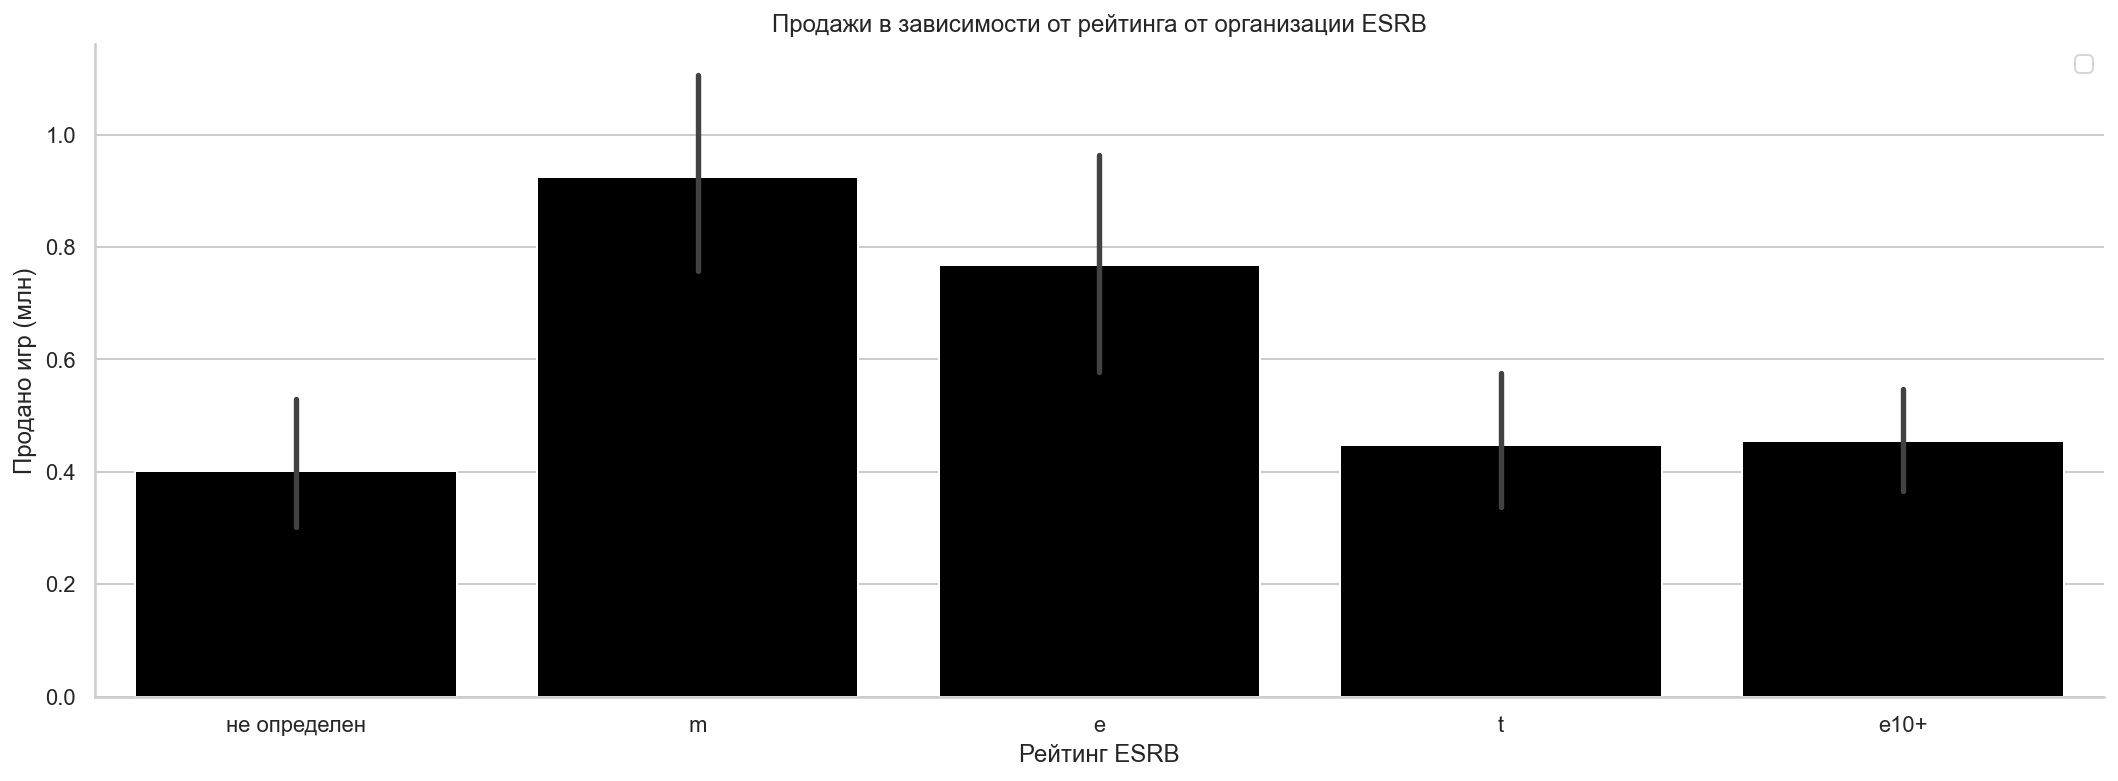

In [81]:
plt.figure(figsize=(18,6))
sns.barplot(x="rating", y='all_sales',data=df2, color='black')
plt.title("Продажи в зависимости от рейтинга от организации ESRB")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Продано игр (млн)")
plt.legend('')

 - **Жанра игры** - необходимо учесть, так как некоторые игры популярны в узких кругах  и делать прогноз может быть сильной ошибкой.

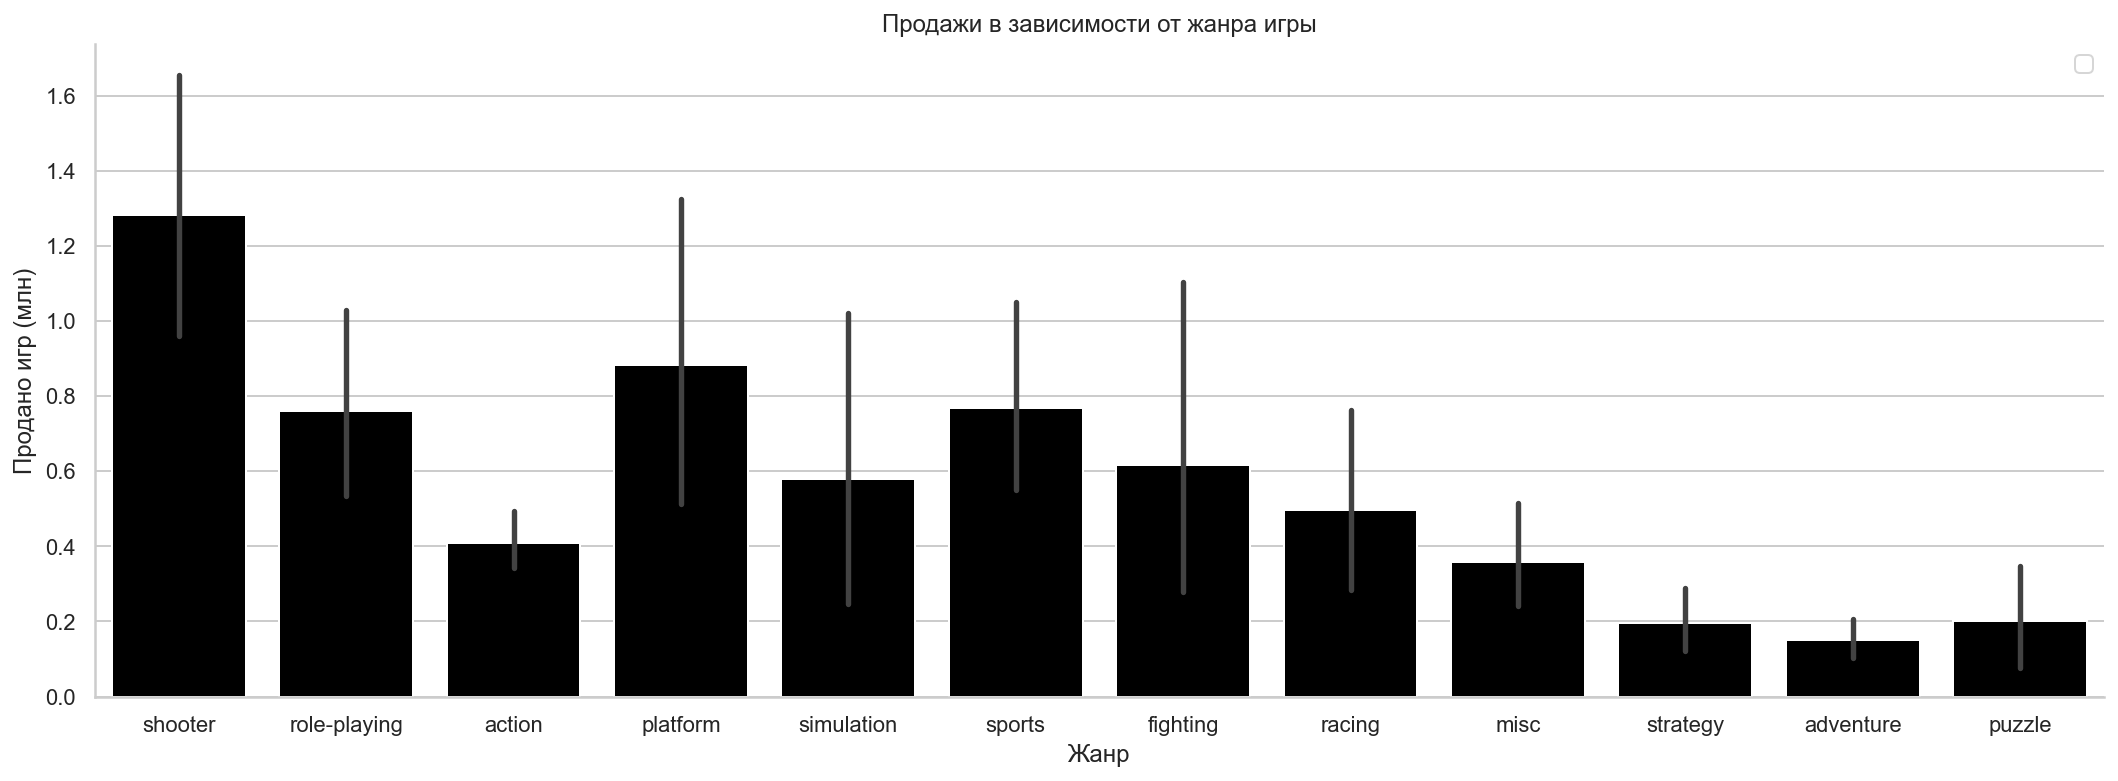

In [82]:
plt.figure(figsize=(18,6))
sns.barplot(x="genre", y='all_sales',data=df2, color='black')
plt.title("Продажи в зависимости от жанра игры")
plt.xlabel("Жанр")
plt.ylabel("Продано игр (млн)")
plt.legend('')

 - **Платформы** - необходимо учесть, так как некоторые игры выпускаются не для всех платформ.

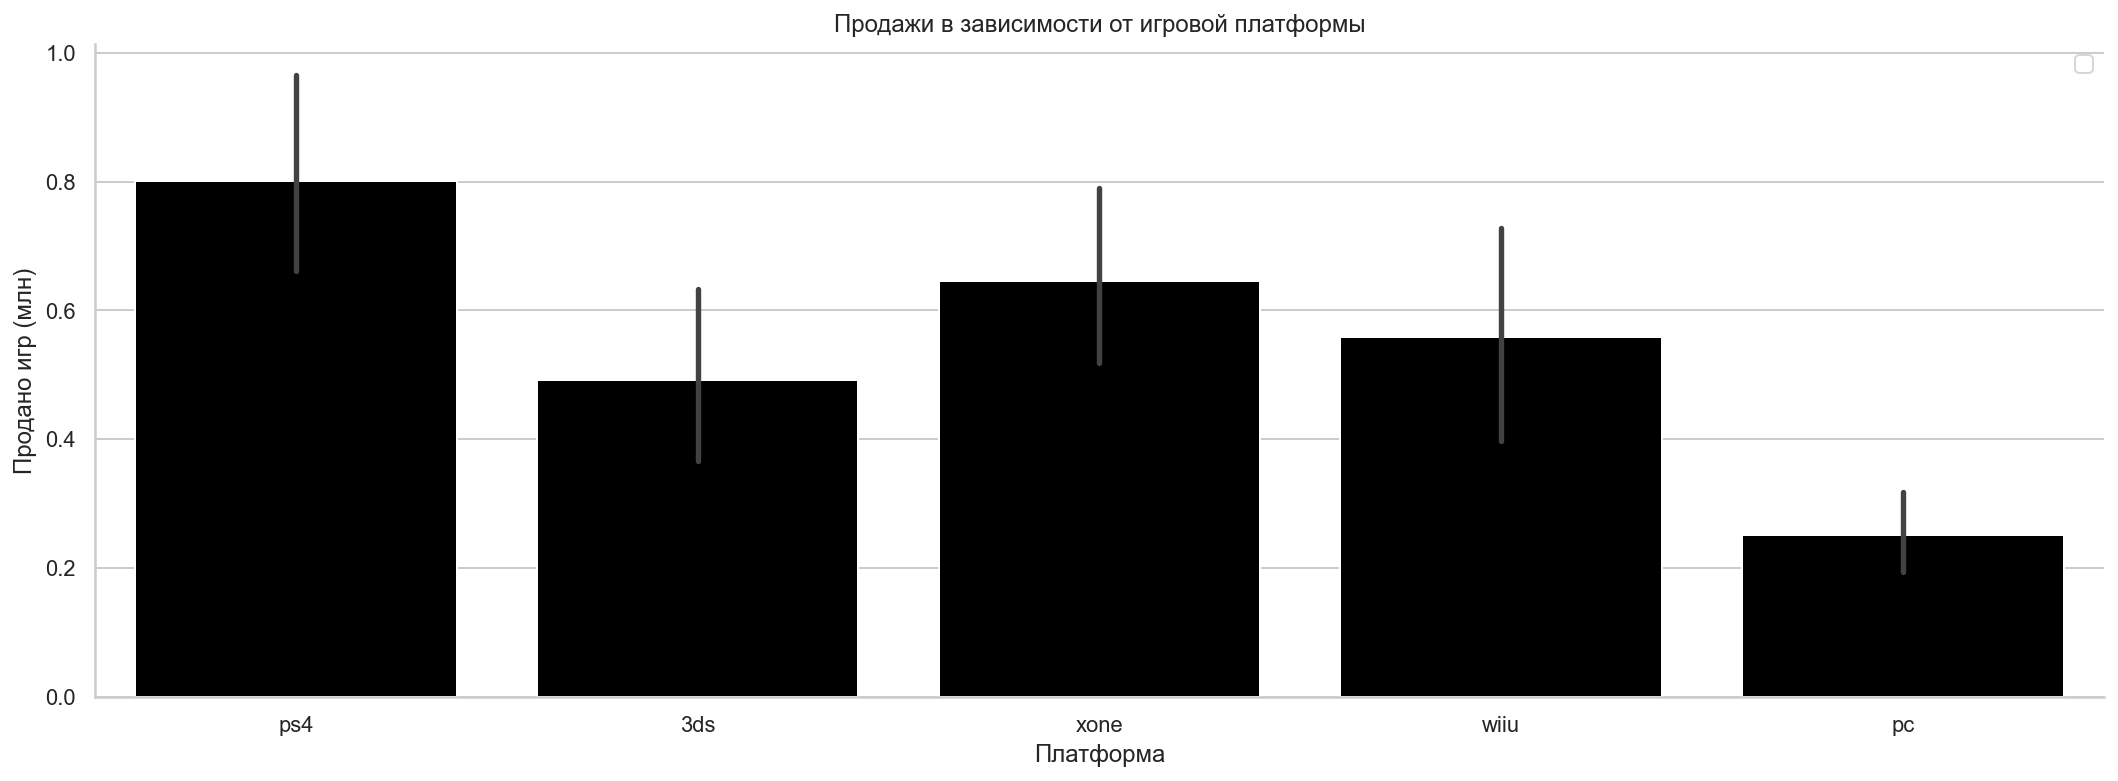

In [83]:
plt.figure(figsize=(18,6))
sns.barplot(x="platform", y='all_sales',data=df2, color='black')
plt.title("Продажи в зависимости от игровой платформы")
plt.xlabel("Платформа")
plt.ylabel("Продано игр (млн)")
plt.legend('')

 - **Региона продаж** - важно учесть, предпочтения с учетом страны, например если это Япония, у них сильно отличаются портреты пользователей от портретов других стран.

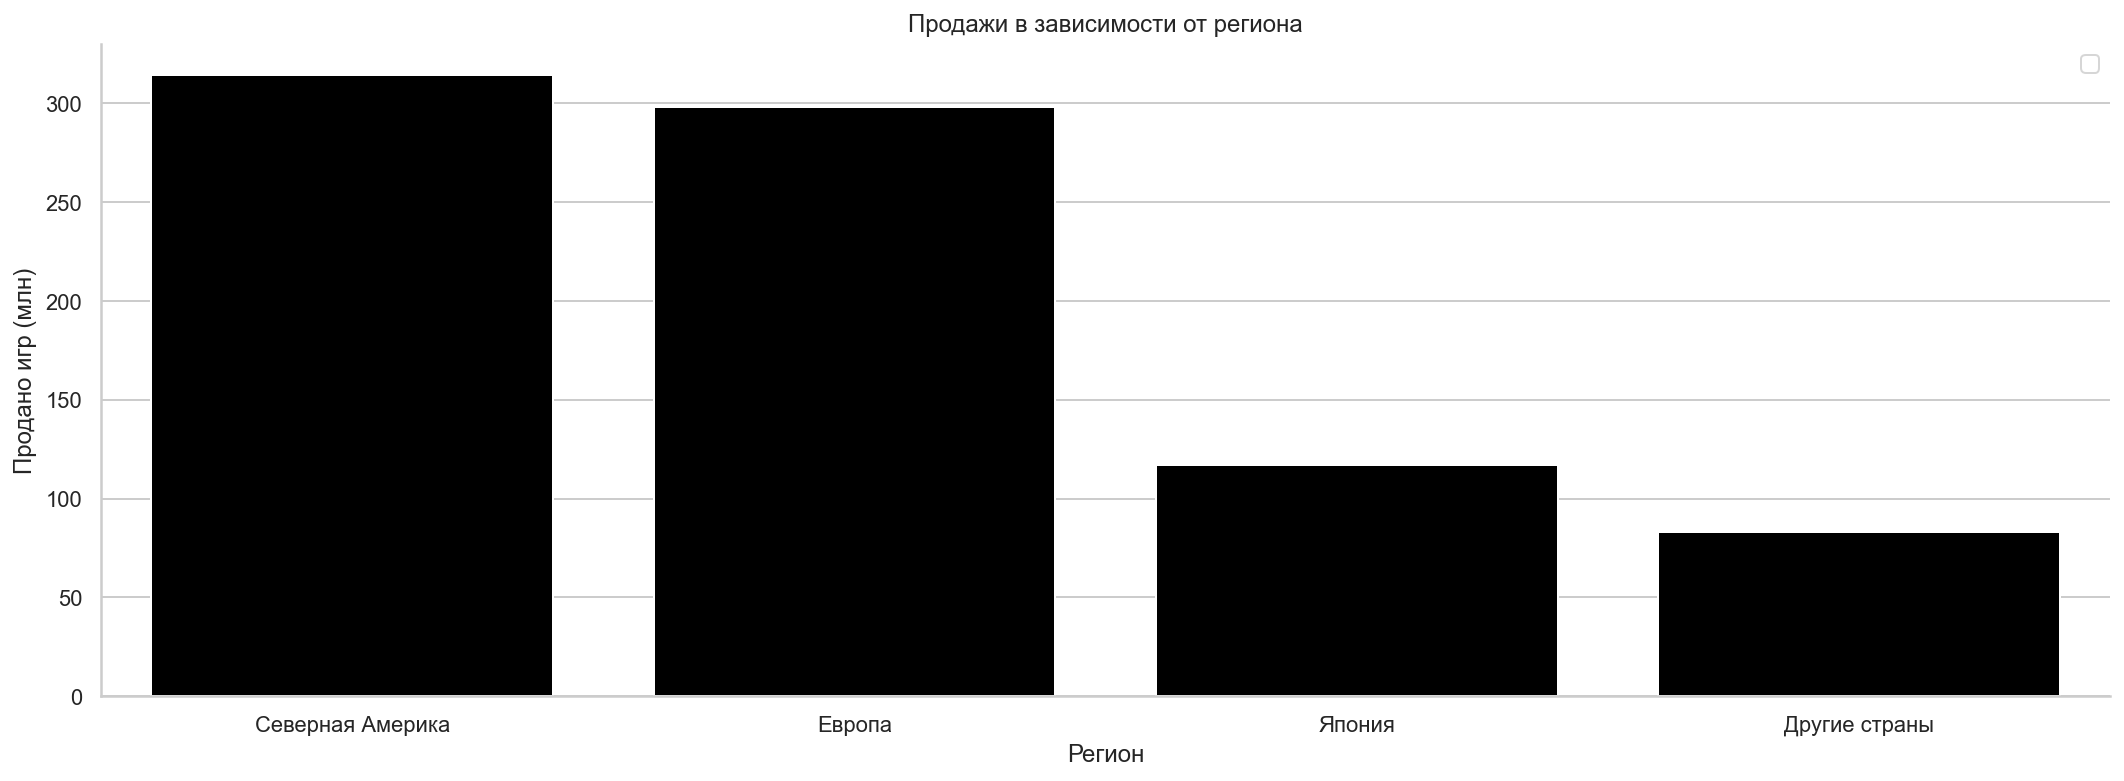

In [84]:
dic = {}
for i in arr:
    dic[arr3[i]] = round(df2[arr[i]].sum(),2)
t=pd.DataFrame(list(dic.items()),columns=['region', 'sales'])
plt.figure(figsize=(18,6))
sns.barplot(x='region', y='sales',data=t, color='black')
plt.title("Продажи в зависимости от региона")
plt.xlabel("Регион")
plt.ylabel("Продано игр (млн)")
plt.legend('')

Для окончательного решения вопроса определения потенциально прибольного продукта и бюджетирования рекламы необходимо выяснить причины отсутствия рейтинга, оценок, возможно это можно исправить и сделать анализ более точным.

Выбор потенциально популярного продукта и планирования рекламных кампаний должен быть осуществлен только при учете всех вышеуказанных параметров, при этом параметры нужно сравнивать отдельно для каждого региона/страны в котором планируется продажа потенциально популярного продукта.